In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [13]:
%matplotlib notebook

In [14]:
df = pd.read_csv("EThOSCSV_201803.csv")

In [15]:
# TODO Can I prevent global namespace pollution by having everything inside let-clauses?

In [16]:
def isphd(elem):
    """ Return true if elem["Qualification"] is a PhD. """
    q = elem["Qualification"]
    if type(q) == str:
        qred = q.strip().lower()
        if ("ph.d" in qred or "dphil" in qred or "phd" in qred):
            return True
    return False

In [17]:
dfphd = df[df.apply(isphd, axis=1)]

In [18]:
counts_by_year = dfphd.Date.value_counts().sort_index()

<IPython.core.display.Javascript object>


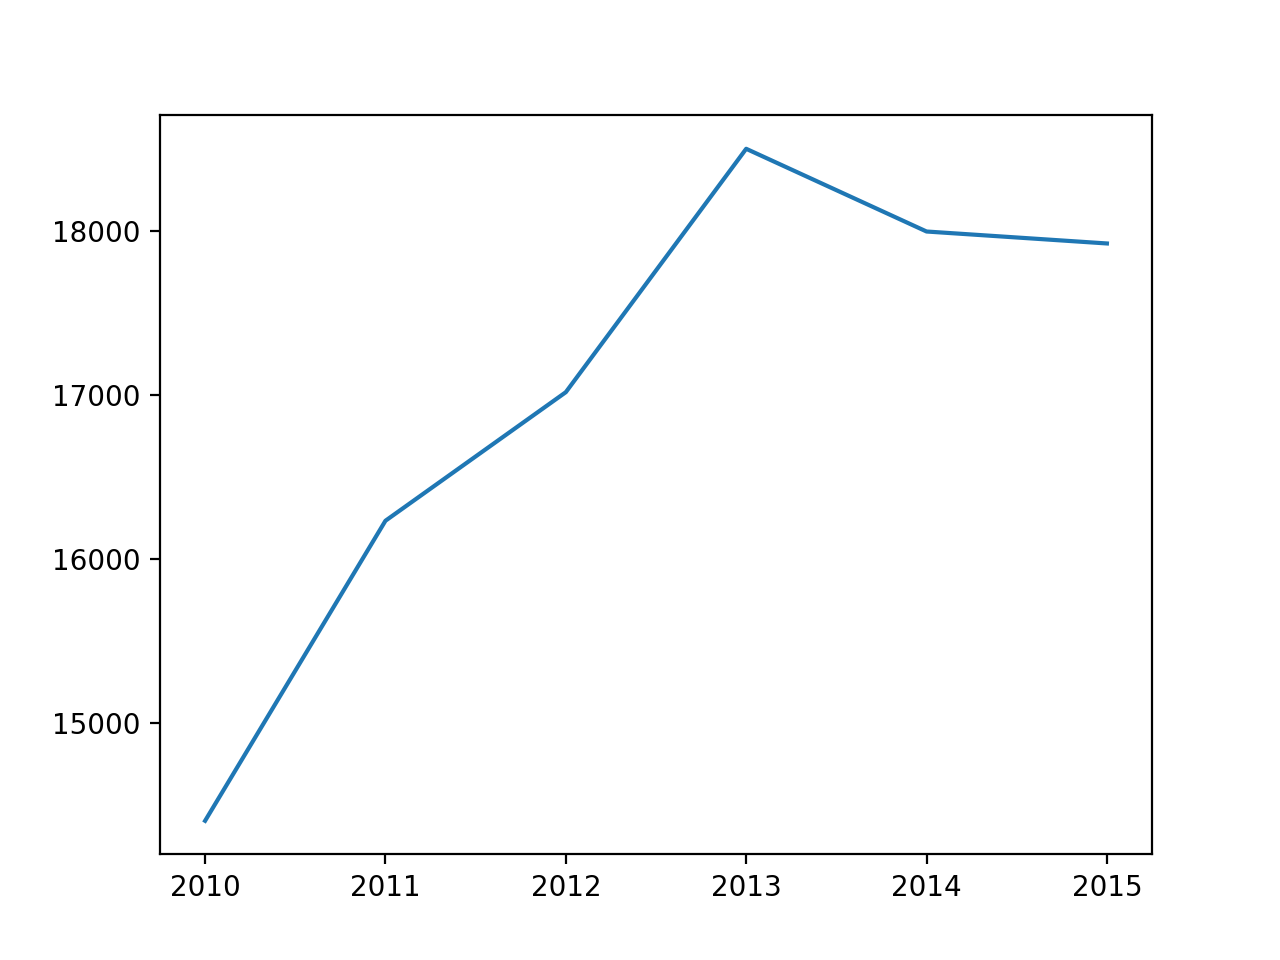

<IPython.core.display.Javascript object>


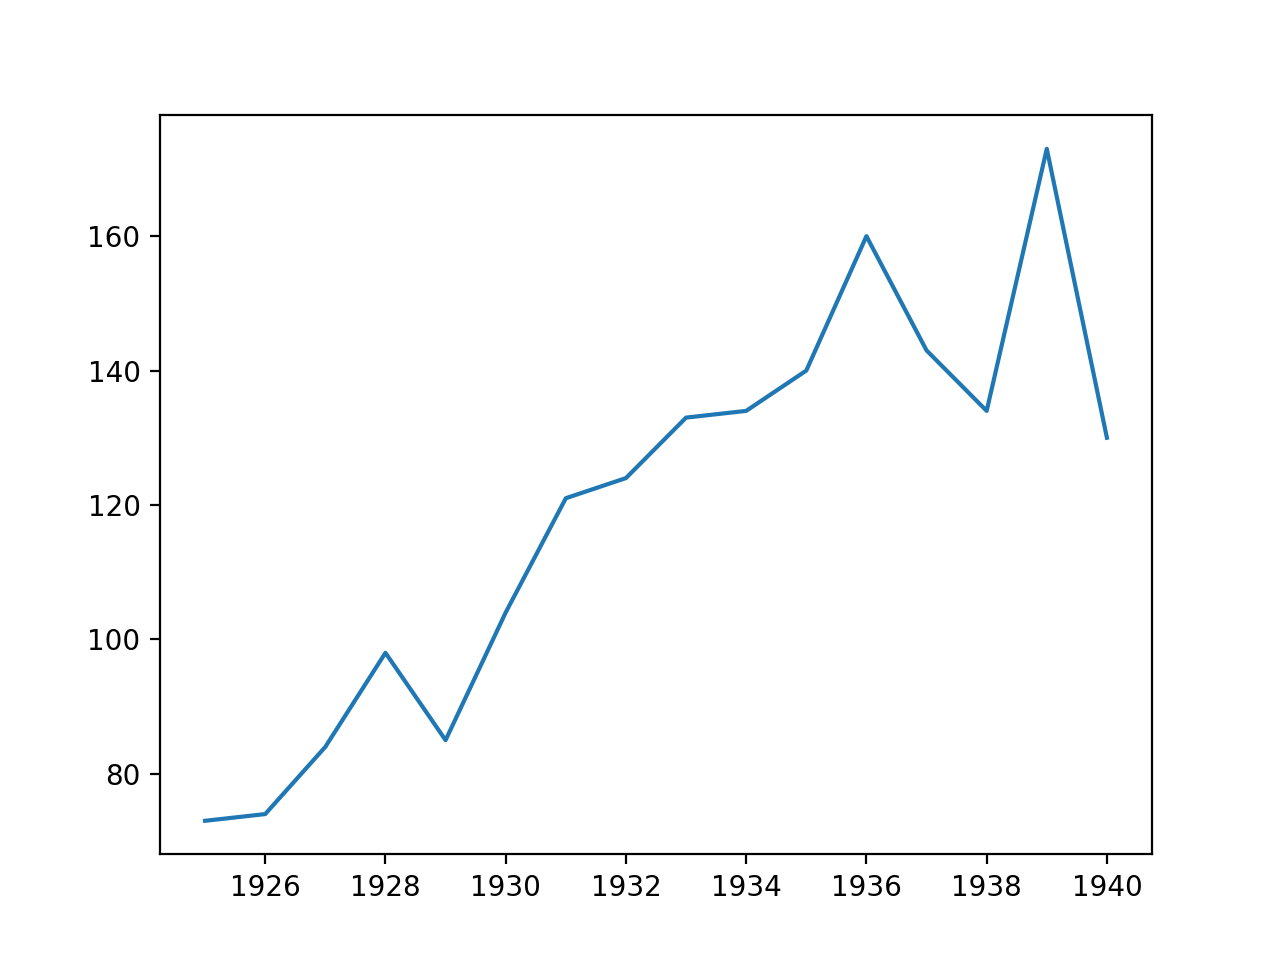

In [27]:
plt.figure()
counts_by_year[2010:].plot()
plt.figure()
counts_by_year[:1940].plot()

In [25]:
late_cutoff = 2015
early_cutoff = 1925
counts_by_year = counts_by_year[early_cutoff:late_cutoff]
dfphd = dfphd[(early_cutoff <= dfphd.Date) & (dfphd.Date <= late_cutoff)]

<IPython.core.display.Javascript object>


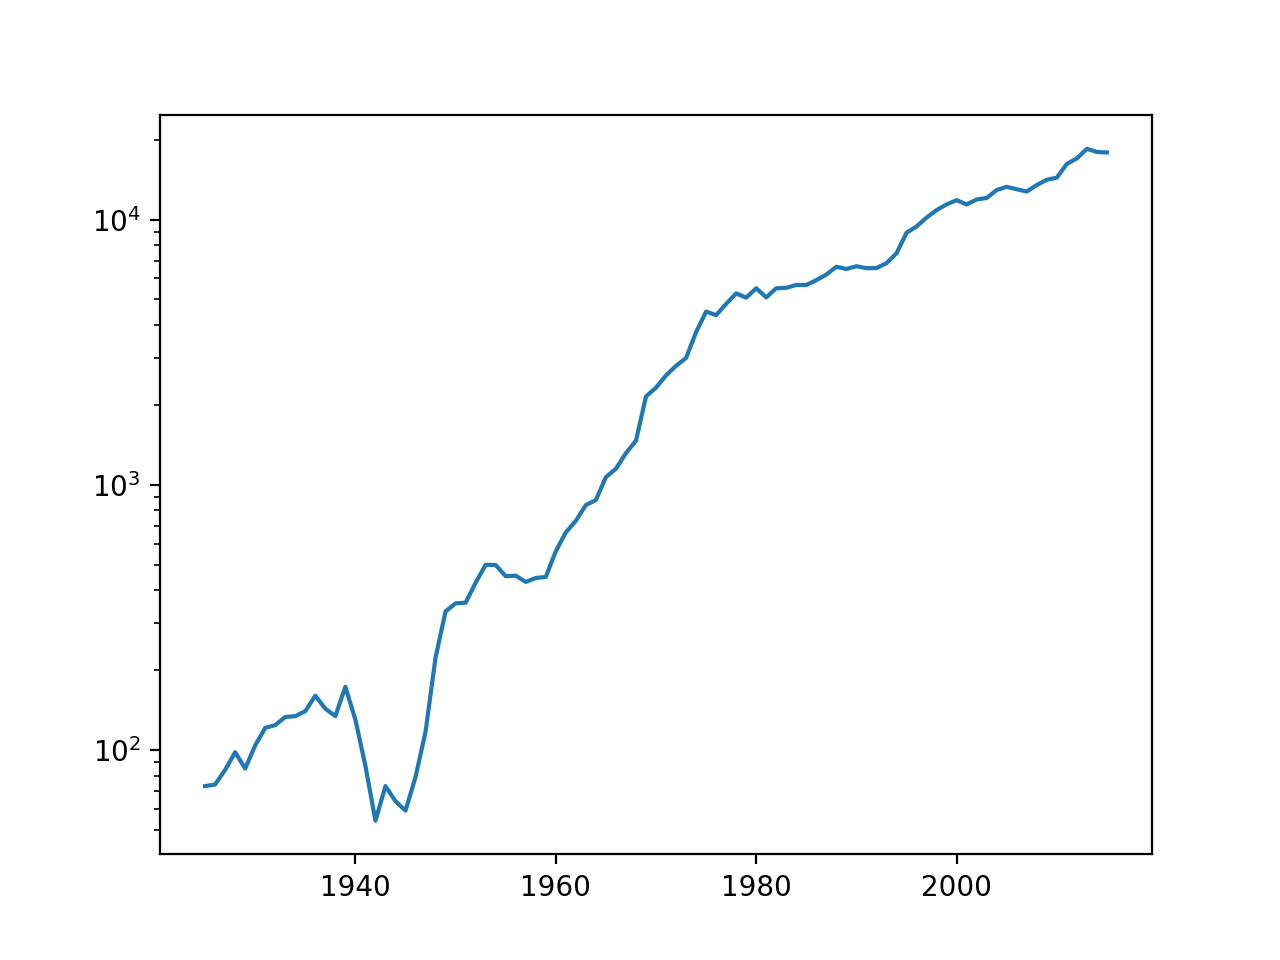

In [28]:
plt.figure()
plt.semilogy(counts_by_year)

In [29]:
counts_by_yearandinst = dfphd.groupby(["Institution", "Date"]).size().unstack("Institution").fillna(0.0)
counts_by_yearandinst = counts_by_yearandinst.sort_values(late_cutoff, axis="columns", ascending=False)
instratios_by_year = counts_by_yearandinst.divide(counts_by_year, axis="index")

<IPython.core.display.Javascript object>


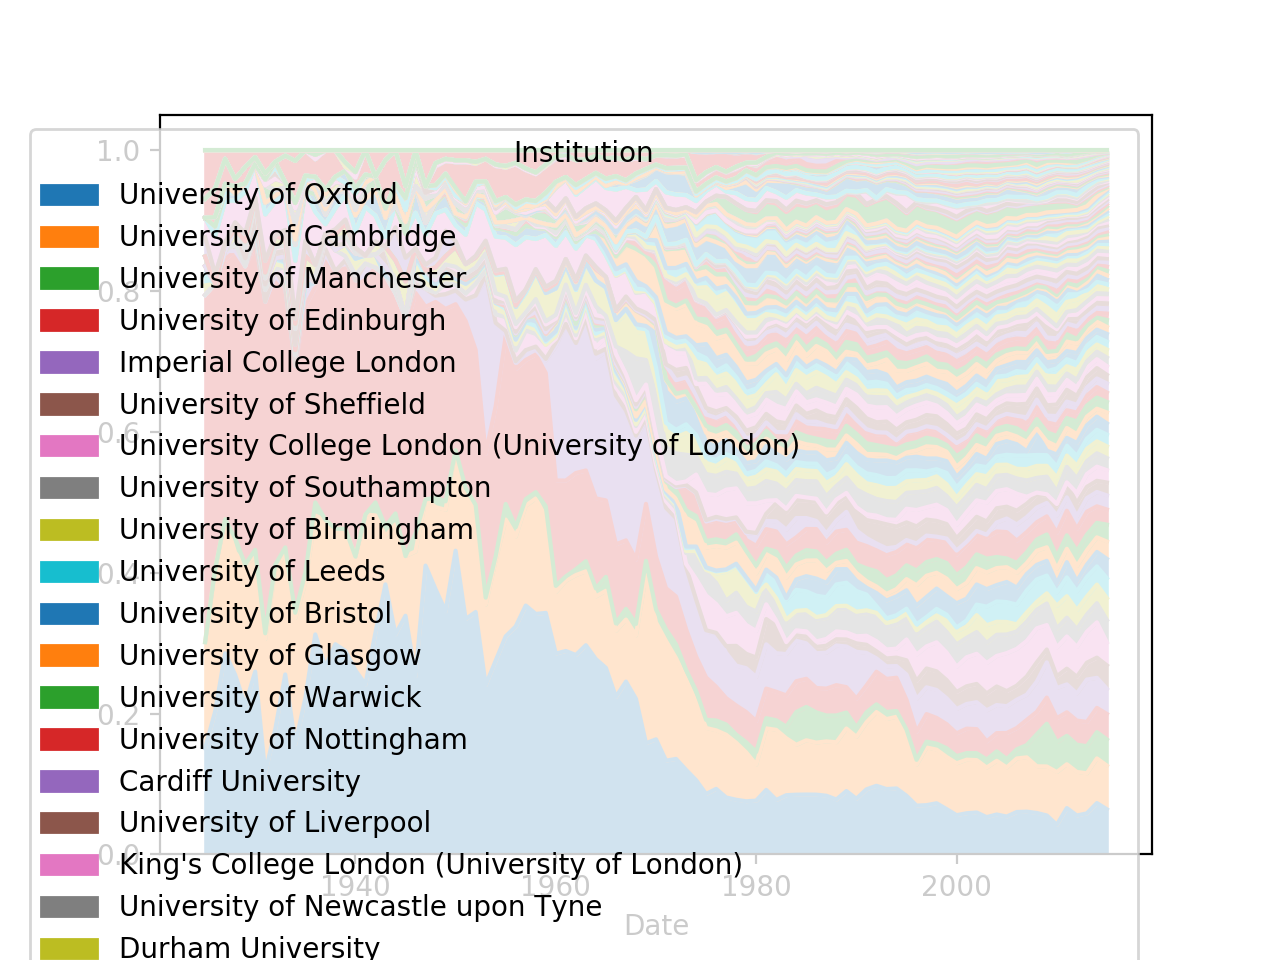

In [32]:
# TODO Fix legend
instratios_by_year.plot.area(legend=True)

<IPython.core.display.Javascript object>


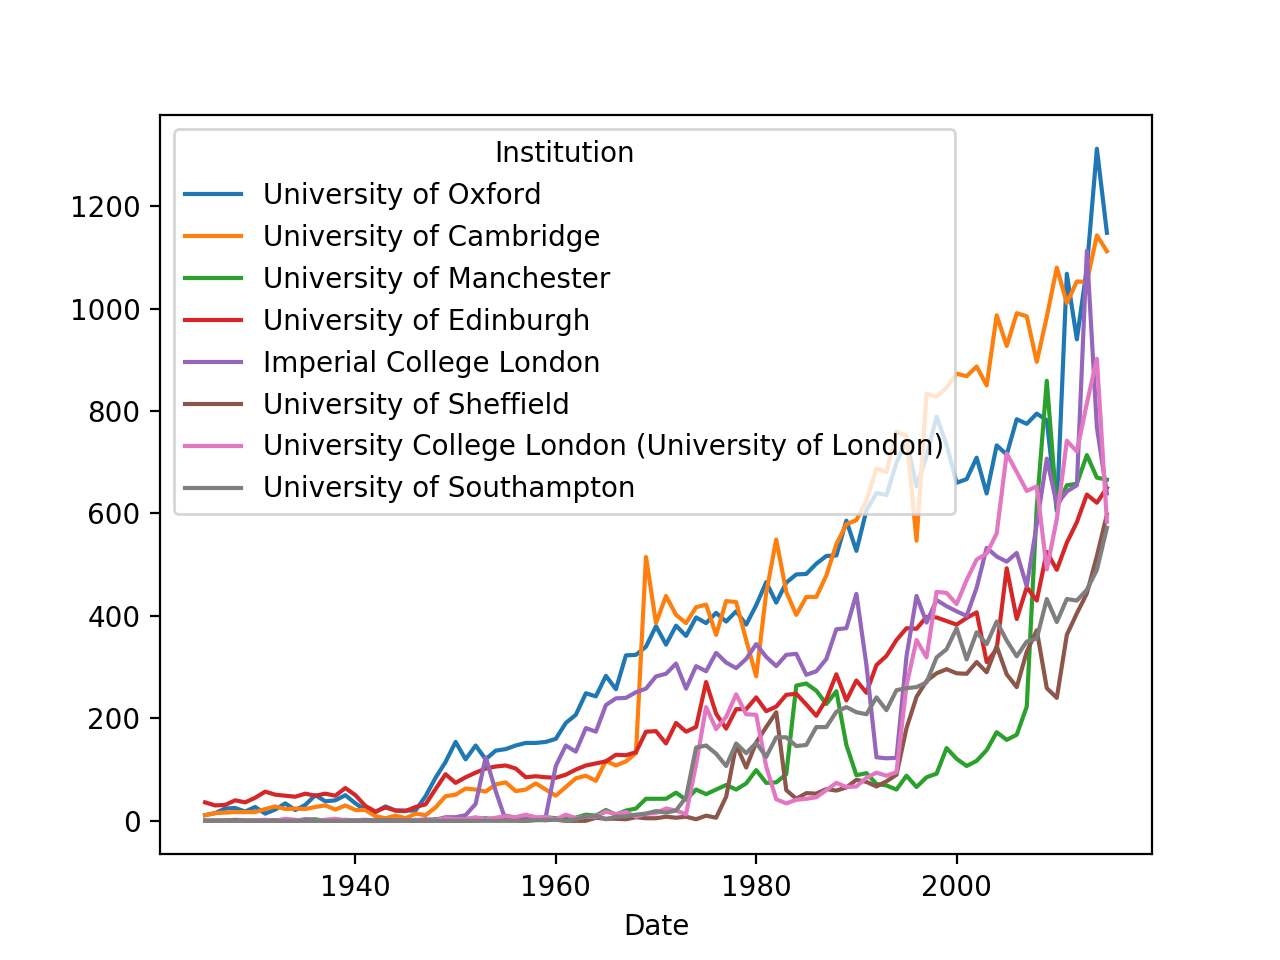

In [33]:
counts_by_yearandinst.iloc(1)[:8].plot()

In [90]:
def splitstr(s):
    """ For a string, remove most punctuation, lower case, and split into words. Return the words.
    """
    puncts = '!"&\'(),./:;<=>?[\\]`{|}-'
    return s.lower().translate(str.maketrans('', '', puncts)).split()

def filter_punctuationwords(l):
    """ Take a list of strings, filter out prepositions, articles, and other boring words. """
    verbotens = ["the", "a", "in", "on", "of", "at", "as", "so", "and", "for", "to", "with", "an", "by", "it", "from", "its", "their", "them", "into", "onto"]
    return tuple(s for s in l if s not in verbotens)

In [91]:
dfphd["Words"] = dfphd["Title"].apply(splitstr).apply(filter_punctuationwords)

In [126]:
wordcounts_by_year = dfphd.groupby("Date")["Words"].apply(
    lambda x: pd.Series(np.concatenate(x.tolist())).value_counts()
).unstack("Date").fillna(0.0)

In [127]:
total_wordcounts = wordcounts_by_year.sum(axis=1)
order = (-total_wordcounts).argsort()
total_wordcounts = total_wordcounts[order]
wordcounts_by_year = wordcounts_by_year.reindex(total_wordcounts.index)

In [131]:
wordrates_by_year = wordcounts_by_year.divide(counts_by_year, axis="columns")

In [132]:
width = 3
wordrates_by_year_smooth = wordrates_by_year.rolling(width, center=True, win_type="gaussian").mean(std=width)

<IPython.core.display.Javascript object>


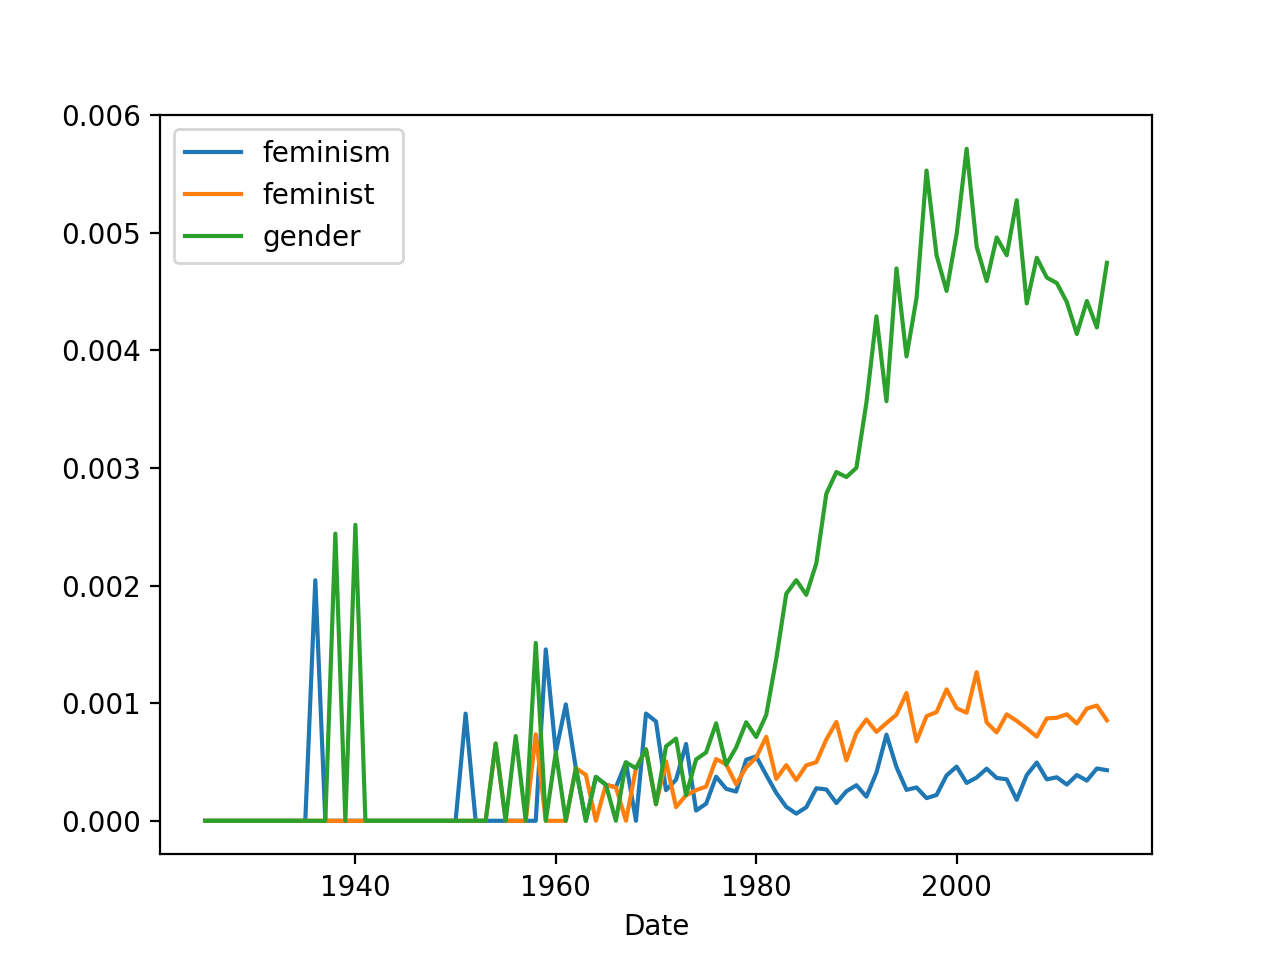

<IPython.core.display.Javascript object>


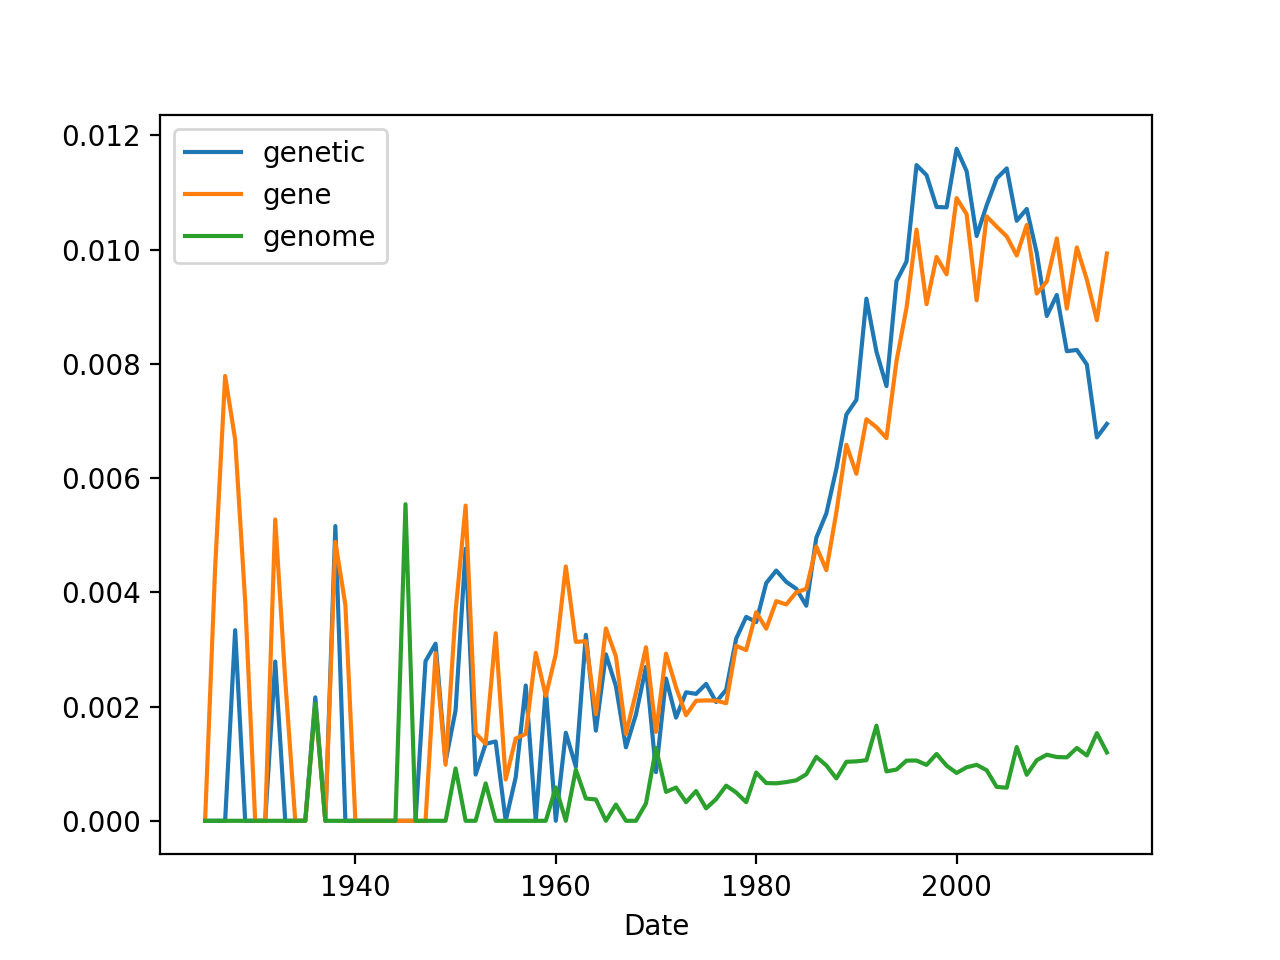

<IPython.core.display.Javascript object>


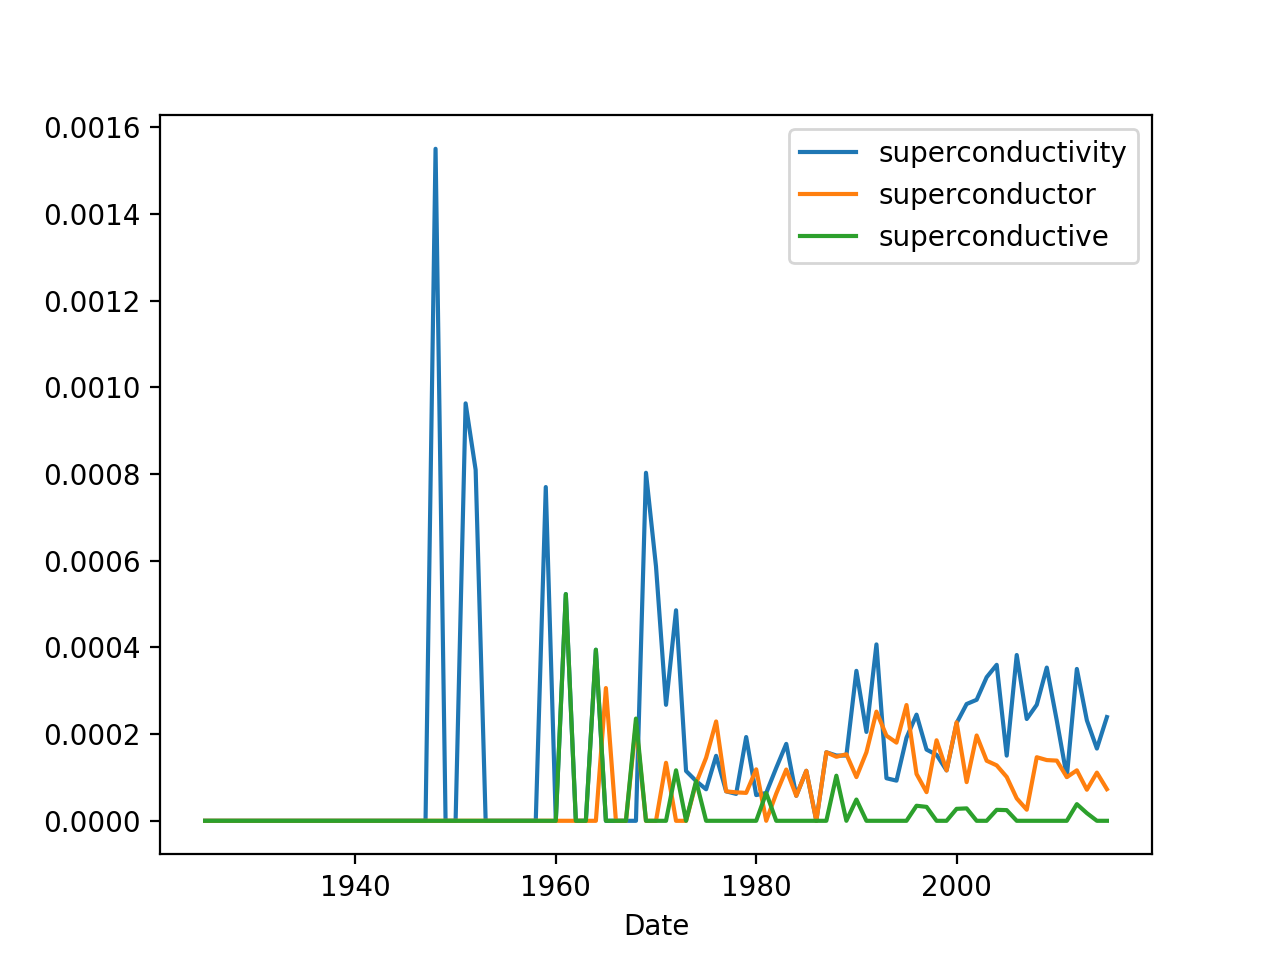

<IPython.core.display.Javascript object>


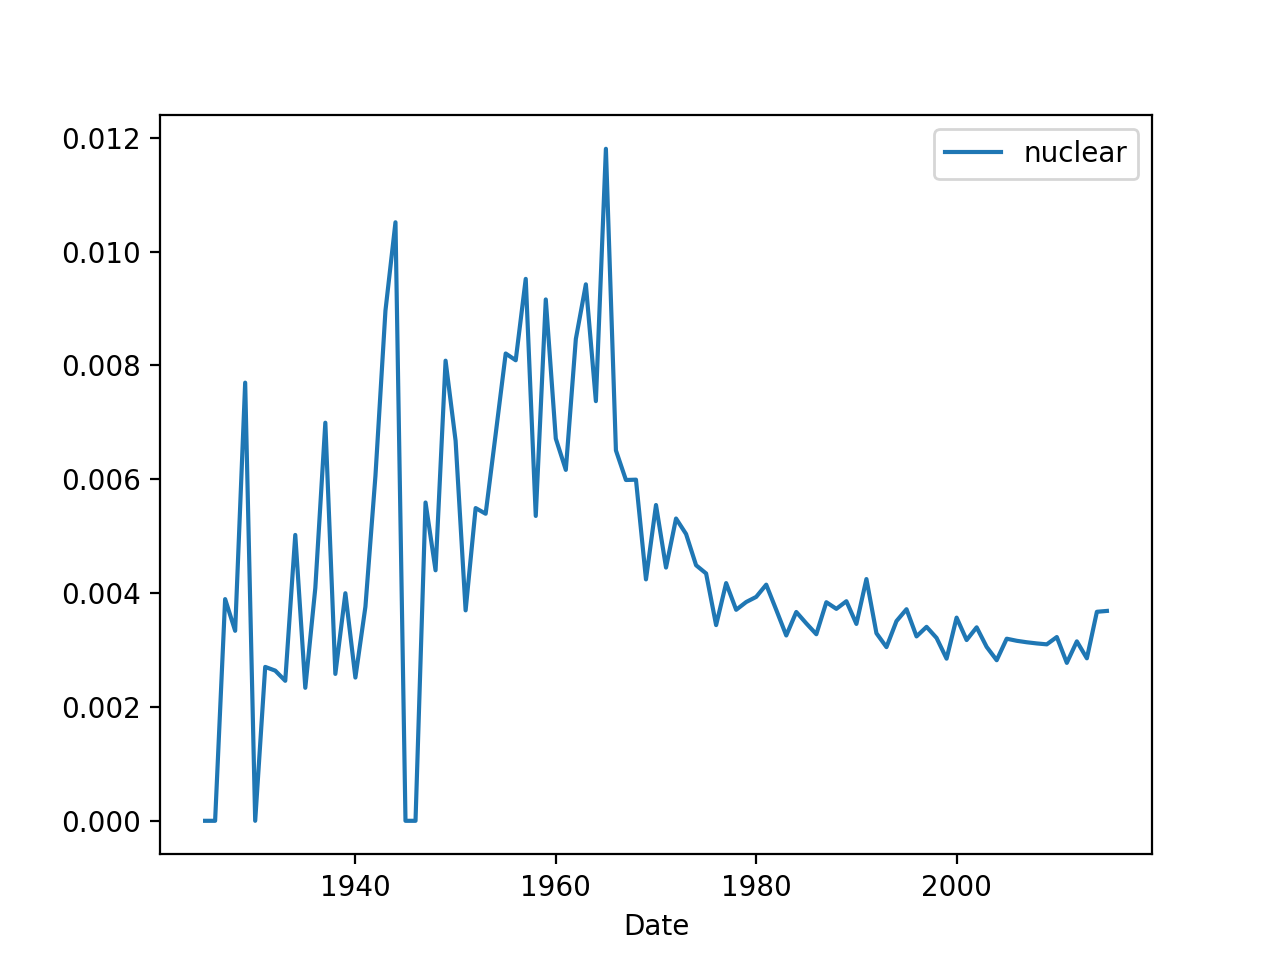

<IPython.core.display.Javascript object>


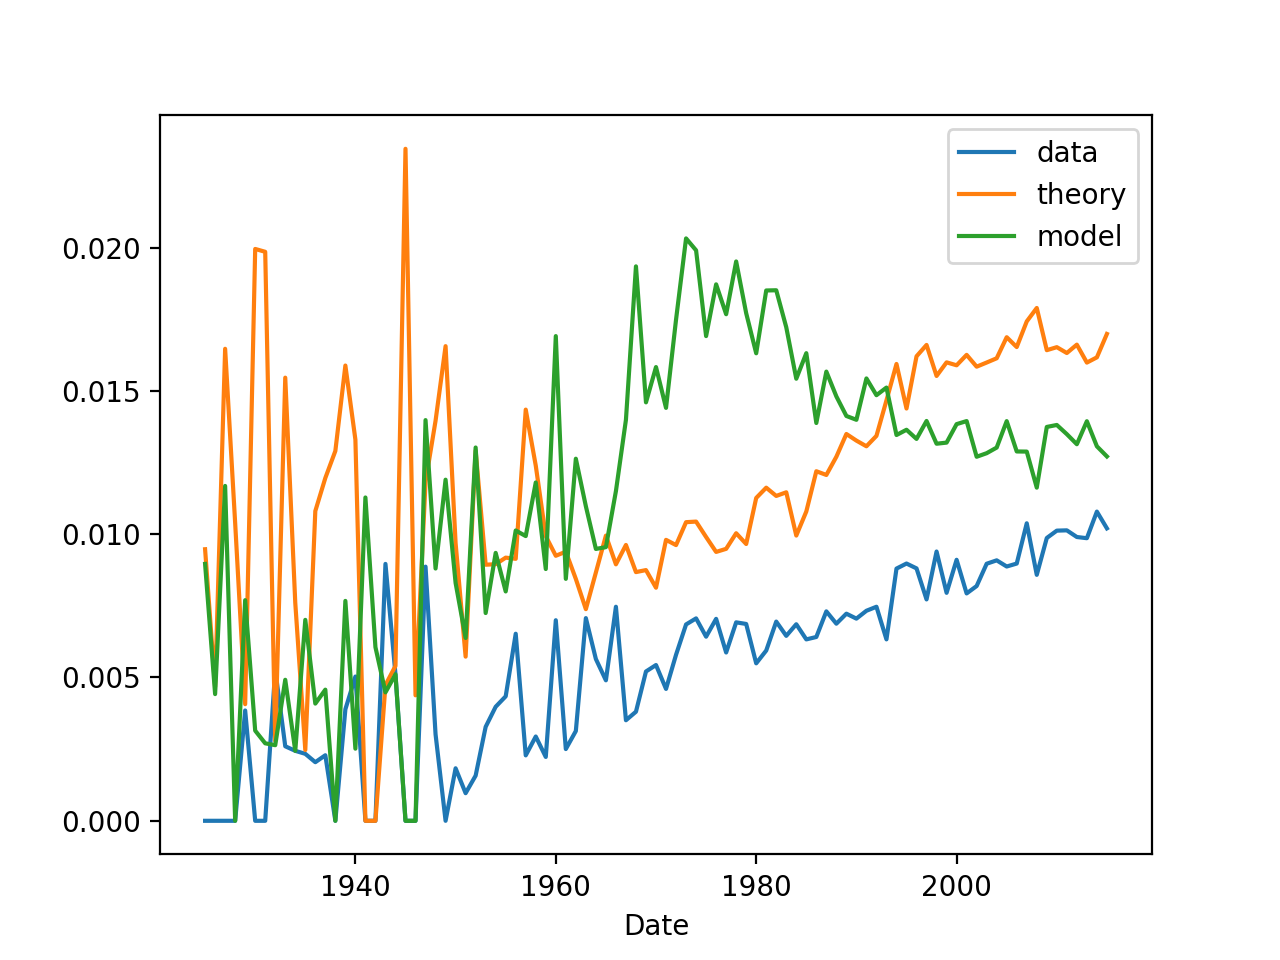

In [135]:
wordsets = (
    ["feminism", "feminist", "gender"],
    ["genetic", "gene", "genome"],
    ["superconductivity", "superconductor", "superconductive"],
    ["nuclear"],
    ["data", "theory", "model"]
)
for s in wordsets:
    wordrates_by_year_smooth.T[s].plot()

In [140]:
yearrange = slice(1960, 2014)
wordrange = slice(17, 2000)
years = wordrates_by_year[yearrange].index
wordrates_matrix = wordrates_by_year[yearrange].transpose()[wordrange]
U, S, V = np.linalg.svd(wordrates_matrix)

for i in range(20):
    im = np.argmax(np.abs(U[:, i]))
    m = U[im, i]
    U[:,i] /= m
    V[i,:] *= S[i]*m

0
[(1945.0, 1.0), (1944.0, 0.2739141685925642), (1964.0, 0.20562024749103688), (1957.0, 0.1680306048159057), (1937.0, 0.14474213947699063), (1929.0, 0.14216165855900362), (1940.0, 0.14051566594041293), (1967.0, 0.12863850050240563), (1928.0, 0.1278583921204272), (1955.0, 0.1164330680197684)]


<IPython.core.display.Javascript object>


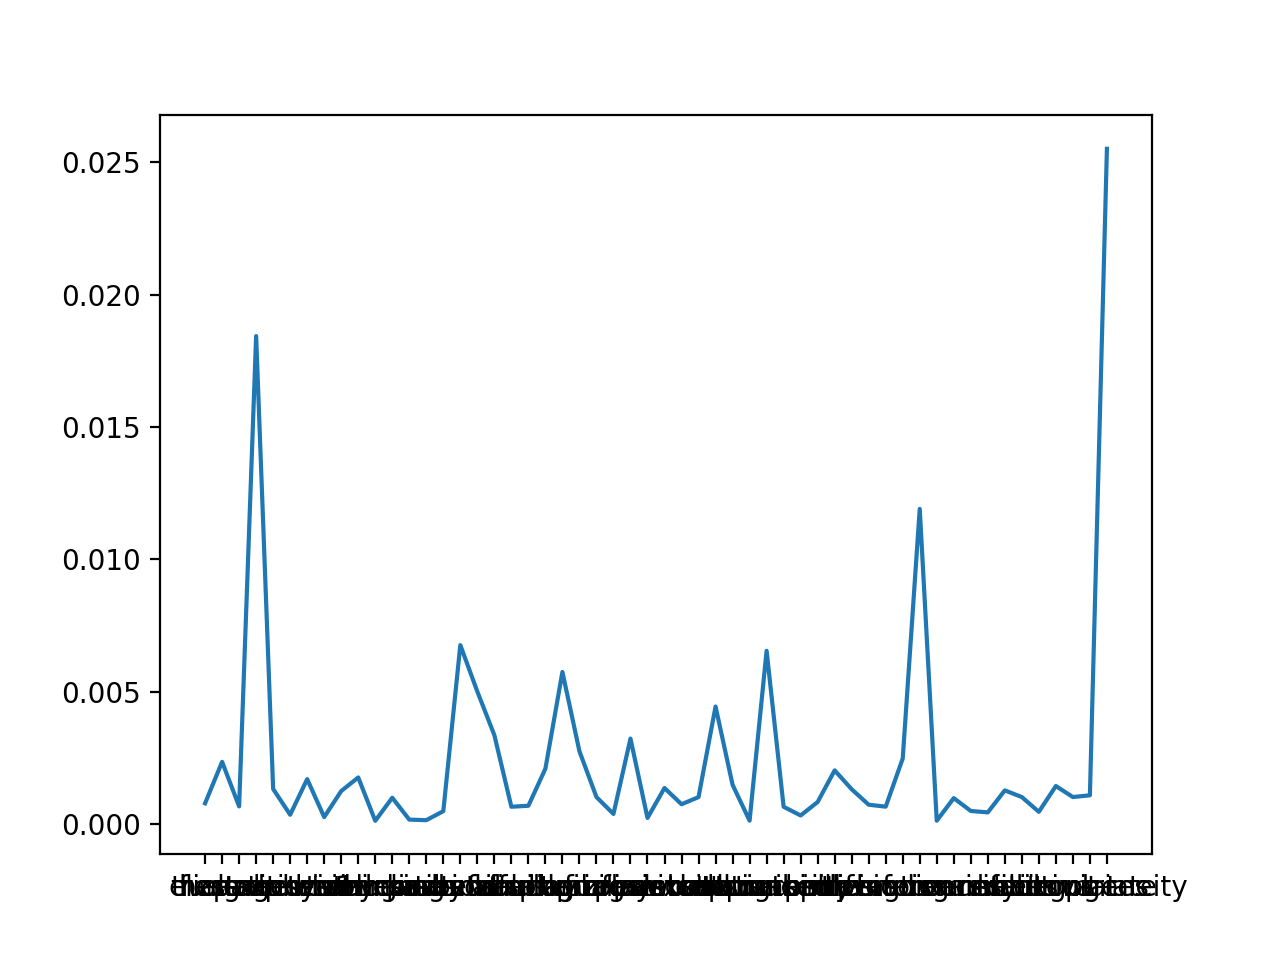

1
[(1945.0, 1.0), (1929.0, -0.8037113746390782), (1928.0, -0.6031102031116685), (1942.0, -0.42350757320448457), (1965.0, -0.3383664869602173), (1957.0, -0.31634235402905087), (1926.0, -0.30904606693300246), (1938.0, -0.2785720208927369), (1960.0, -0.2762681078577718), (1961.0, -0.2643319353493557)]


<IPython.core.display.Javascript object>


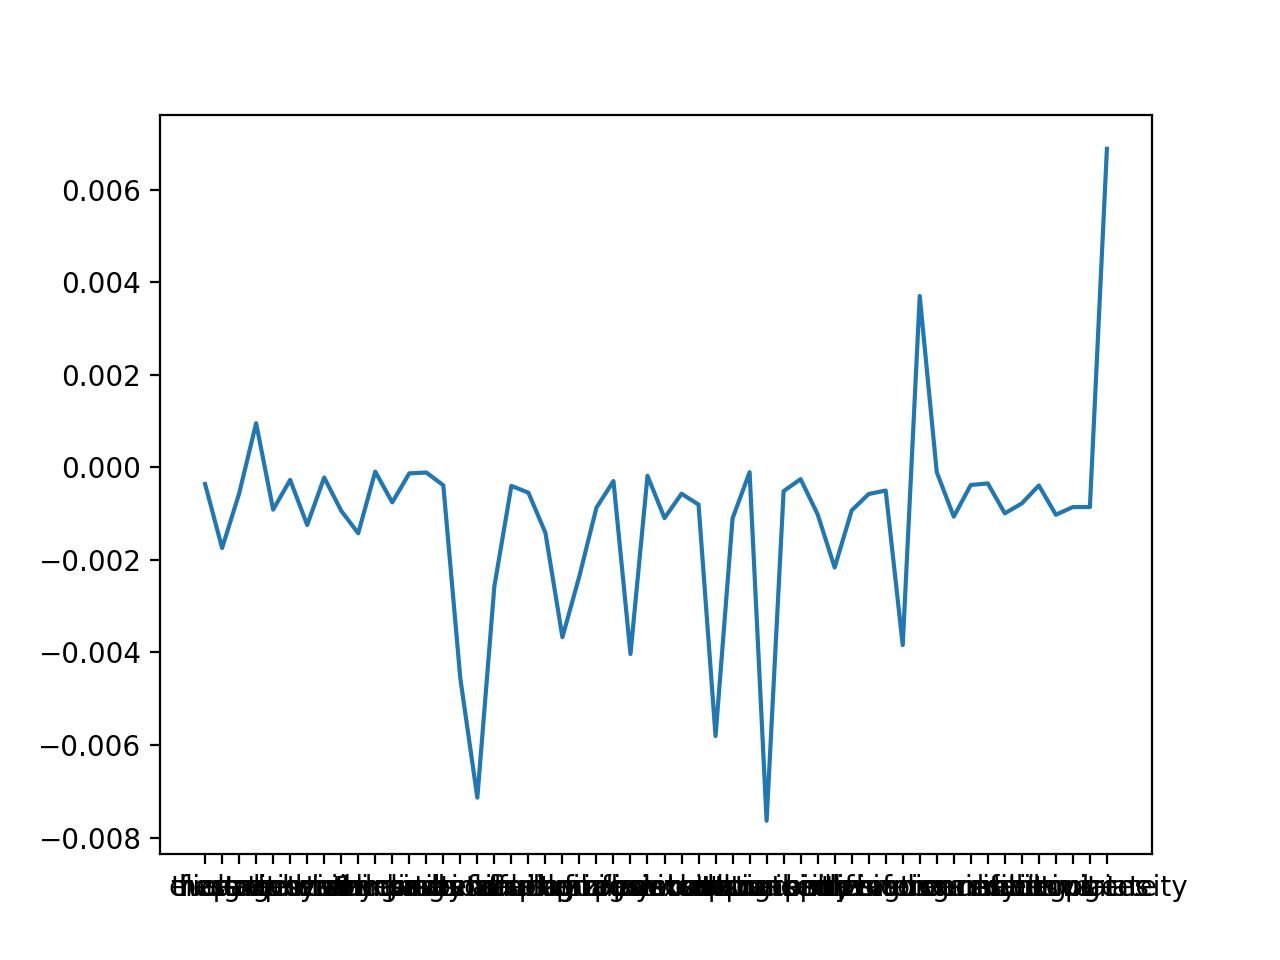

2
[(1942.0, 1.0), (1929.0, -0.9249057897352191), (1926.0, 0.7297297297297299), (1928.0, 0.5988132835719245), (1938.0, 0.41901948394742217), (1944.0, 0.3726902583598146), (1941.0, -0.37156208846695177), (1931.0, -0.3151497524095942), (1932.0, -0.29790542758943767), (1949.0, 0.29534559310861136)]


<IPython.core.display.Javascript object>


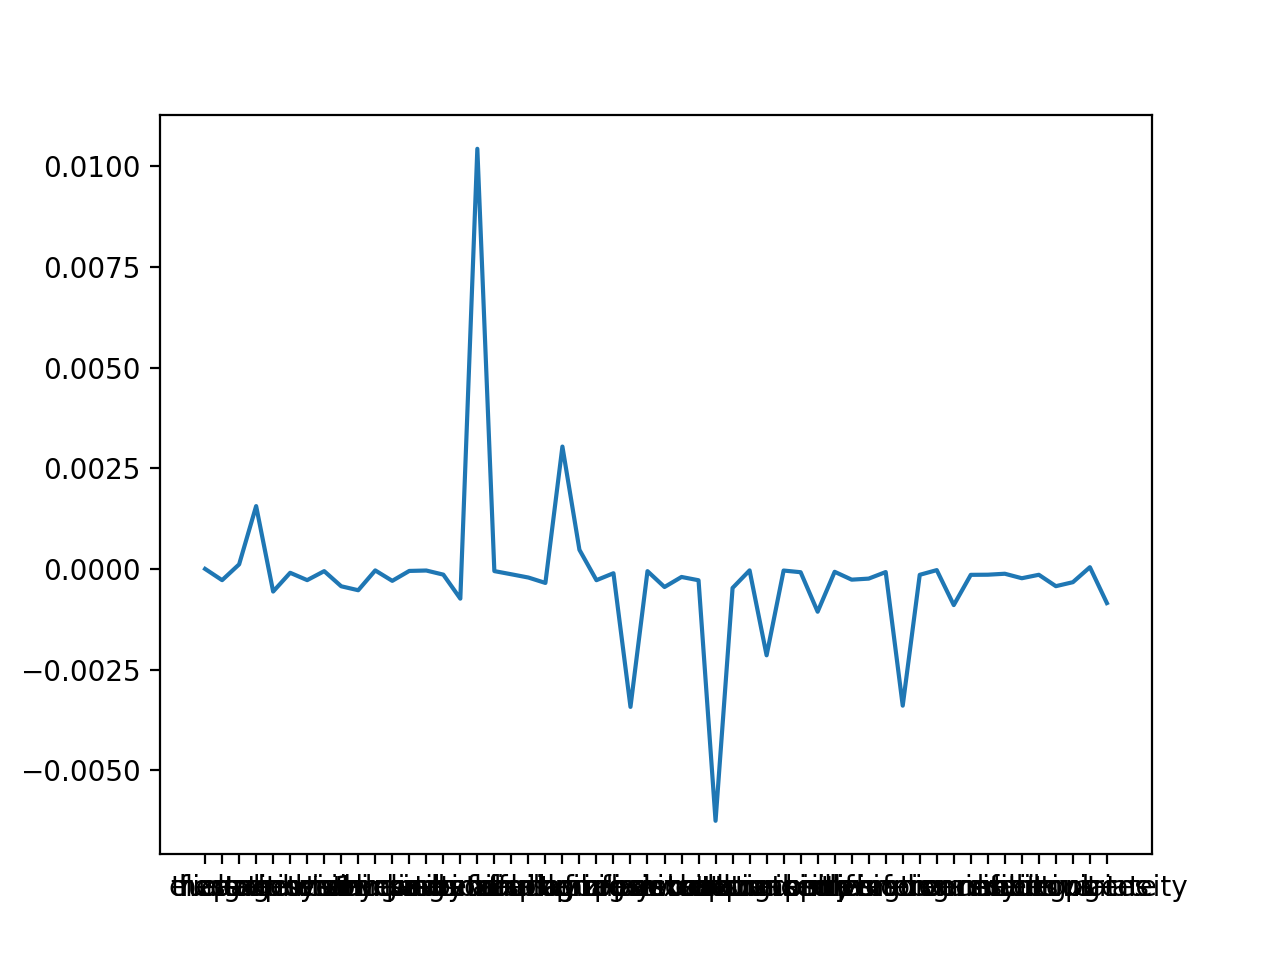

3
[(1944.0, 1.0), (1942.0, -0.5261795666191534), (1937.0, 0.4635996182177169), (1940.0, 0.44881844460360026), (1926.0, -0.38396887293830145), (1929.0, -0.38194794818042765), (1945.0, -0.3536714757376319), (1962.0, 0.28432413923329286), (1938.0, -0.2638208201896411), (1959.0, 0.26111504060432833)]


<IPython.core.display.Javascript object>


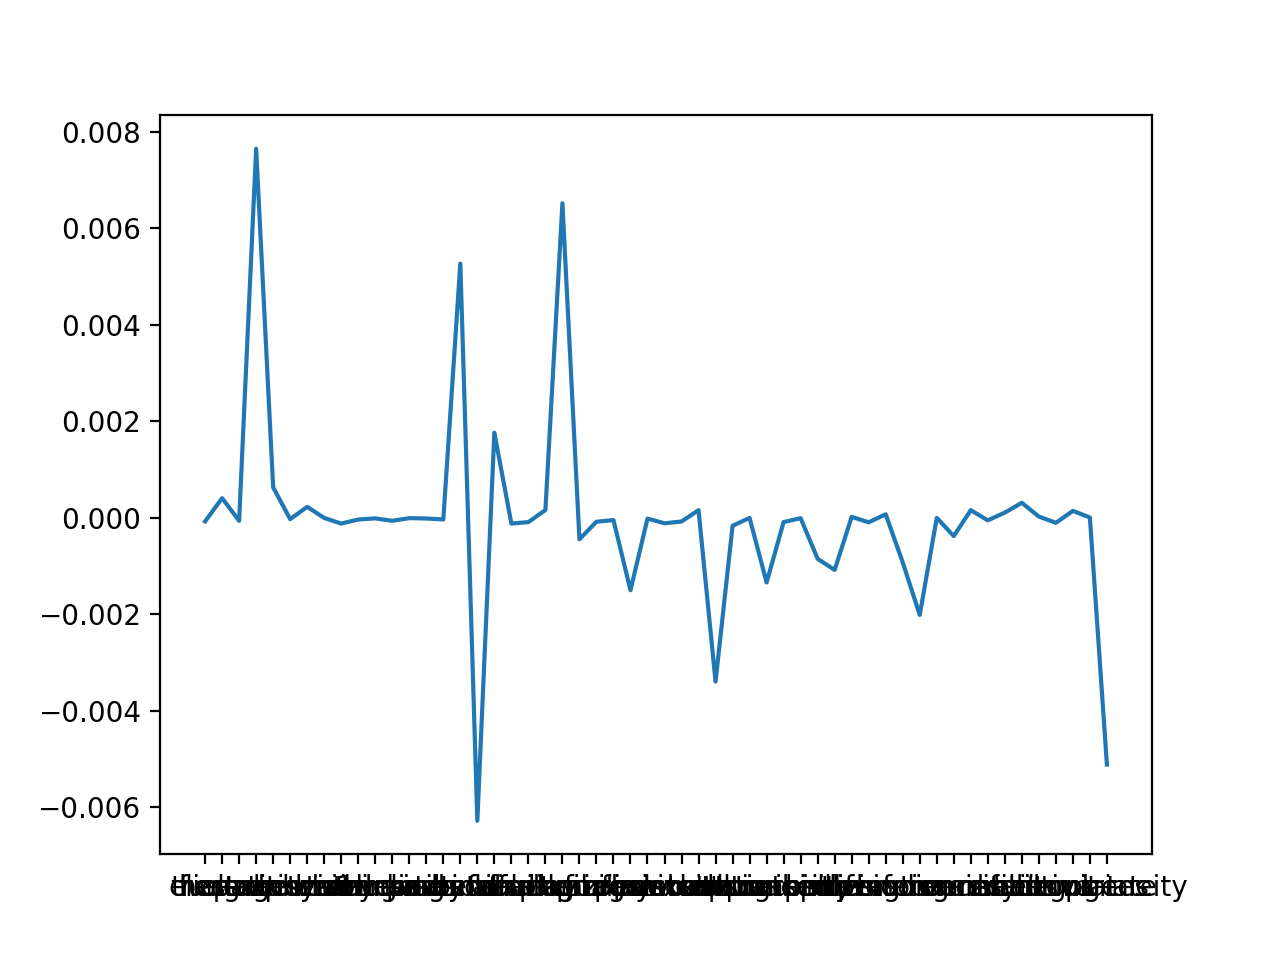

4
[(1944.0, 1.0), (1929.0, 0.9482961069738876), (1928.0, 0.850923840074808), (1962.0, -0.5049539694508772), (1937.0, -0.49170846129327683), (1961.0, -0.4279979885831085), (1957.0, -0.40724771399807447), (1947.0, -0.39814495727550764), (1938.0, -0.3605280630754494), (1935.0, -0.3479614179692311)]


<IPython.core.display.Javascript object>


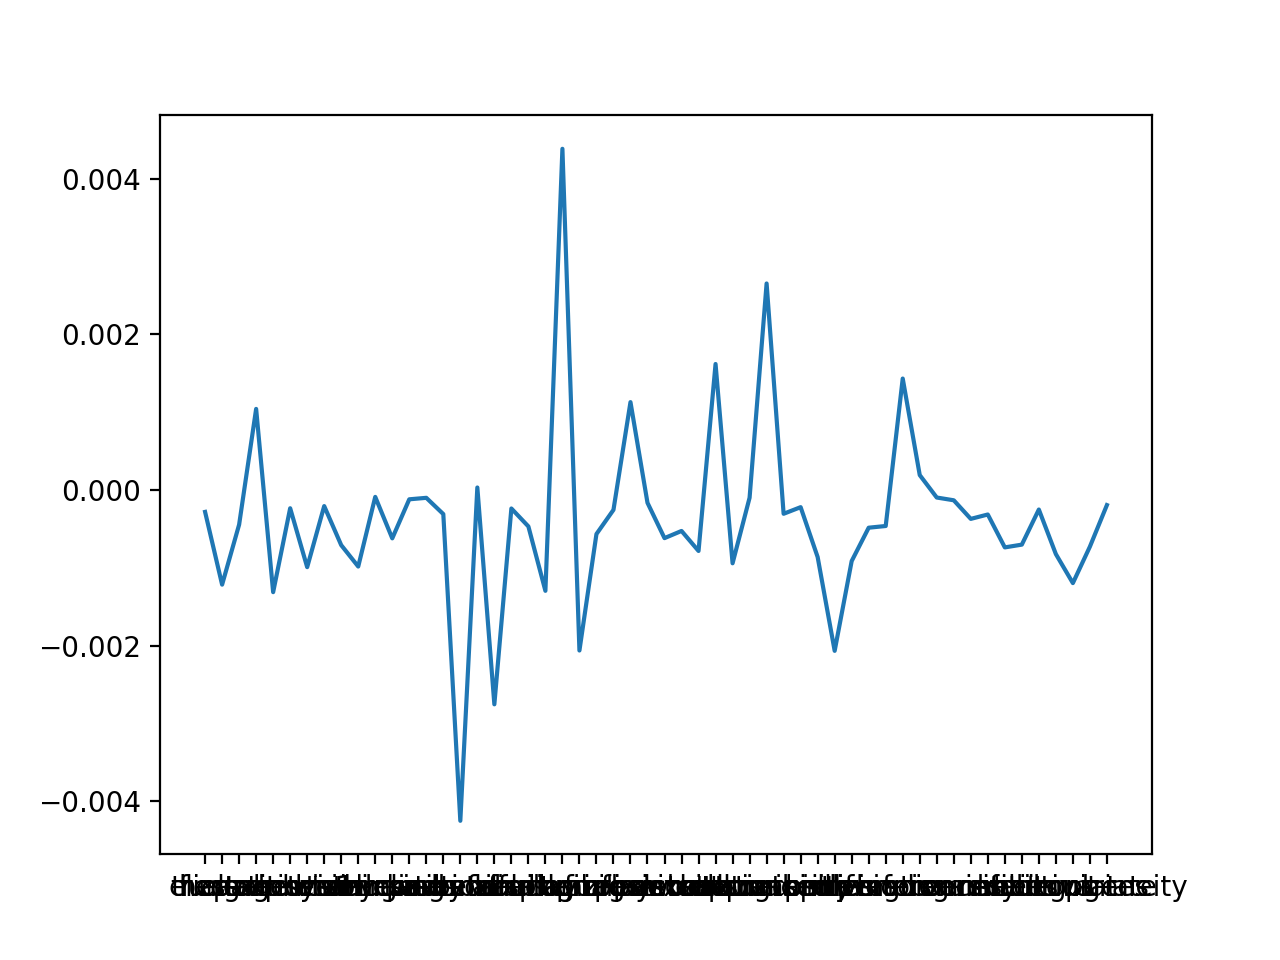

5
[(1931.0, 1.0), (1944.0, 0.5650327907250337), (1927.0, 0.5446443020789192), (1935.0, -0.5191862781690655), (1941.0, 0.4325376493948171), (1929.0, -0.40389355953822437), (1932.0, 0.38543079990831147), (1938.0, 0.3244547903566491), (1960.0, -0.2477485612450449), (1936.0, 0.23511939455013509)]


<IPython.core.display.Javascript object>


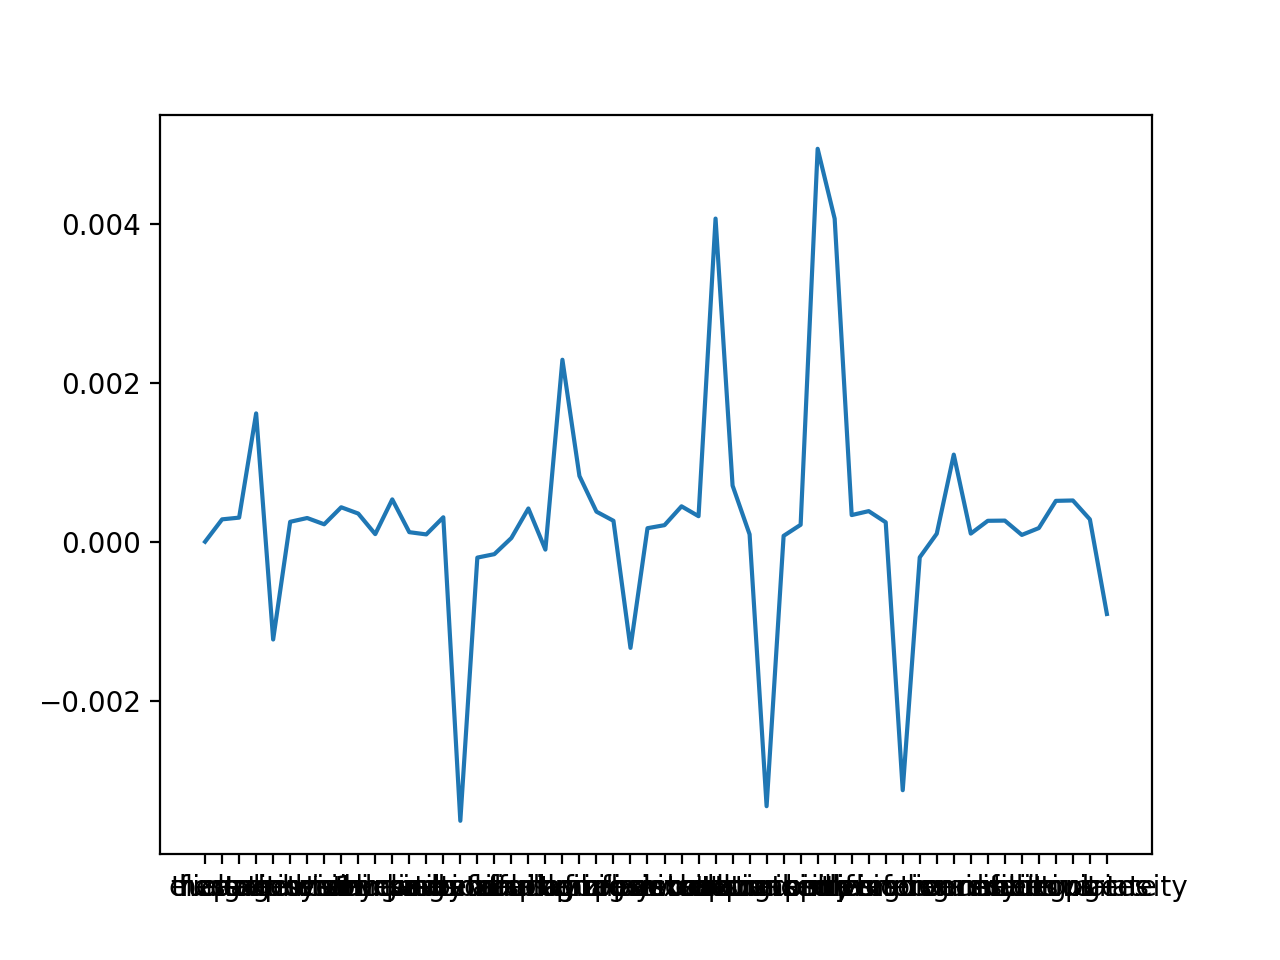

6
[(1935.0, 1.0), (1931.0, 0.9321750568632705), (1940.0, 0.8566681036357839), (1928.0, -0.6833455565880304), (1942.0, 0.6665353093775832), (1941.0, 0.6353542940637674), (1947.0, -0.6166995048446293), (1937.0, 0.5650433063964461), (1929.0, 0.5283460989512622), (1926.0, 0.4863906311674259)]


<IPython.core.display.Javascript object>


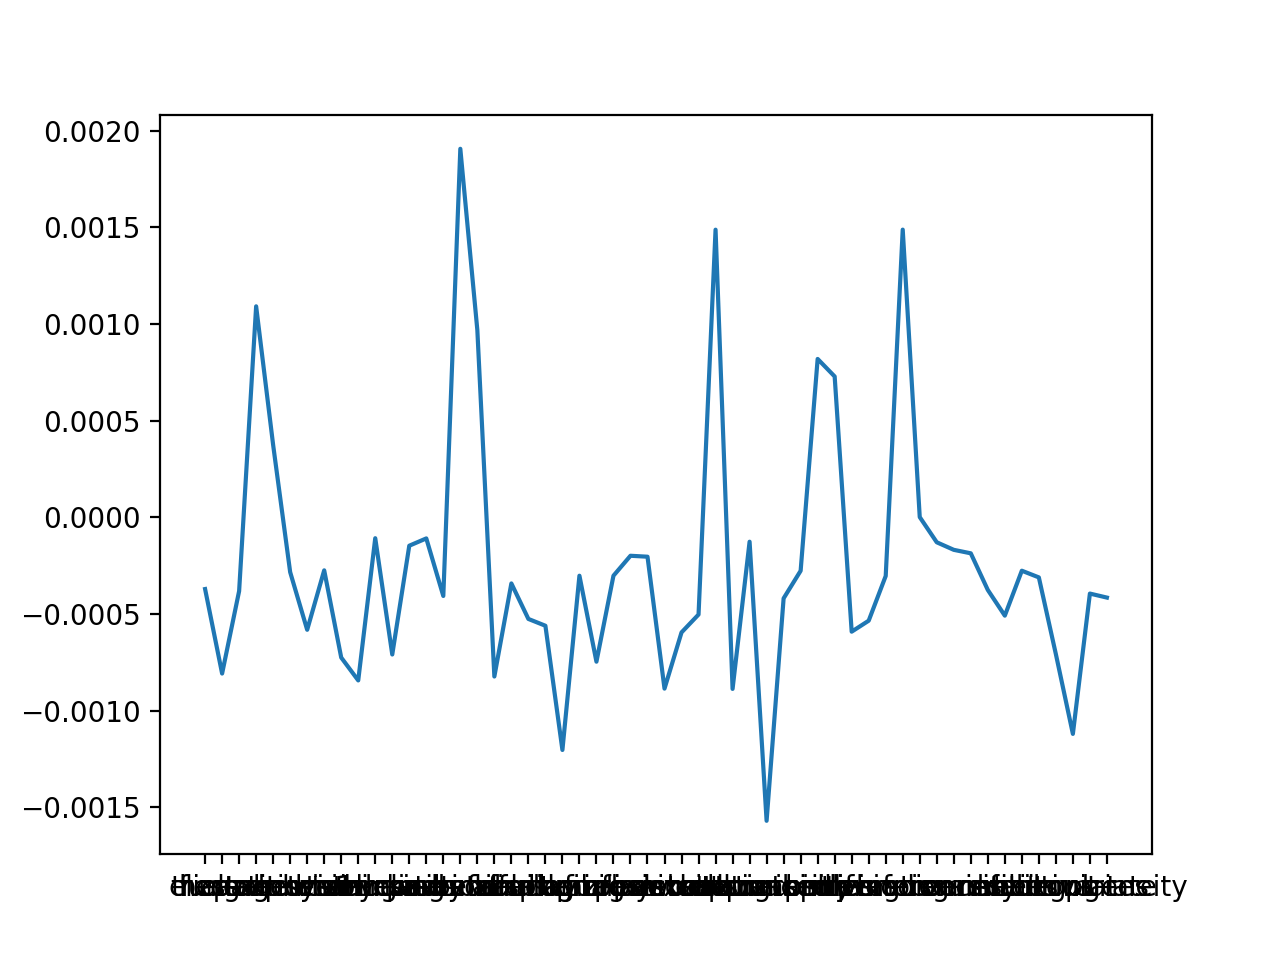

7
[(1947.0, 1.0), (1949.0, 0.8511947247124497), (1937.0, 0.4570575850838612), (1957.0, -0.45231488941132014), (1928.0, -0.3930748610699795), (1964.0, -0.39218030564720696), (1938.0, -0.3641436871715658), (1961.0, -0.3160344319989983), (1942.0, 0.3052639849243987), (1934.0, 0.302740187296852)]


<IPython.core.display.Javascript object>


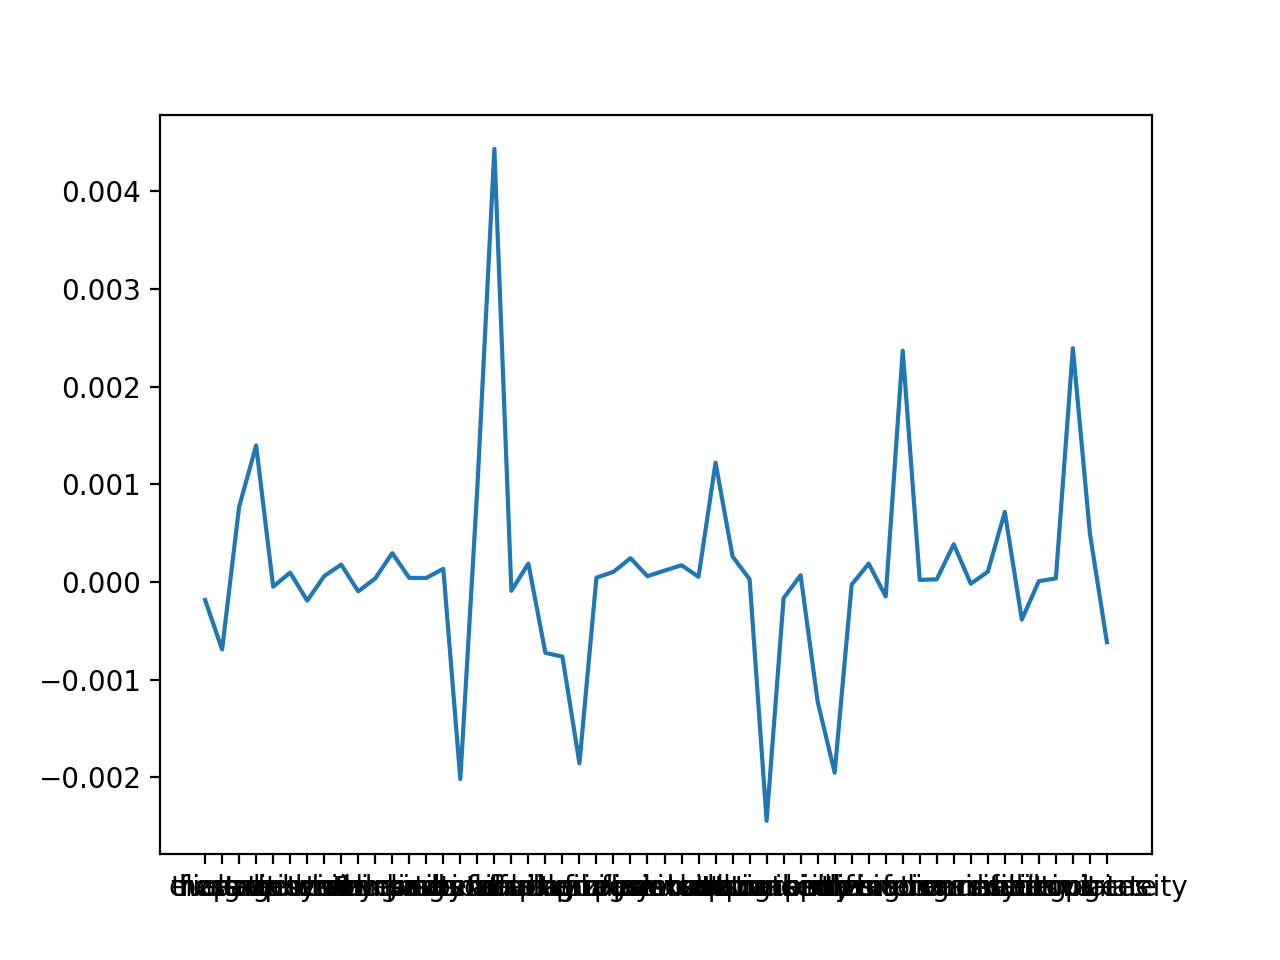

8
[(1957.0, 1.0), (1938.0, 0.7736746599136564), (1932.0, -0.7072177454423654), (1941.0, -0.6752483683351211), (1929.0, 0.6446791501003115), (1964.0, -0.6198788732666399), (1934.0, 0.5519613748828983), (1965.0, -0.5257715873995278), (1967.0, -0.49236359753623854), (1928.0, -0.47767199759207557)]


<IPython.core.display.Javascript object>


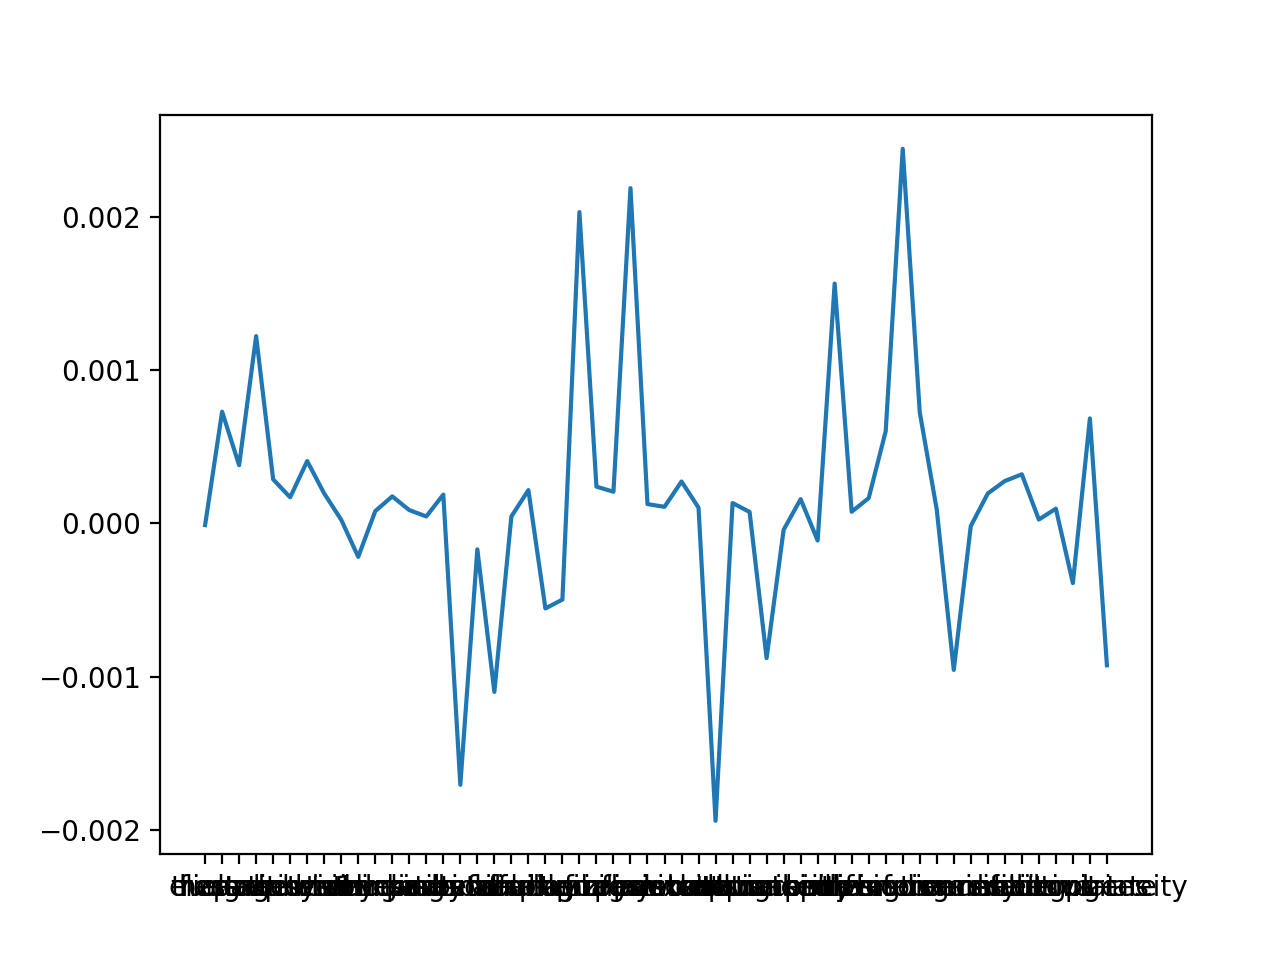

9
[(1927.0, 1.0), (1932.0, -0.5233079538168832), (1941.0, -0.46459705292882814), (1957.0, -0.41108020219770813), (1935.0, 0.3942725277450992), (1931.0, 0.3773588454874178), (1928.0, 0.31073439850751544), (1947.0, 0.27614705988386407), (1934.0, 0.25014275478375336), (1938.0, -0.24242382845880536)]


<IPython.core.display.Javascript object>


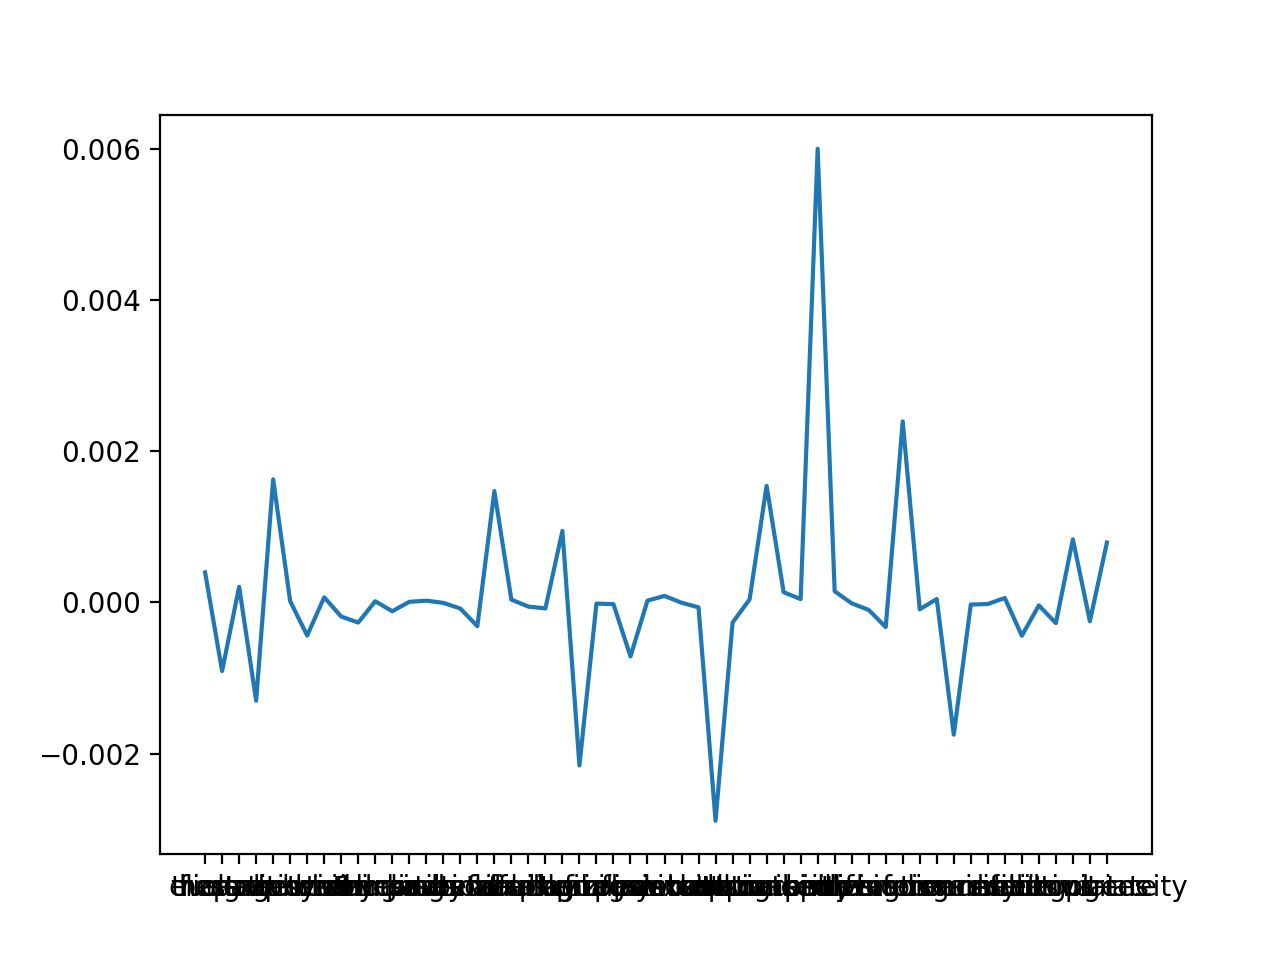

10
[(1935.0, 1.0), (1947.0, -0.8058407601541364), (1957.0, -0.6093355315212652), (1937.0, -0.5770004362459608), (1948.0, 0.5404273868265711), (1960.0, -0.428208911541461), (1955.0, -0.4001260923090326), (1934.0, 0.39909207981567085), (1938.0, -0.3645956695674773), (1954.0, -0.35724816136950654)]


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


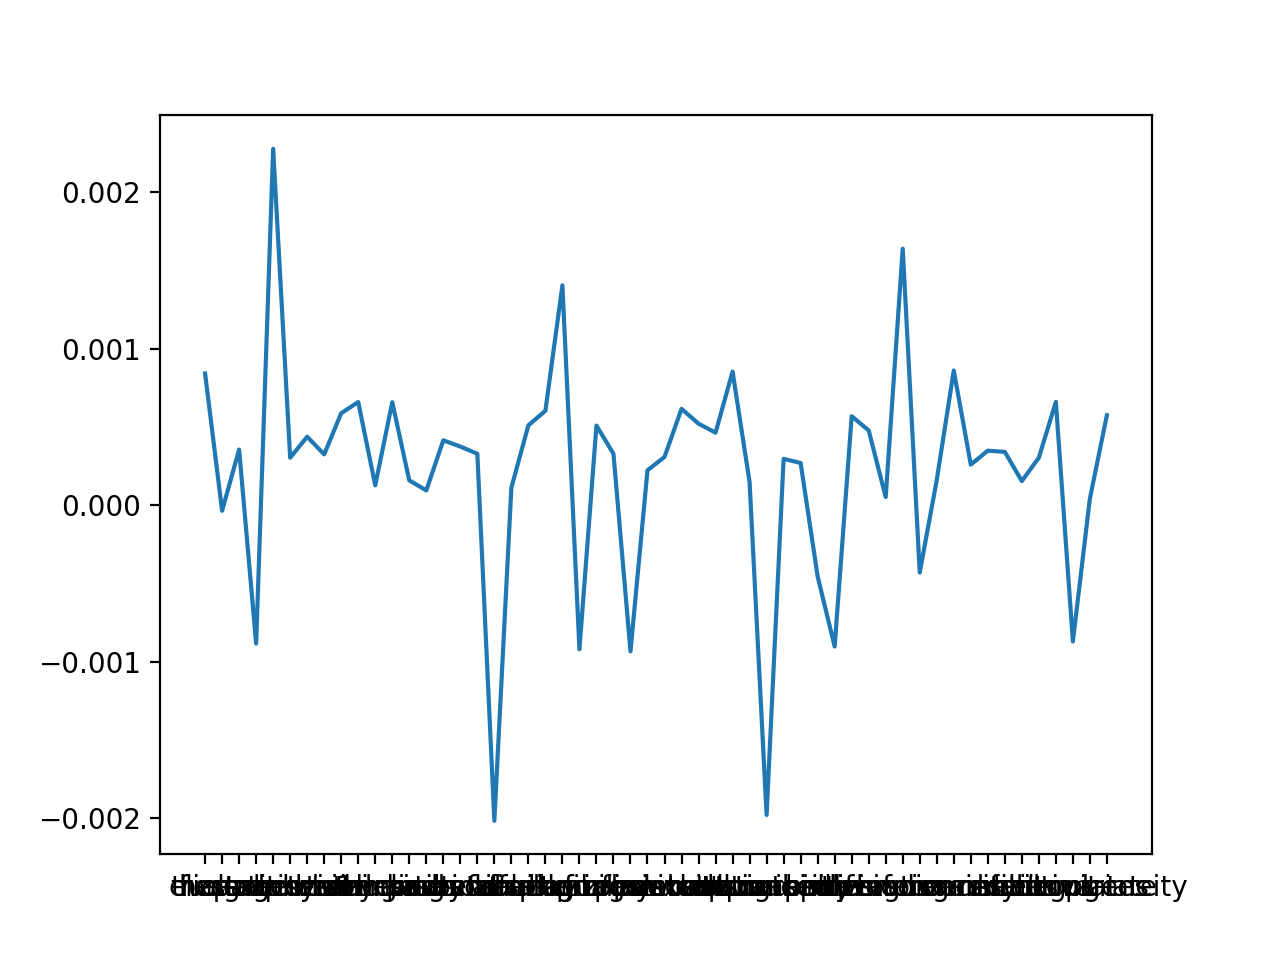

11
[(1938.0, 1.0), (1927.0, -0.9862650828066786), (1936.0, 0.760032564355012), (1947.0, 0.7559921334235747), (1940.0, -0.5058428727311168), (1935.0, 0.4892610721294096), (1942.0, -0.4445505242974098), (1964.0, 0.4205664624509956), (1957.0, -0.4075242158831036), (1928.0, 0.4068824728793814)]


<IPython.core.display.Javascript object>


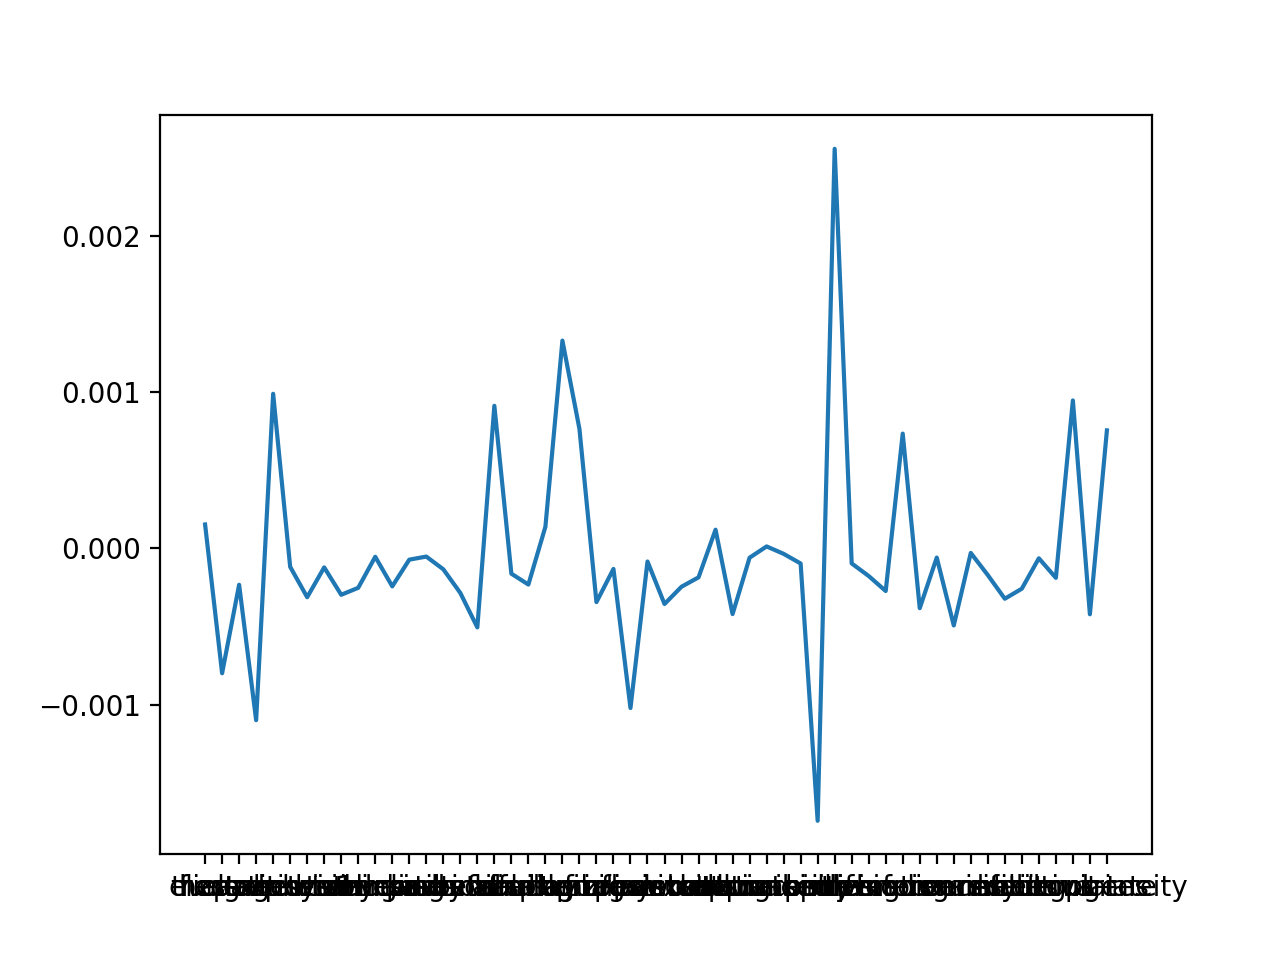

12
[(1960.0, 1.0), (1957.0, -0.9227337195782799), (1954.0, 0.8557106310697962), (1947.0, -0.8166297556791973), (1962.0, 0.7897499571745331), (1951.0, 0.7421862301131763), (1936.0, 0.7418451031216466), (1927.0, -0.6058303974407323), (1949.0, 0.48316160649610523), (1952.0, -0.4406481805377748)]


<IPython.core.display.Javascript object>


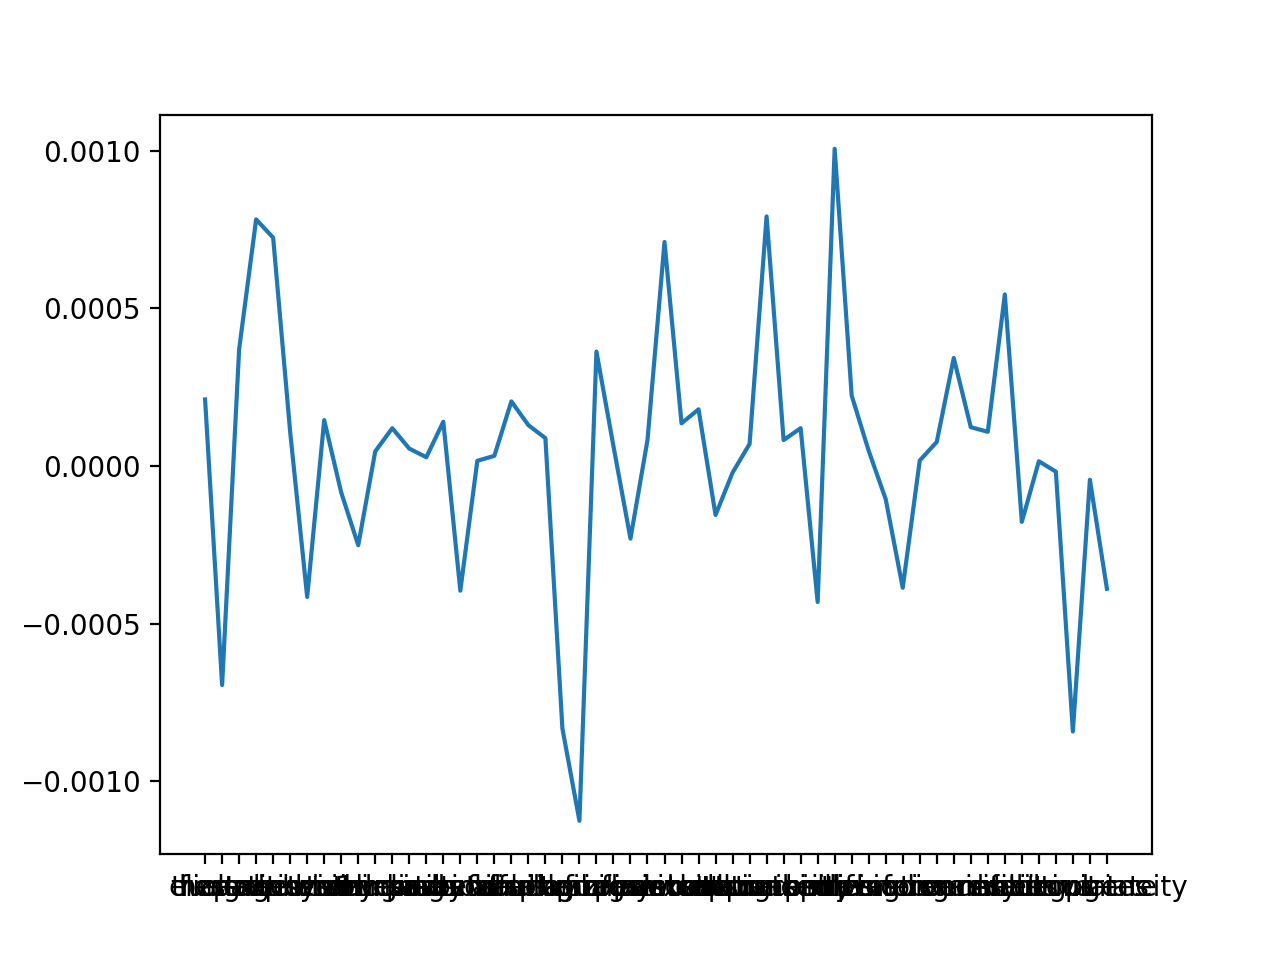

13
[(1932.0, 1.0), (1948.0, 0.8823555852980453), (1957.0, 0.6926770011090009), (1935.0, 0.6150766150066154), (1951.0, 0.5812296611792439), (1964.0, -0.47910508283882325), (1958.0, 0.47602365577837197), (1947.0, 0.47388902128862886), (1960.0, 0.39455417437607726), (1961.0, -0.3620861072637705)]


<IPython.core.display.Javascript object>


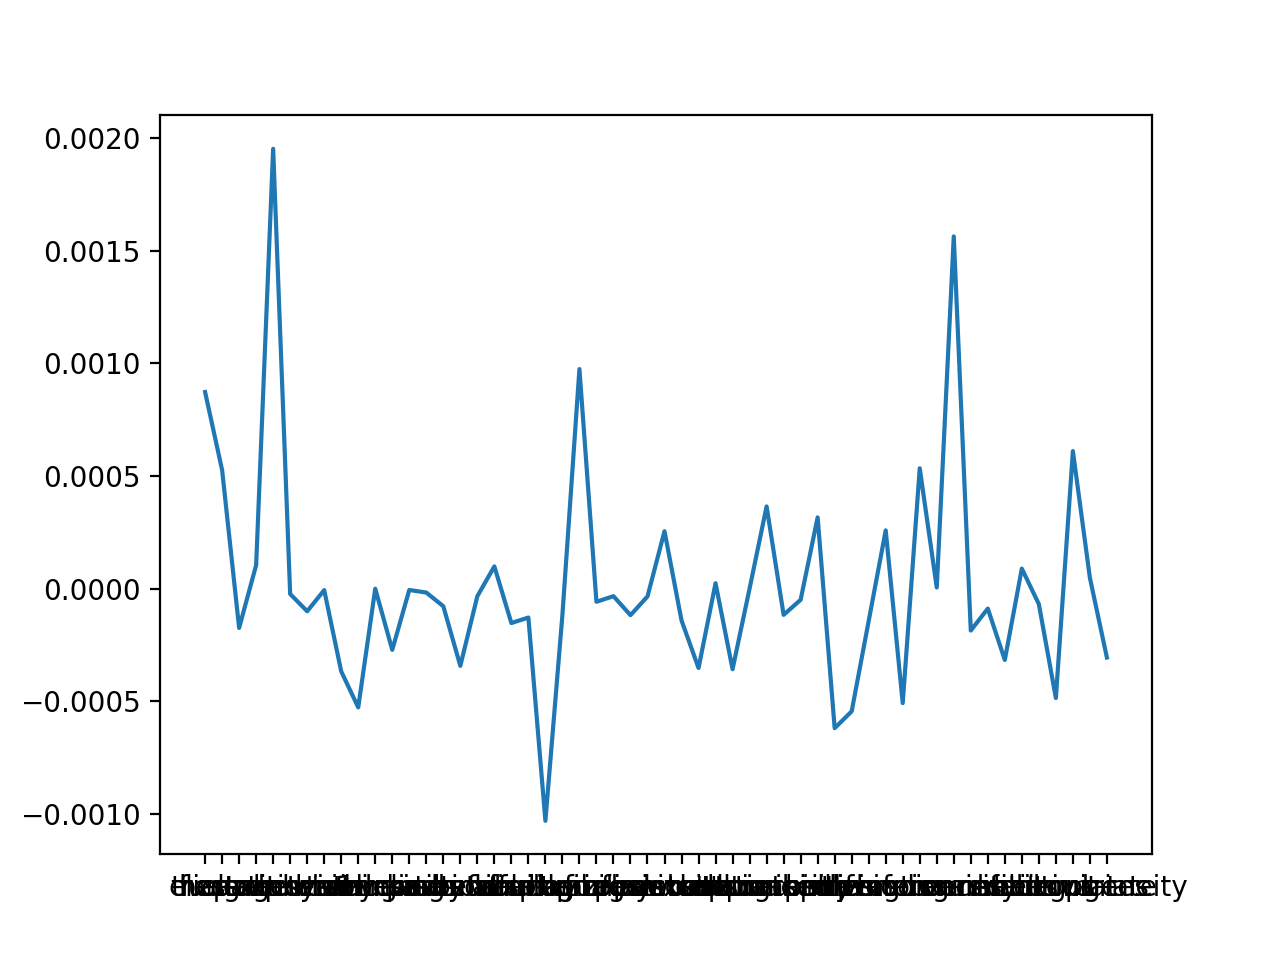

14
[(1932.0, 1.0), (1948.0, -0.6734534167537196), (1941.0, -0.5934284311524693), (1934.0, 0.4840821164717757), (1960.0, 0.2983696736380853), (1965.0, 0.2906929231940022), (1938.0, 0.23647473633531965), (1949.0, 0.22456465266425485), (1951.0, -0.2202294257514556), (1950.0, 0.2014650326135629)]


<IPython.core.display.Javascript object>


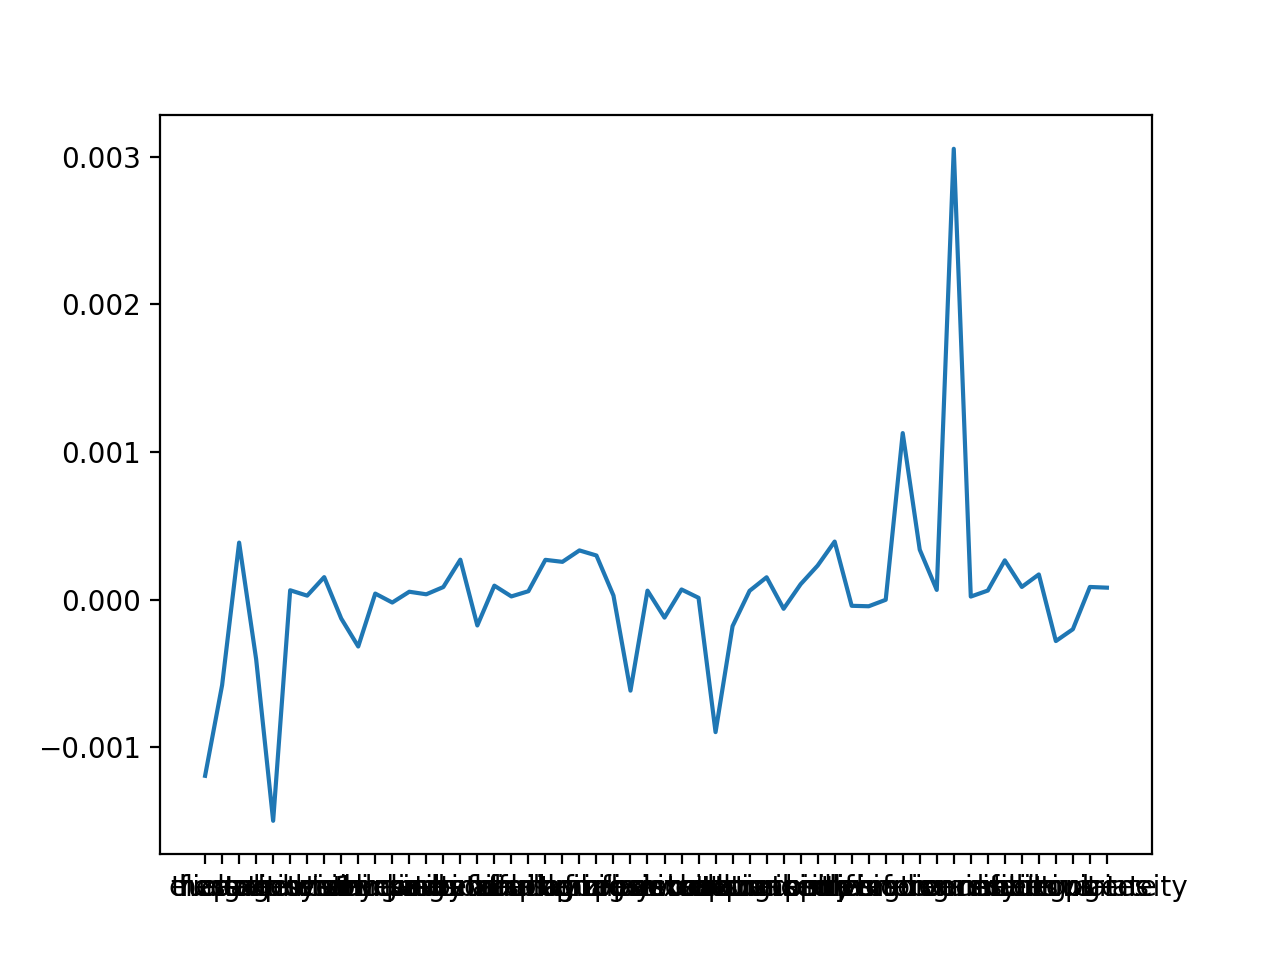

15
[(1949.0, 1.0), (1947.0, -0.7935950105246787), (1951.0, 0.4378903197704354), (1966.0, 0.4282086323716007), (1963.0, 0.41289670033918385), (1936.0, -0.37187425941921726), (1941.0, 0.3599986365193758), (1942.0, -0.3563492848788158), (1940.0, -0.35007842188254024), (1929.0, -0.3114436958746345)]


<IPython.core.display.Javascript object>


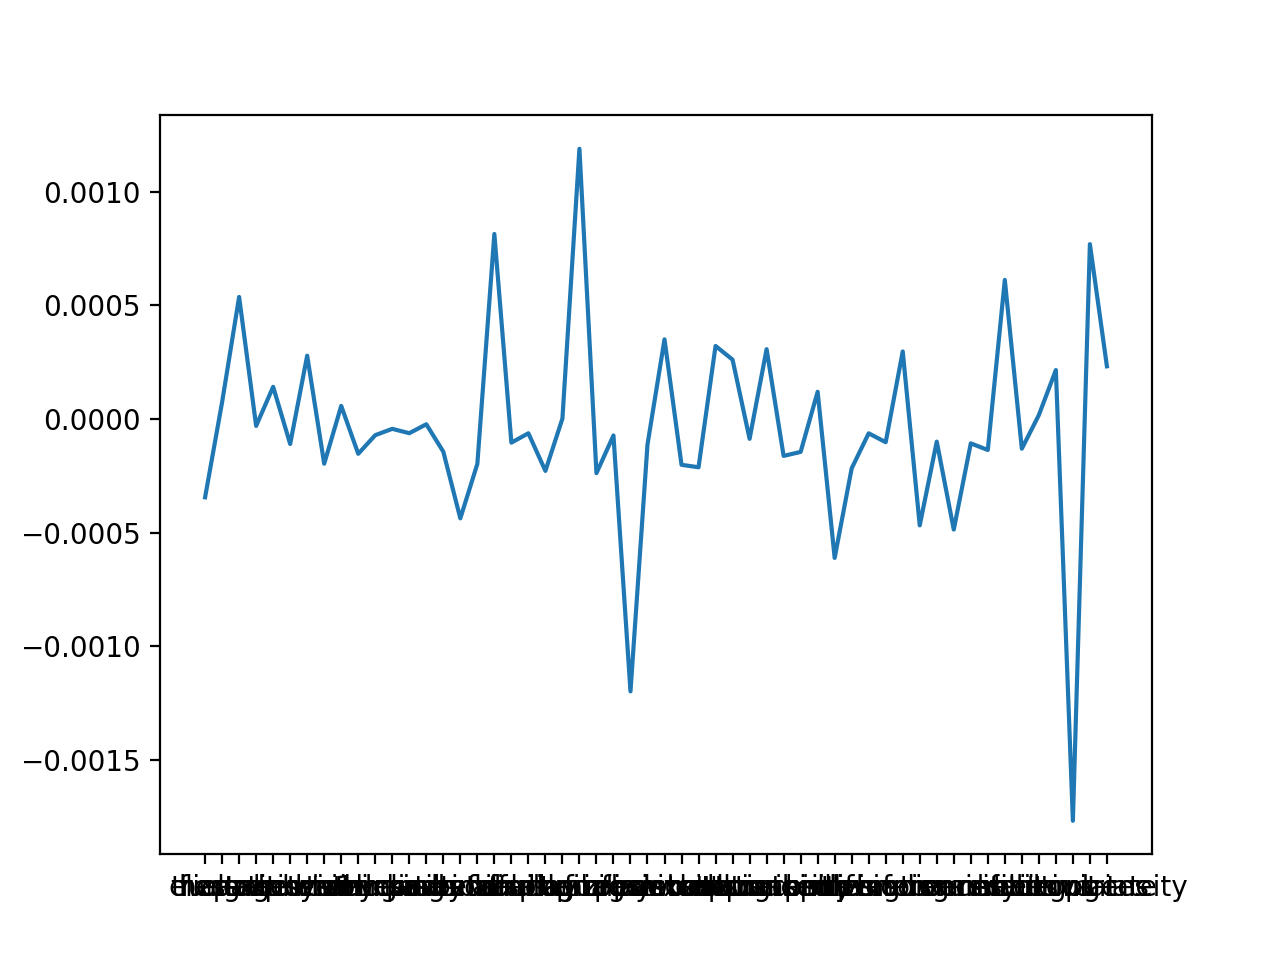

16
[(1956.0, 1.0), (1953.0, 0.7856329087180399), (1949.0, 0.6331336702329684), (1966.0, -0.5285868980195668), (1958.0, -0.4119168378731136), (1938.0, -0.37765659047083494), (1955.0, 0.36801481669567115), (1957.0, 0.36767807078926995), (1944.0, -0.358924745639091), (1936.0, 0.34403926432527115)]


<IPython.core.display.Javascript object>


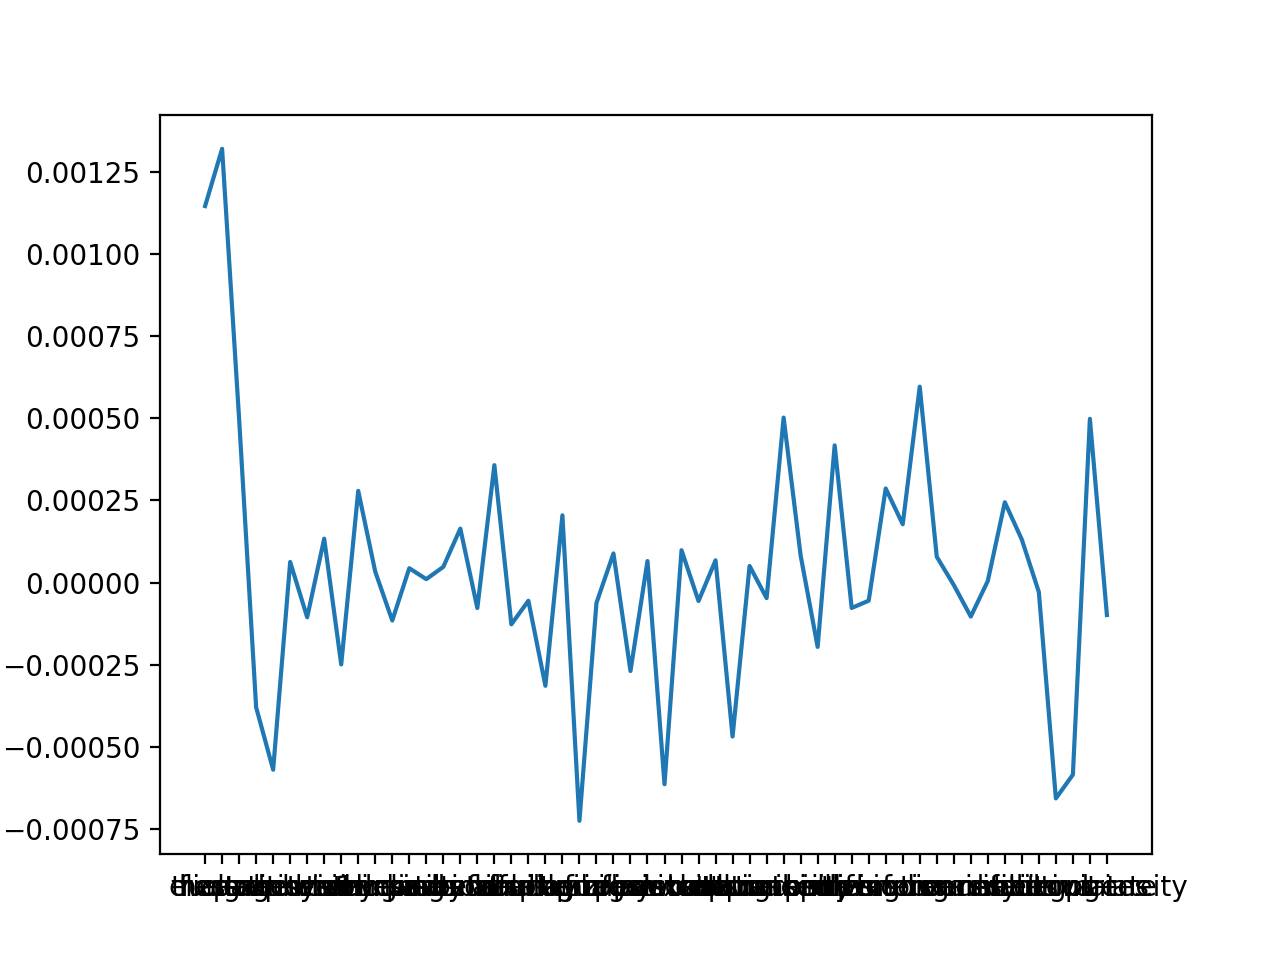

17
[(1948.0, 1.0), (1964.0, 0.9380658374297592), (1949.0, 0.8050957958886156), (1962.0, 0.8025229459084031), (1934.0, -0.7392436647782333), (1956.0, -0.6094302746716673), (1970.0, -0.5602364959421394), (1955.0, -0.5270347393013187), (1974.0, -0.5177375764189752), (1983.0, -0.5094844217423999)]


<IPython.core.display.Javascript object>


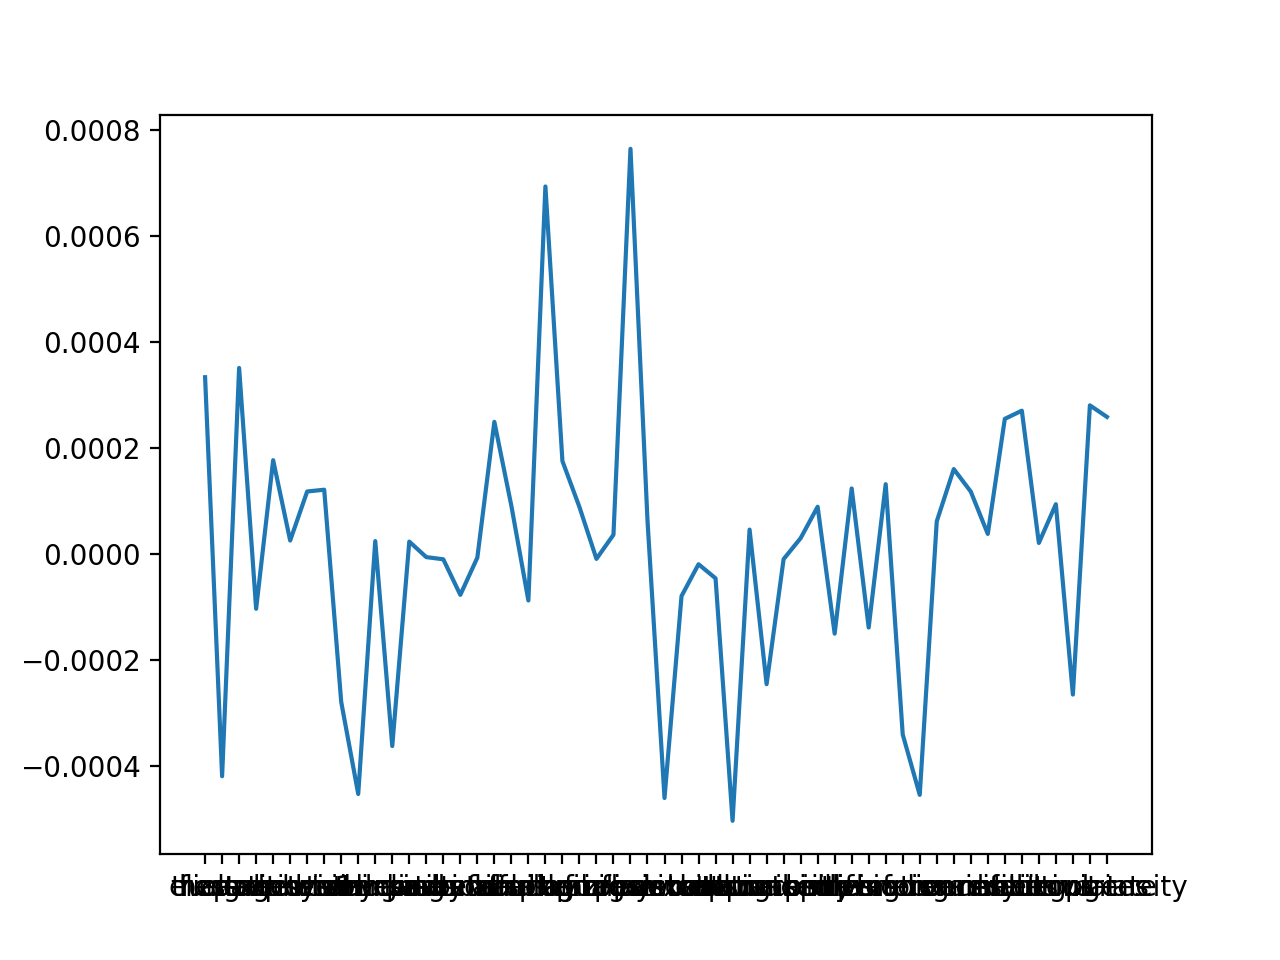

18
[(1948.0, 1.0), (1956.0, 0.8580122487489239), (1941.0, -0.8141006543179692), (1965.0, -0.7238402375992113), (1928.0, -0.6870931812129631), (1957.0, -0.6344894677437181), (2000.0, -0.6217494290433319), (1980.0, 0.6067837915109651), (1968.0, 0.5773392857145019), (1954.0, -0.5382554936906644)]


<IPython.core.display.Javascript object>


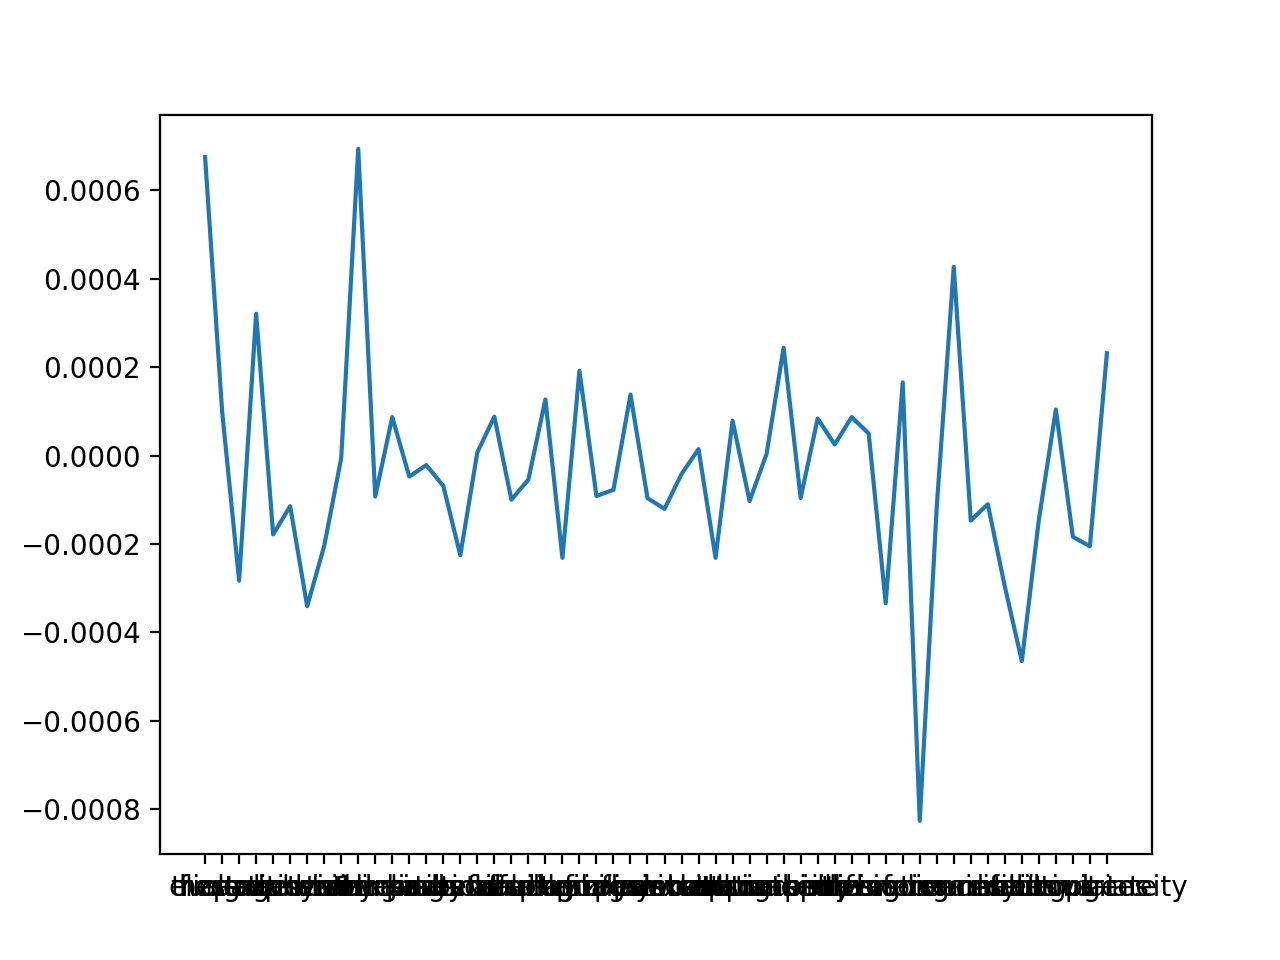

19
[(1962.0, 1.0), (1963.0, 0.9703010148131311), (1938.0, -0.6247785156814782), (1971.0, 0.572036056879962), (1998.0, -0.4545335161287025), (1986.0, 0.4213675449512531), (1966.0, -0.42108124825226295), (1936.0, 0.4114971873415005), (1989.0, 0.4055559633874531), (1958.0, -0.3995537981419302)]


<IPython.core.display.Javascript object>


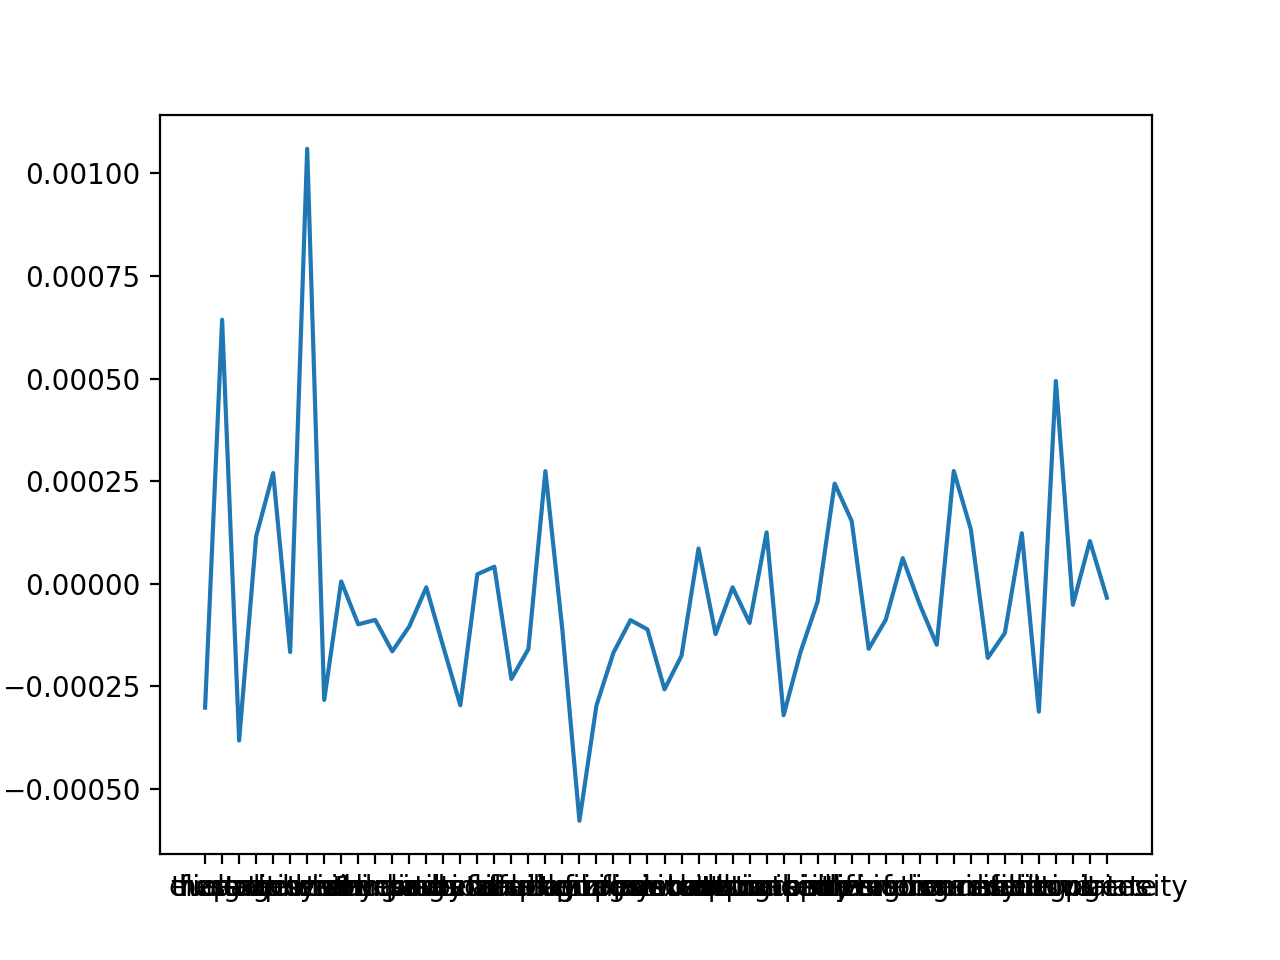

In [142]:
for i in range(20):
    print(i)
    jmaxs = np.argsort(-np.abs(U[:, i]))[:10]
    maxs = list(zip(wordrates_matrix.index[jmaxs], U[jmaxs, i]))
    print(maxs)
    fig = plt.figure()
    plt.plot(years, V[i, :])
    

graphene


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


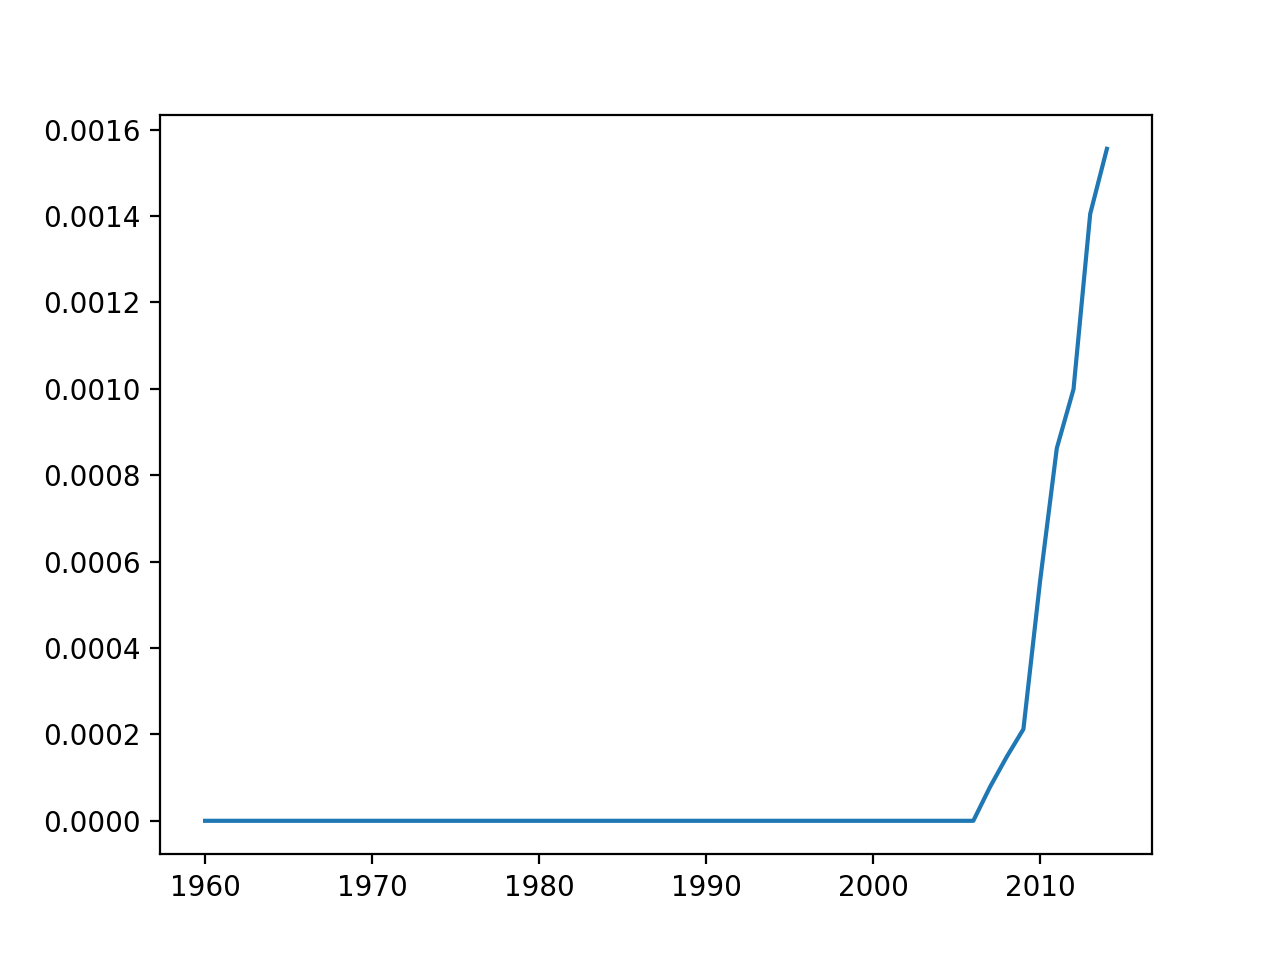

malta


<IPython.core.display.Javascript object>


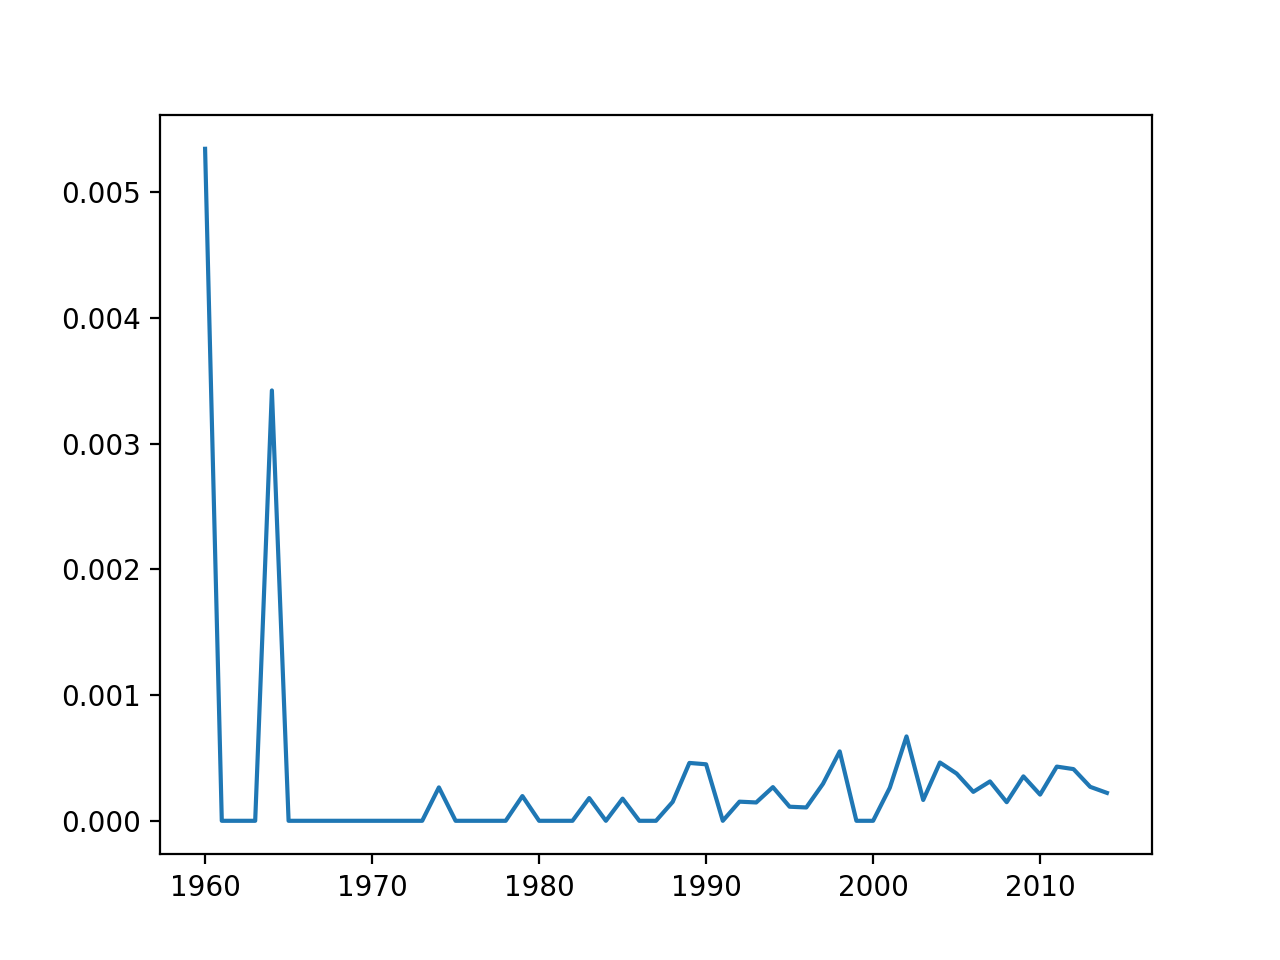

nanoparticle


<IPython.core.display.Javascript object>


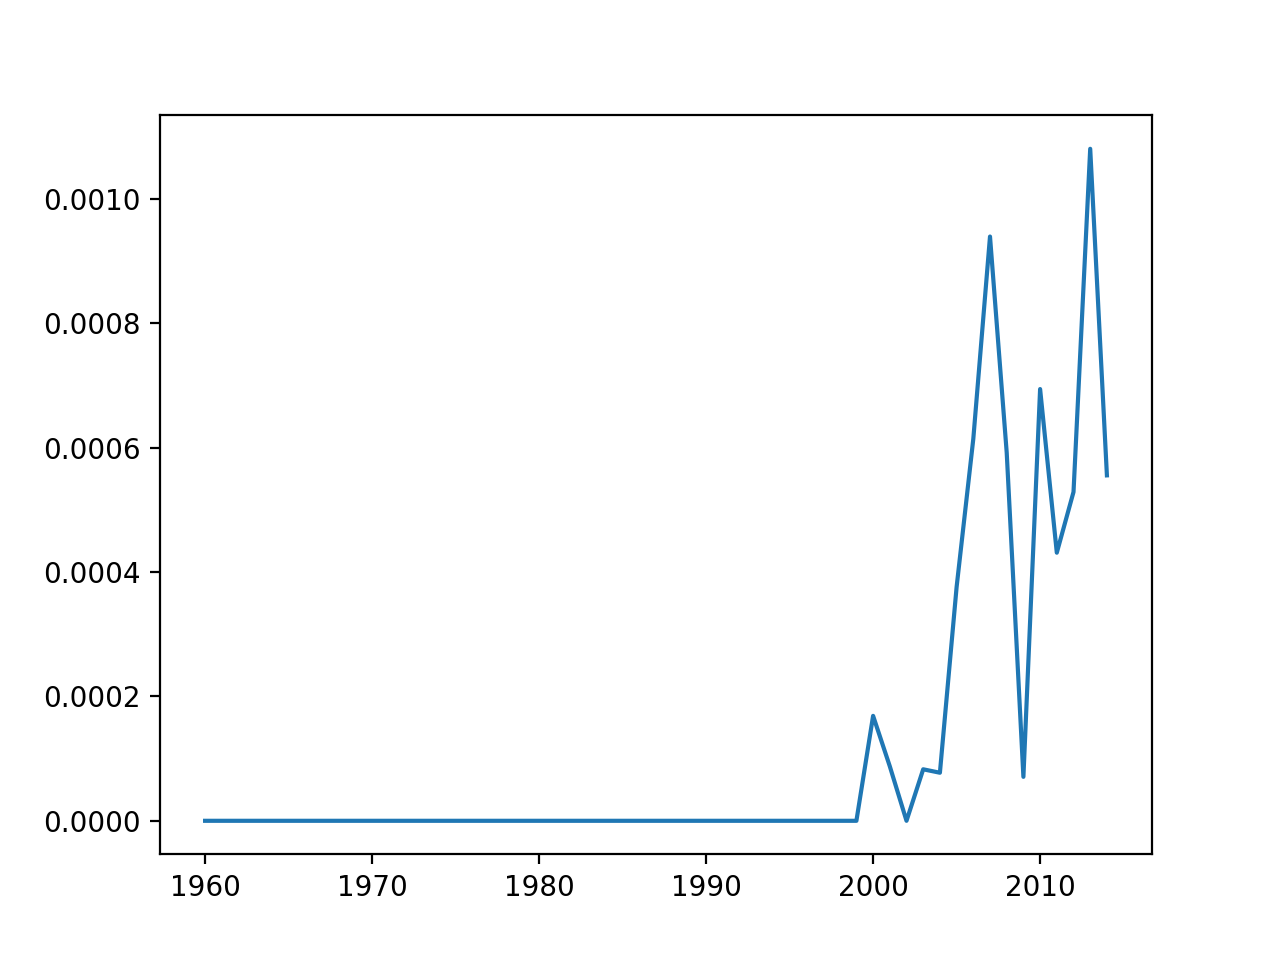

microfluidic


<IPython.core.display.Javascript object>


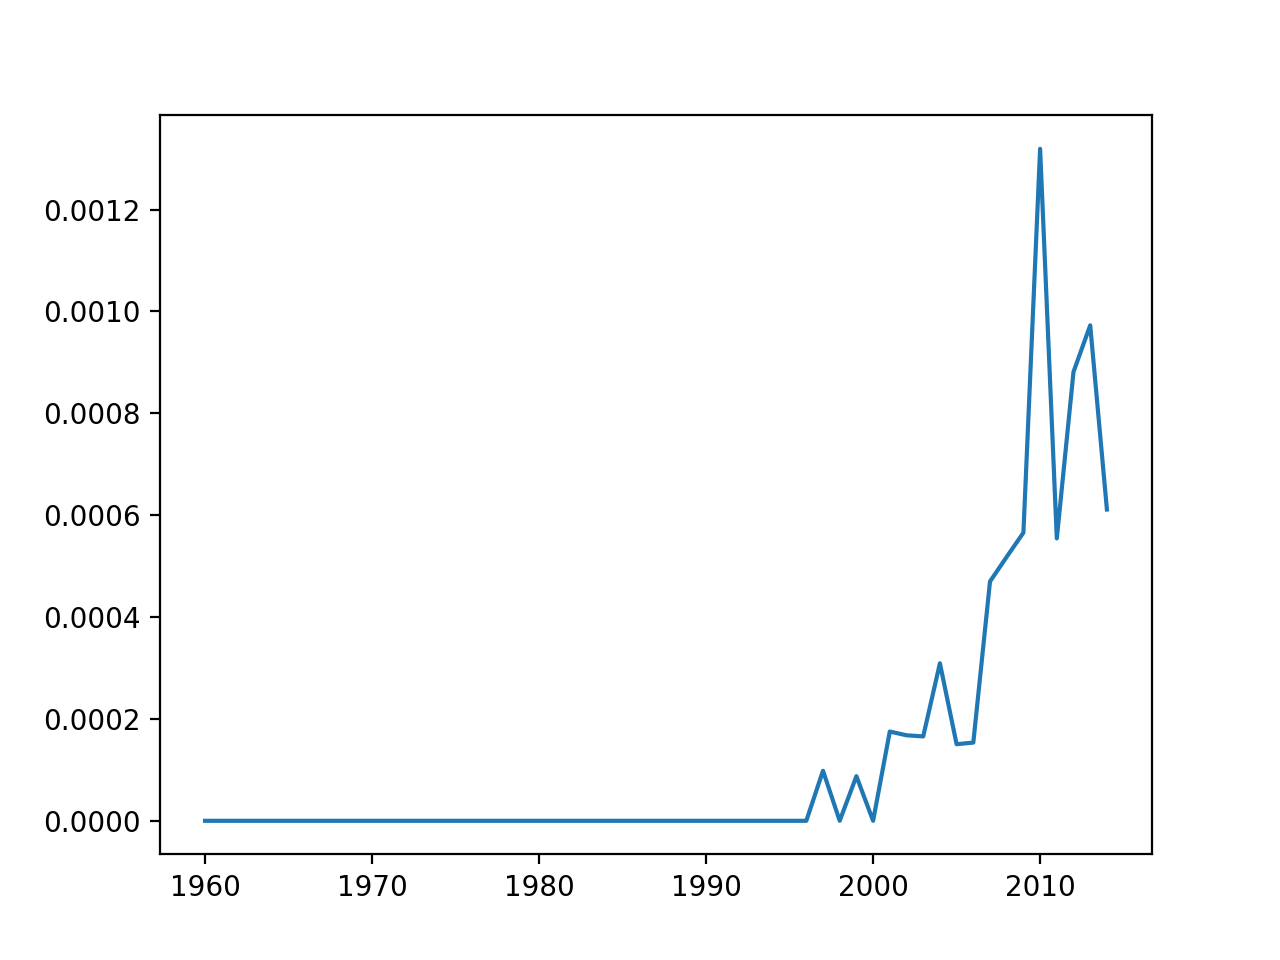

mimo


<IPython.core.display.Javascript object>


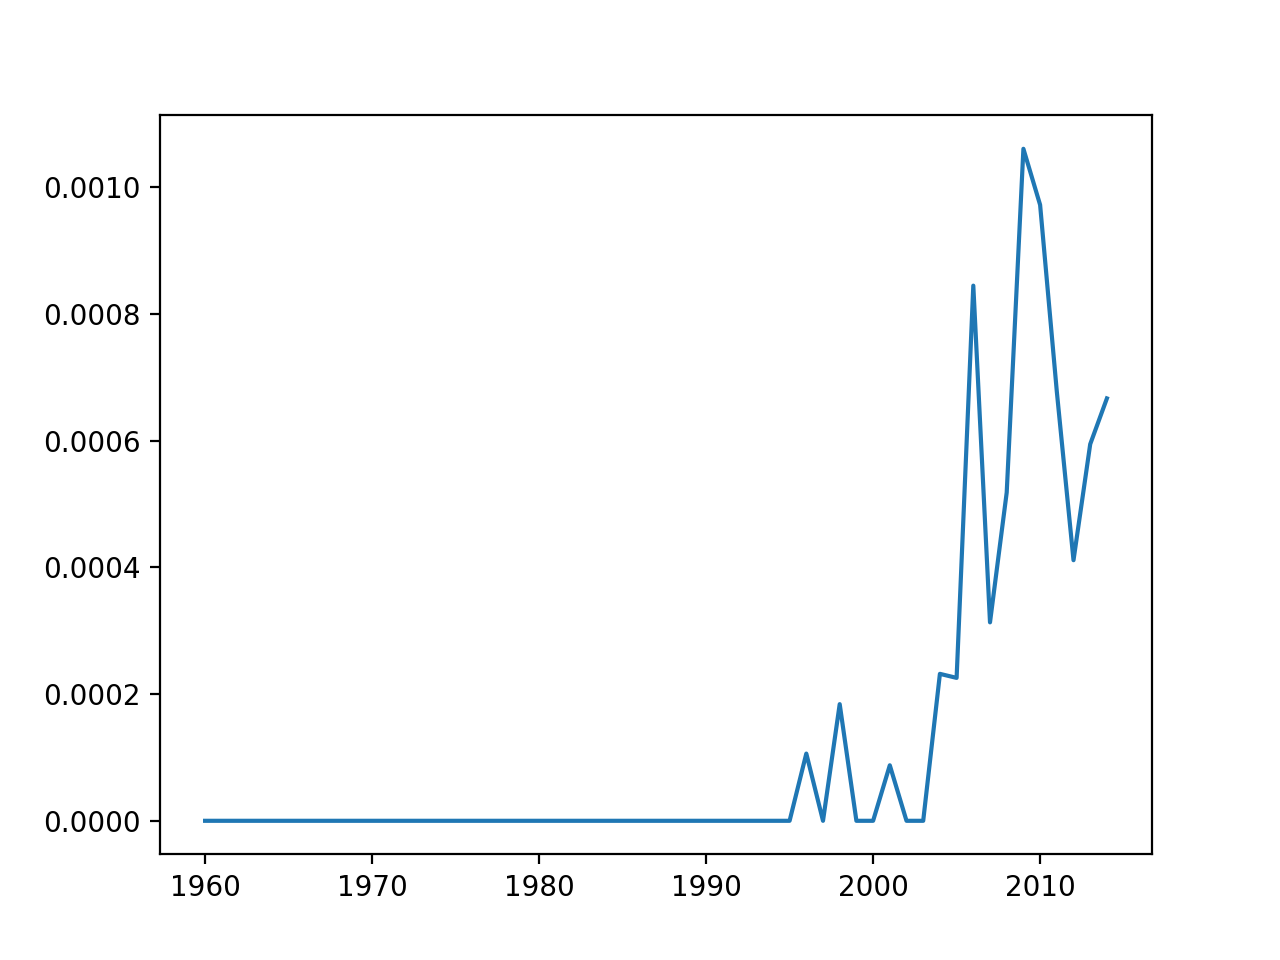

elearning


<IPython.core.display.Javascript object>


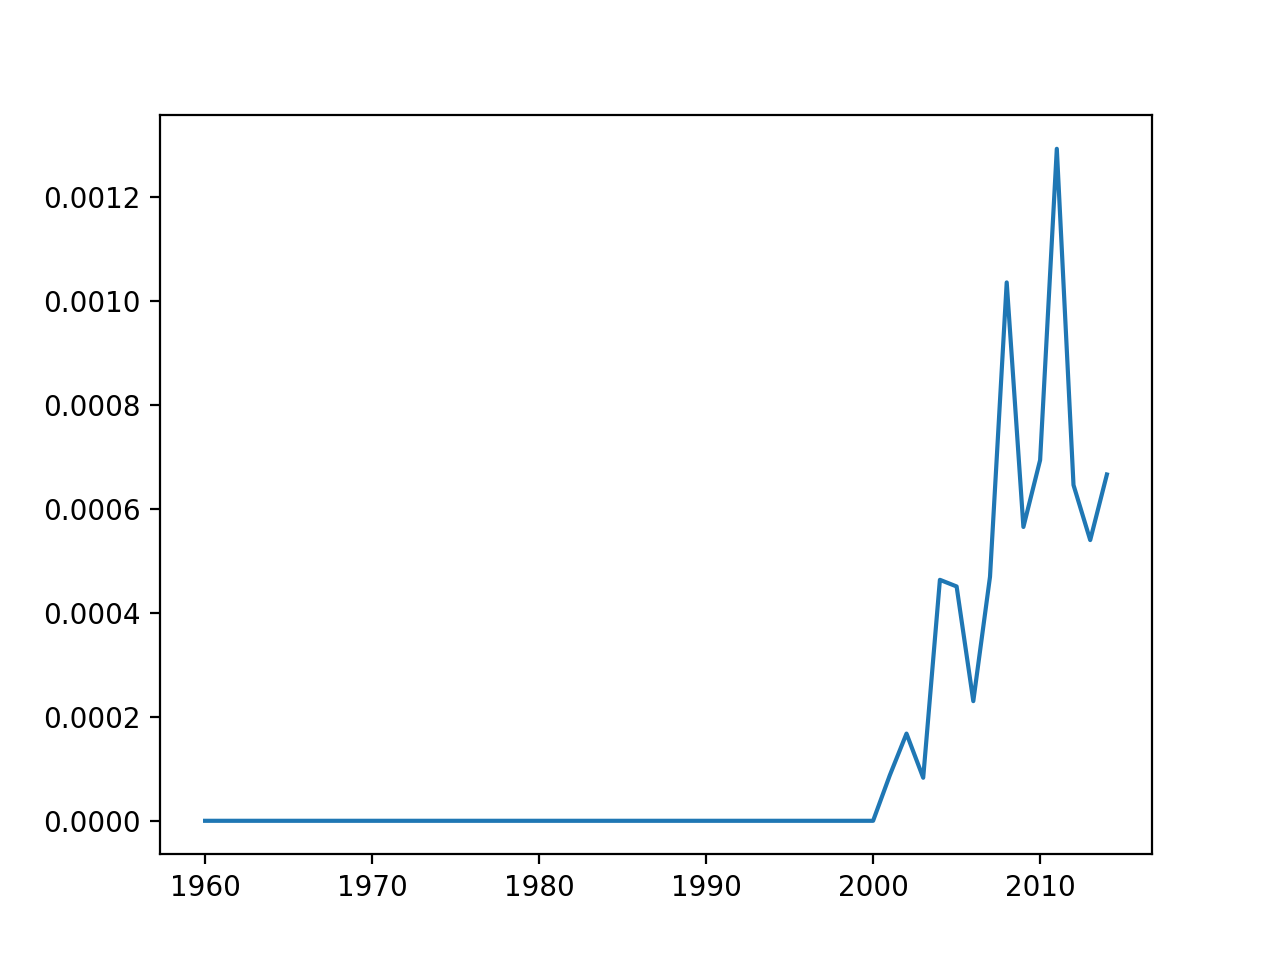

proteomics


<IPython.core.display.Javascript object>


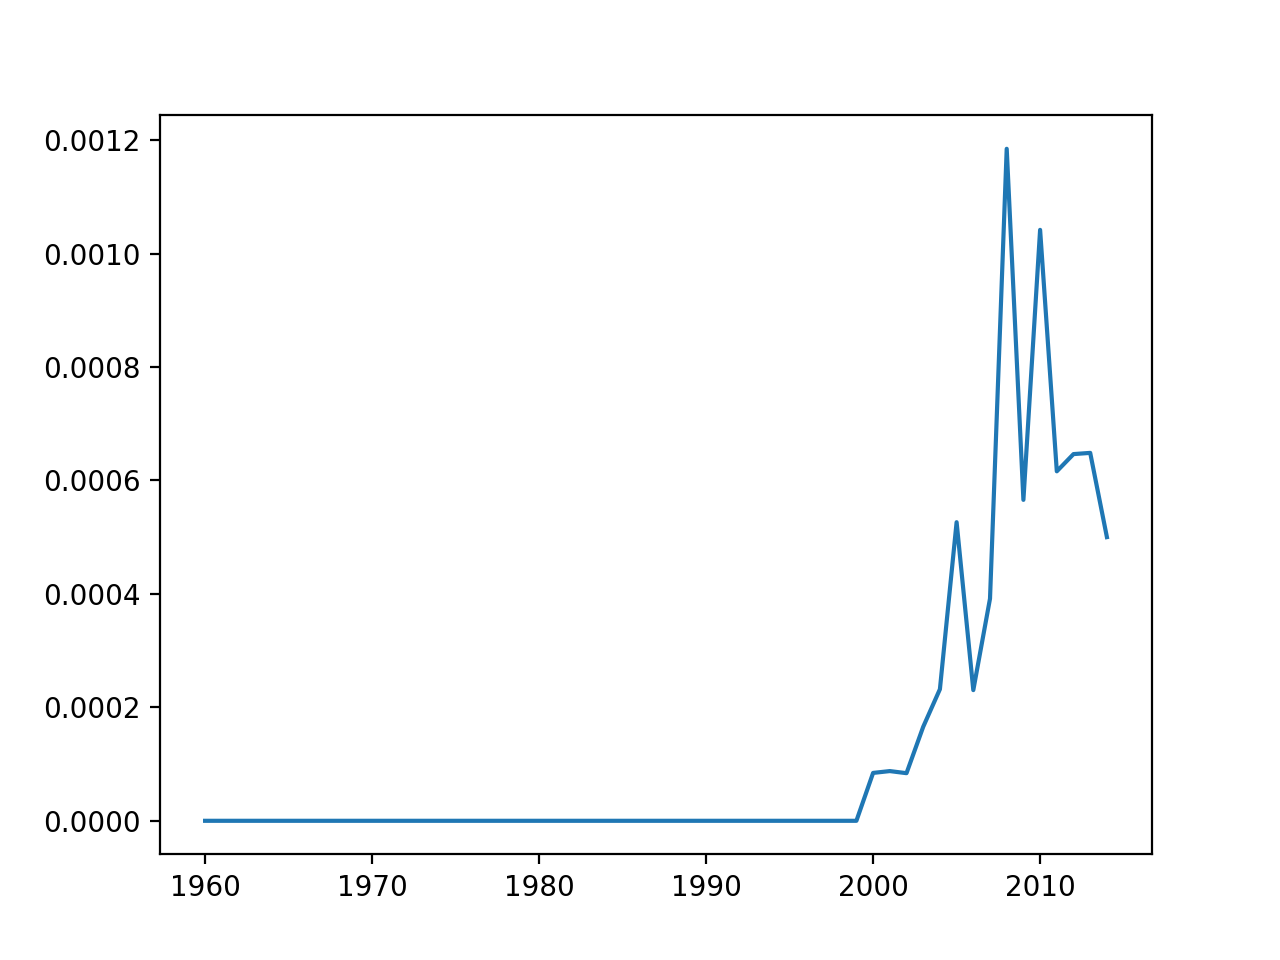

scaffolds


<IPython.core.display.Javascript object>


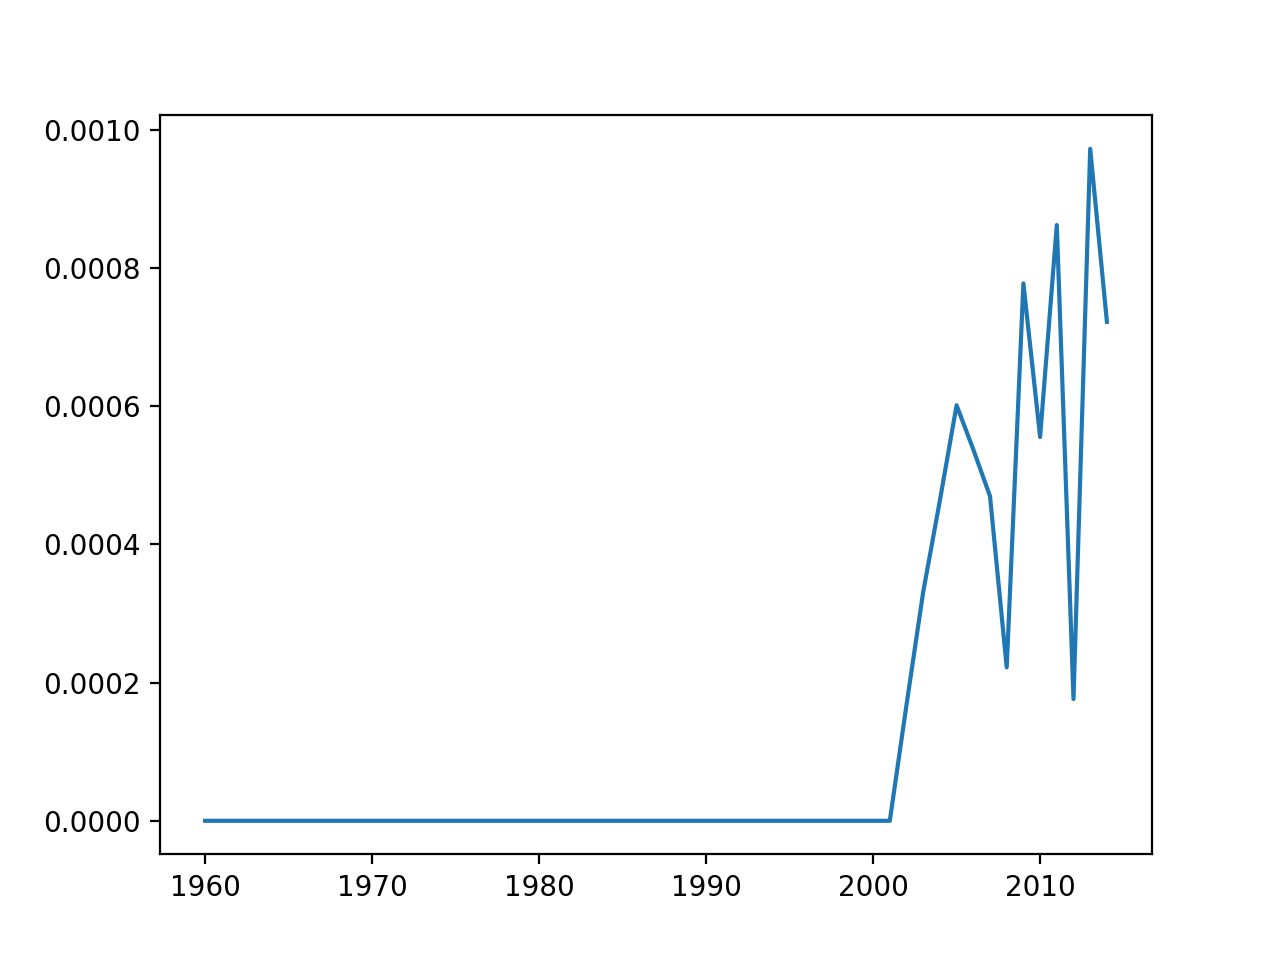

hoc


<IPython.core.display.Javascript object>


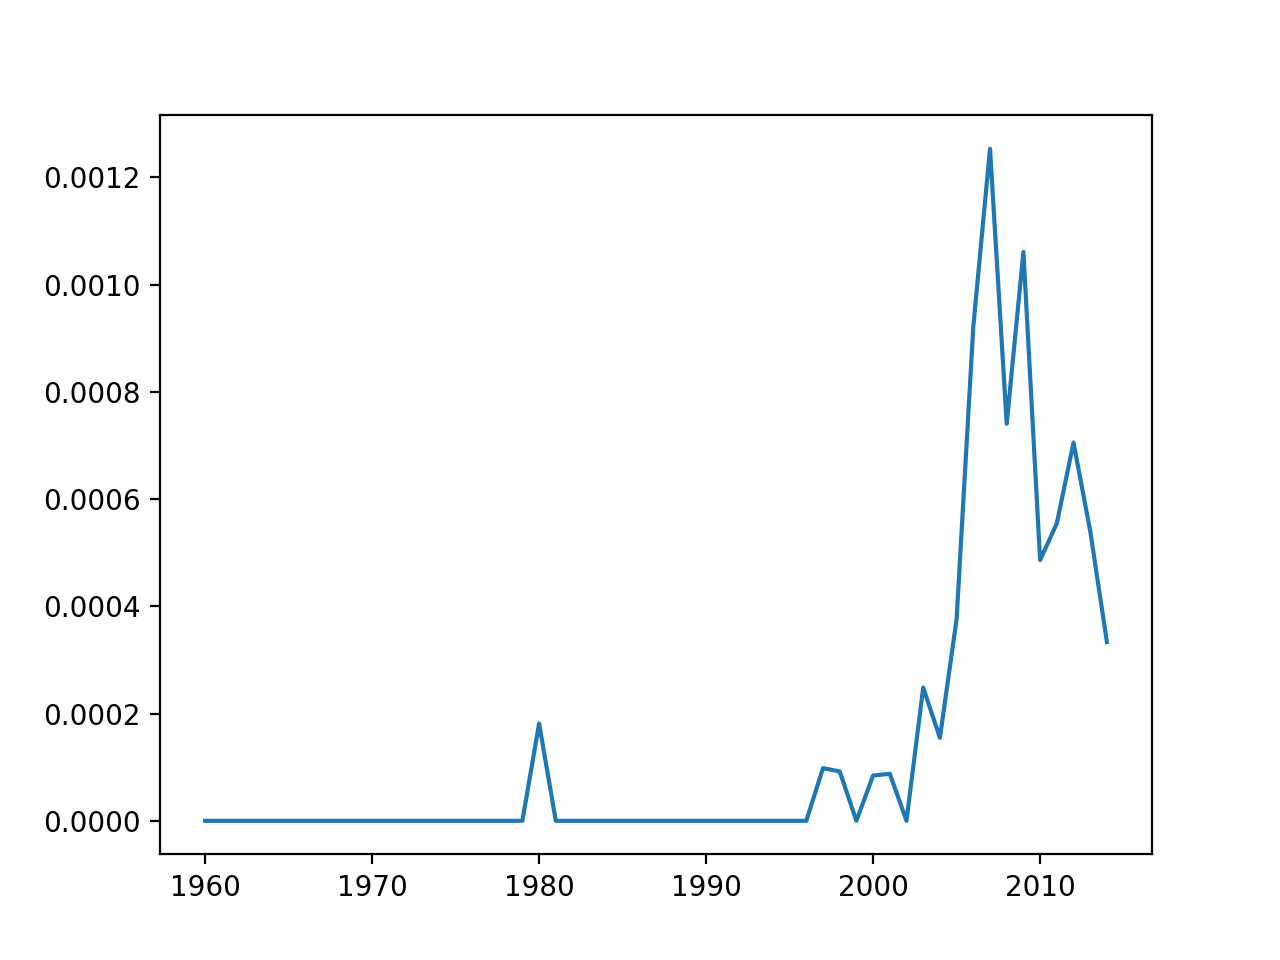

atm


<IPython.core.display.Javascript object>


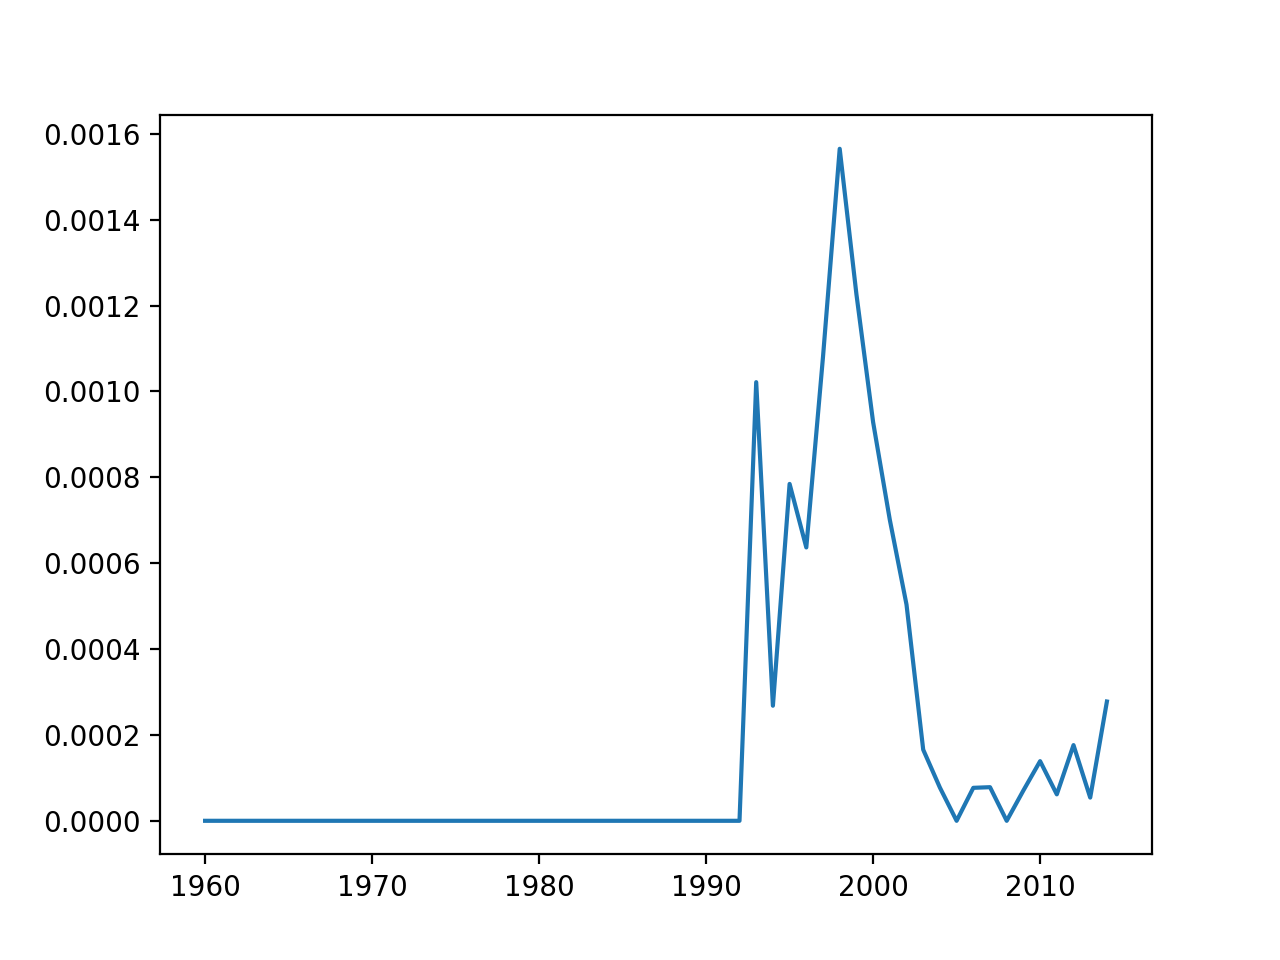

proteomic


<IPython.core.display.Javascript object>


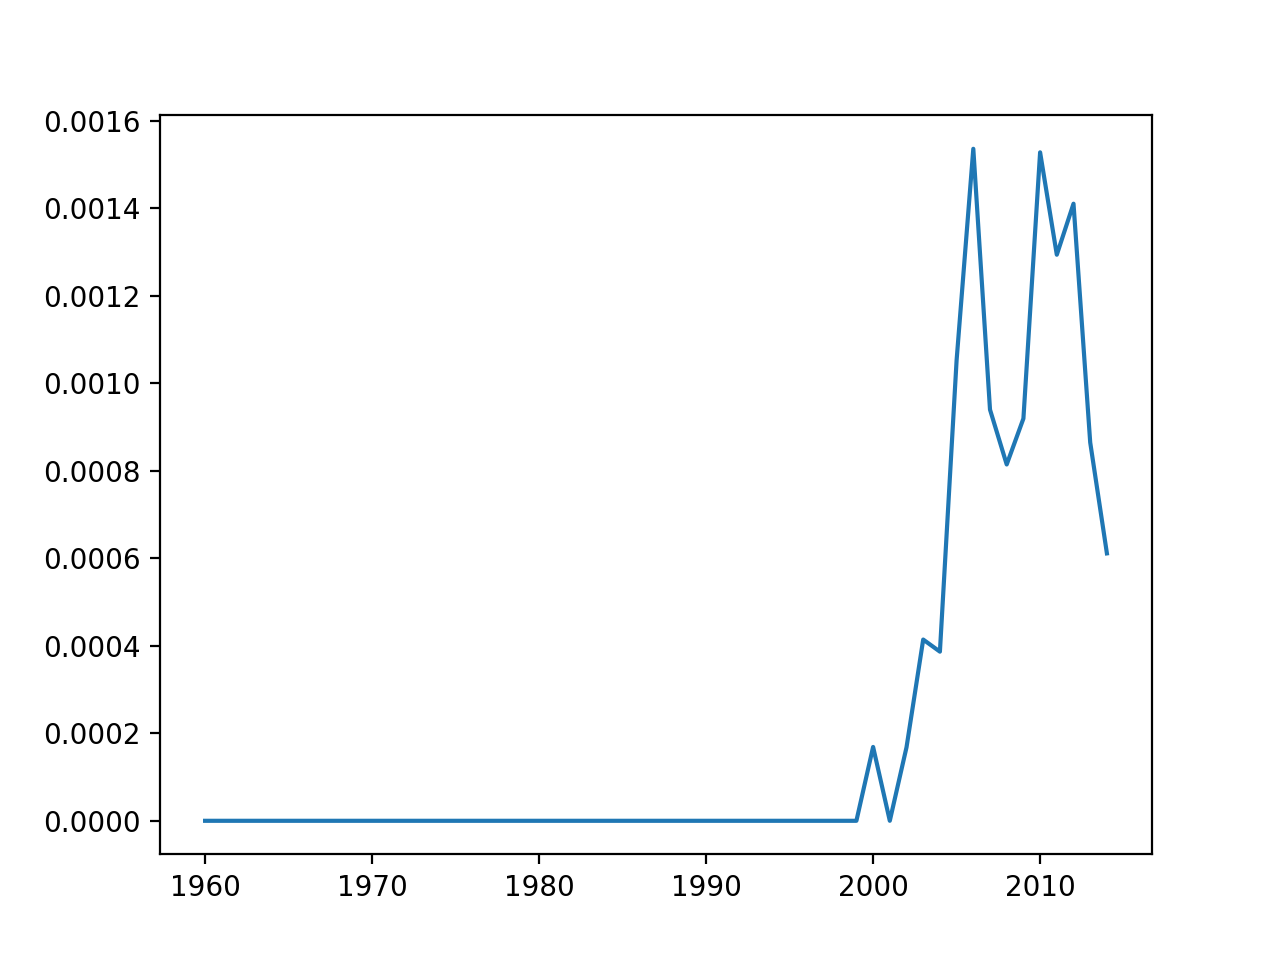

biomarkers


<IPython.core.display.Javascript object>


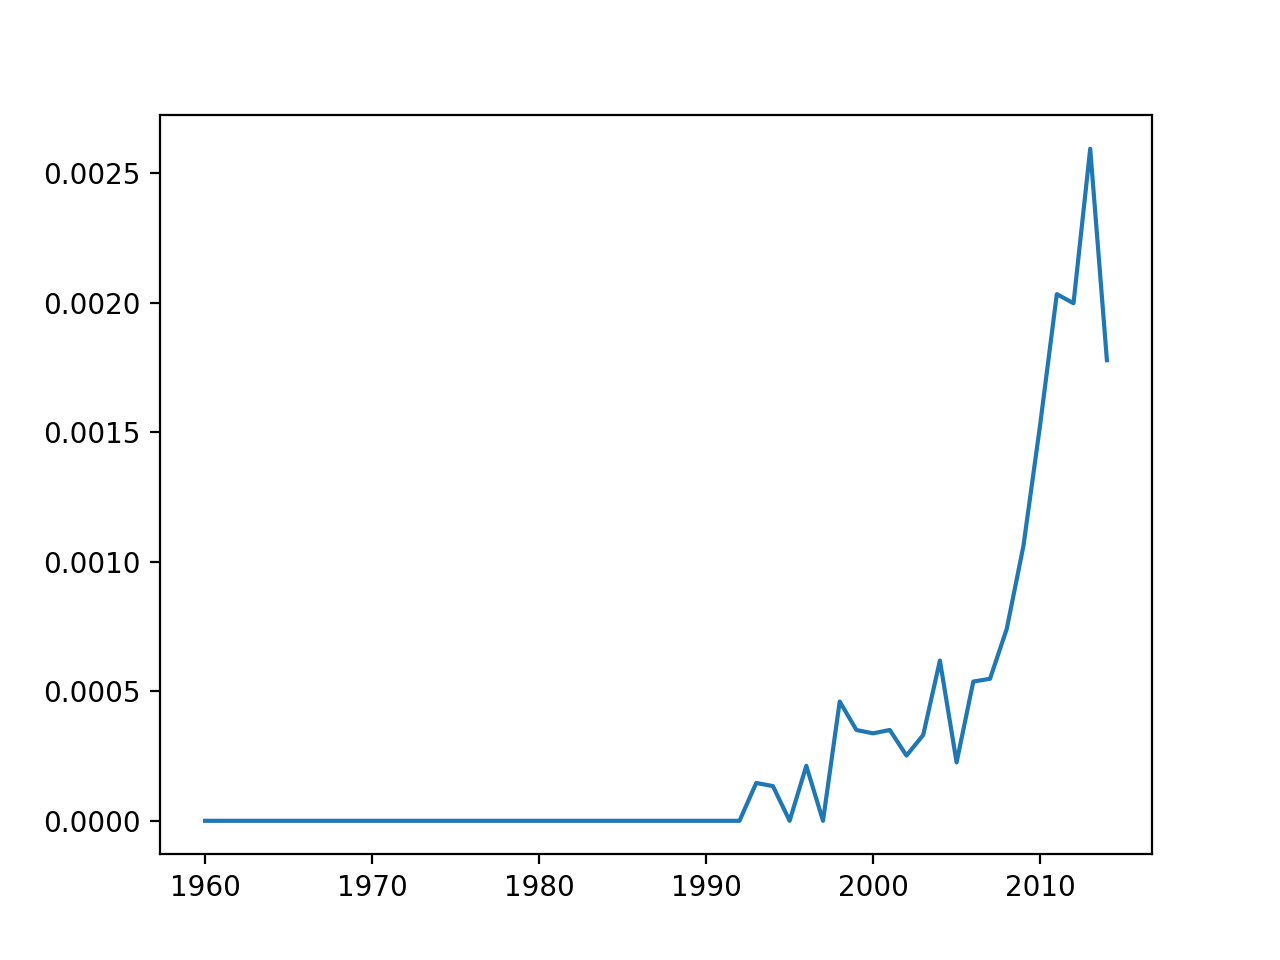

mesenchymal


<IPython.core.display.Javascript object>


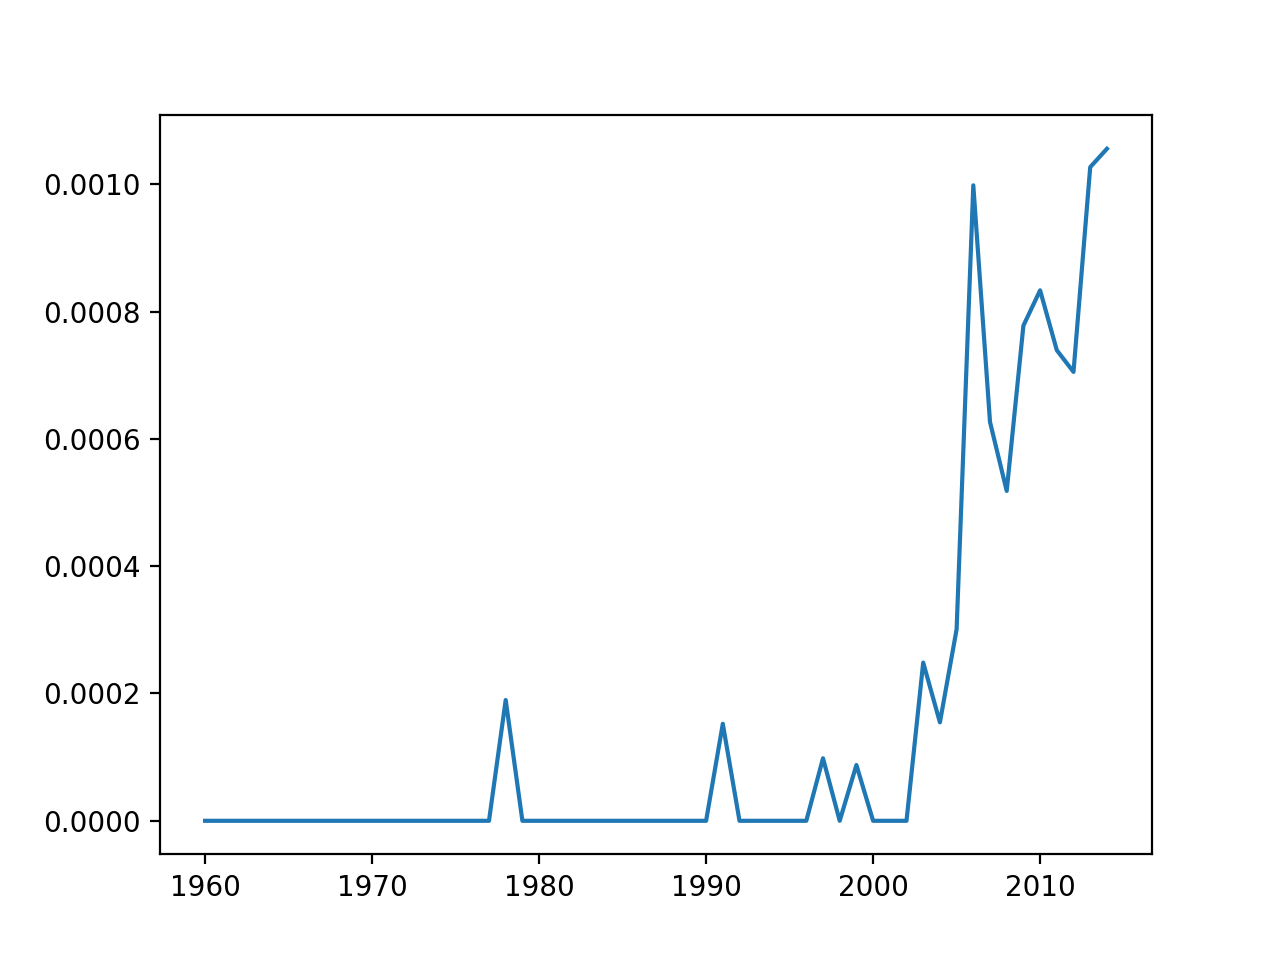

nanoparticles


<IPython.core.display.Javascript object>


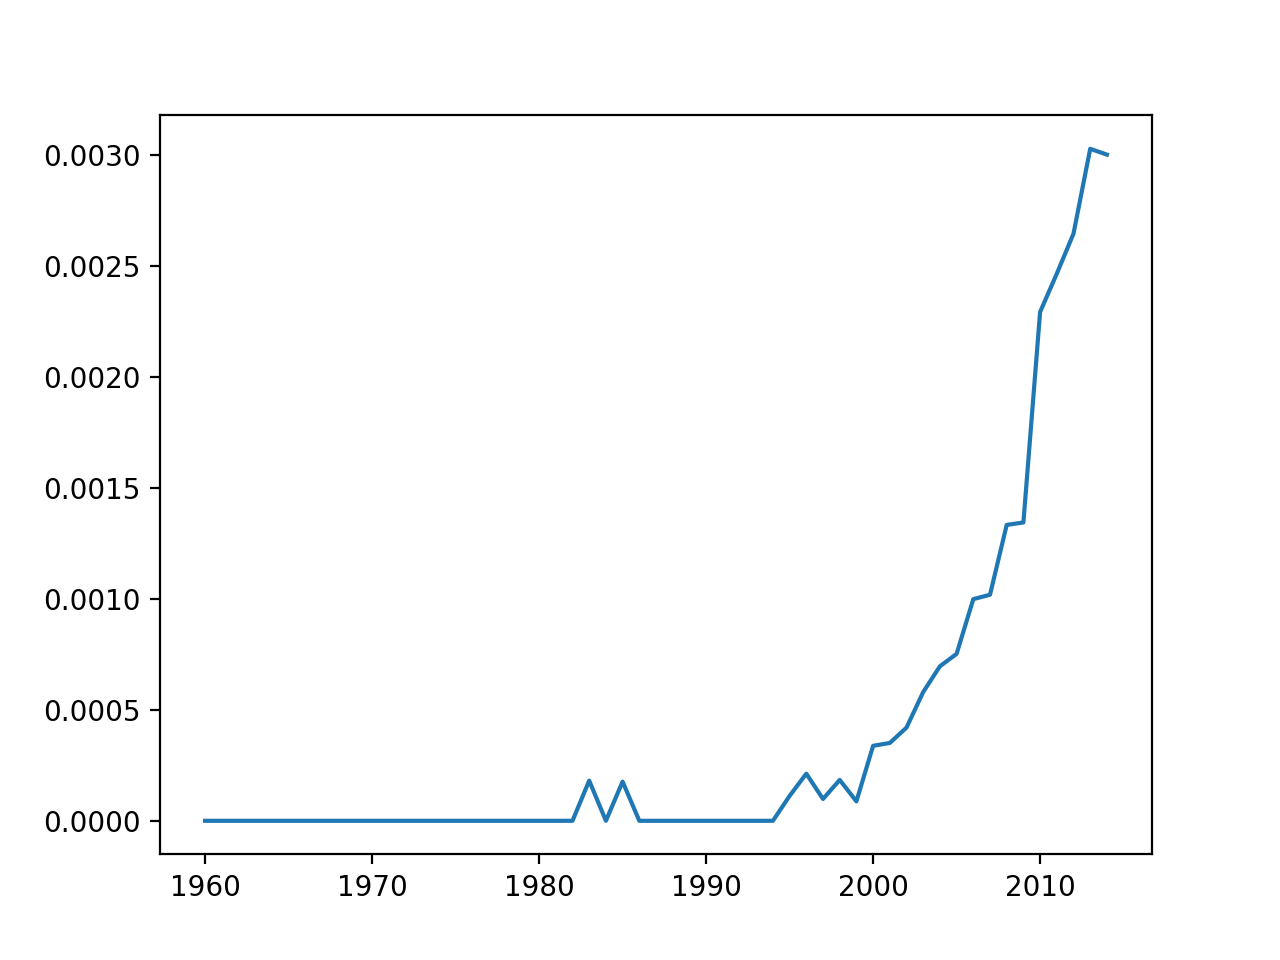

resilience


<IPython.core.display.Javascript object>


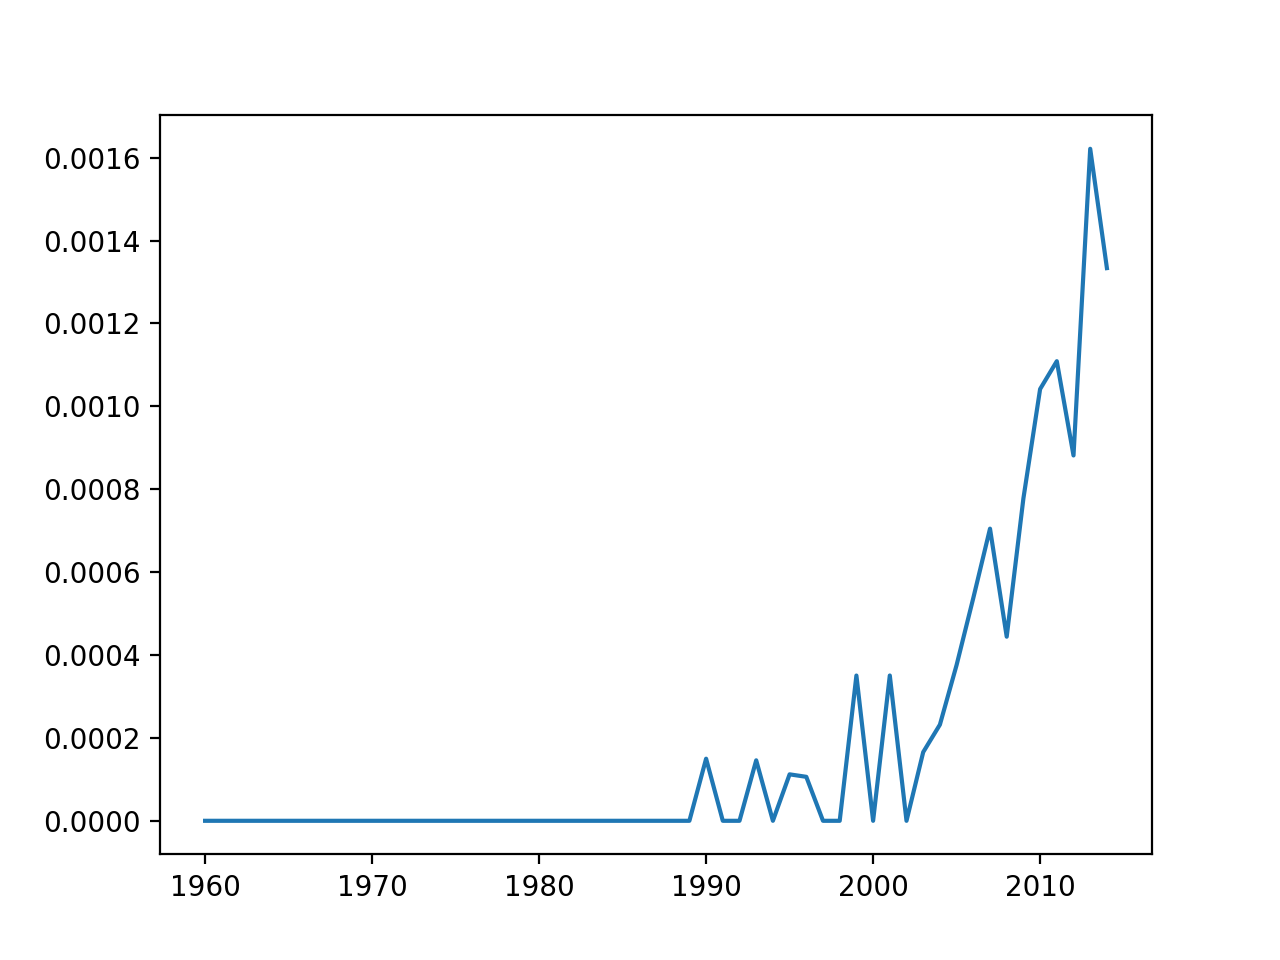

polysaccharides


<IPython.core.display.Javascript object>


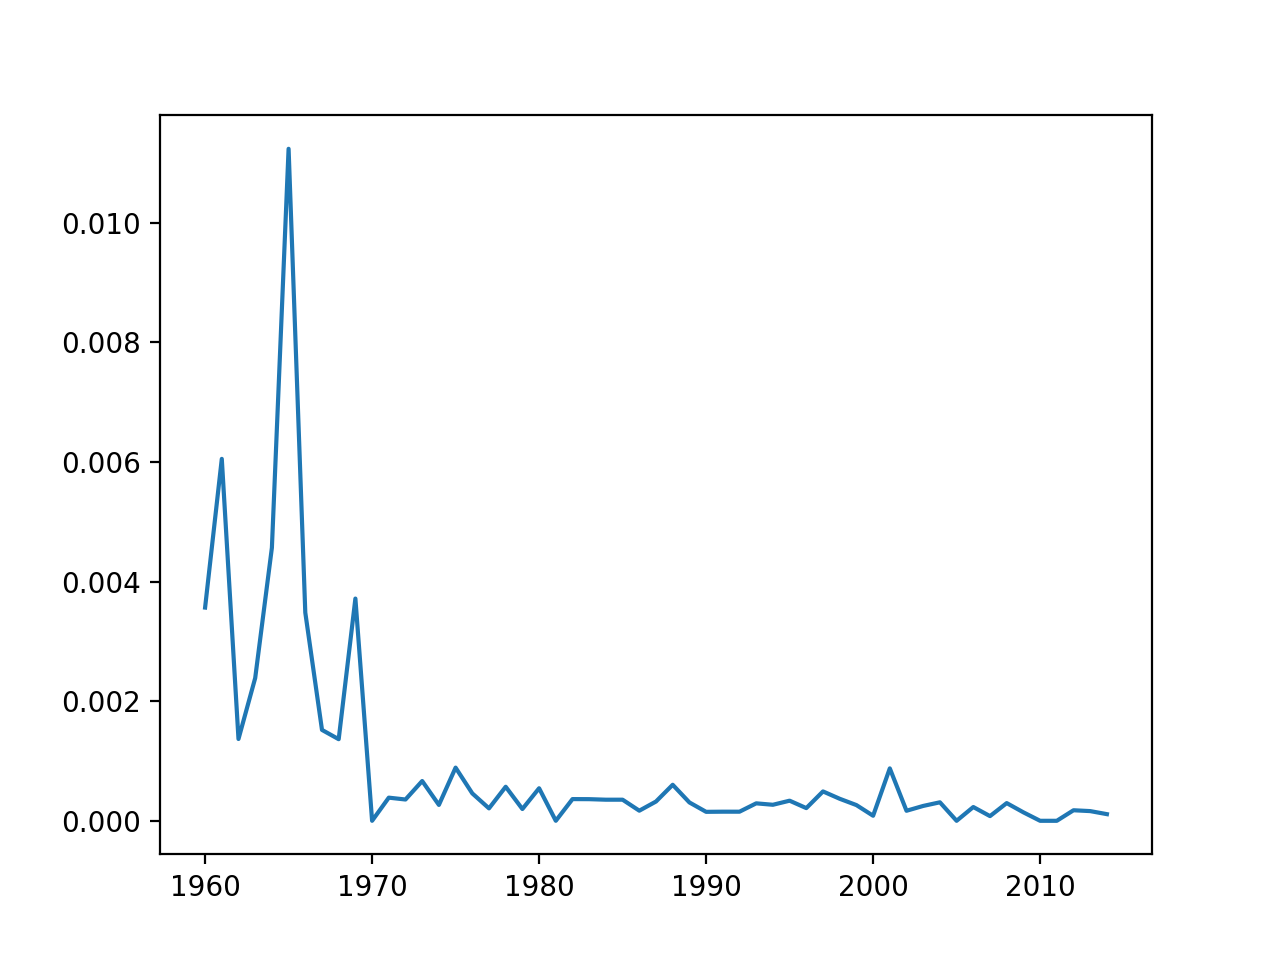

terahertz


<IPython.core.display.Javascript object>


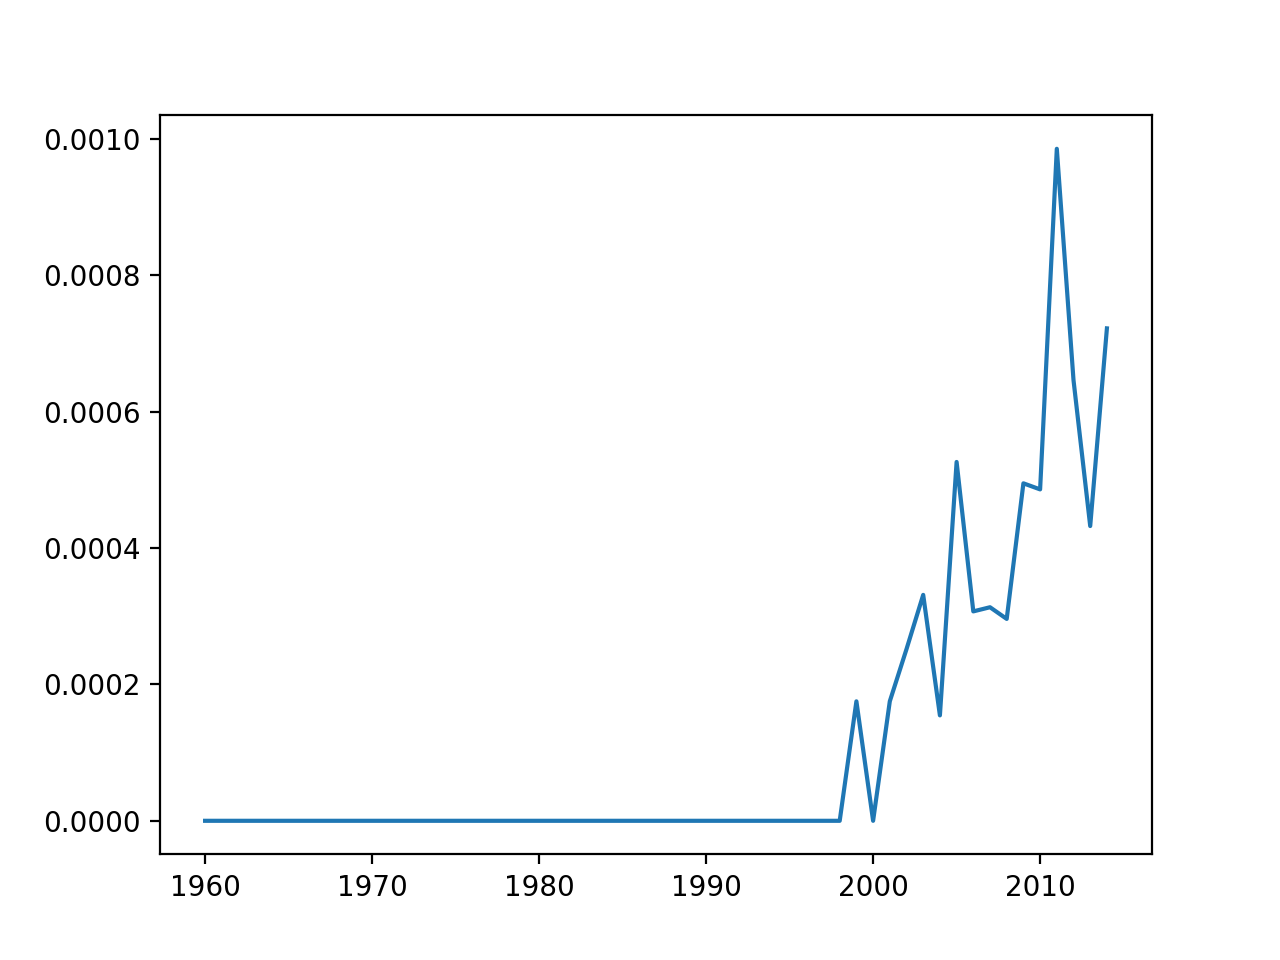

epigenetic


<IPython.core.display.Javascript object>


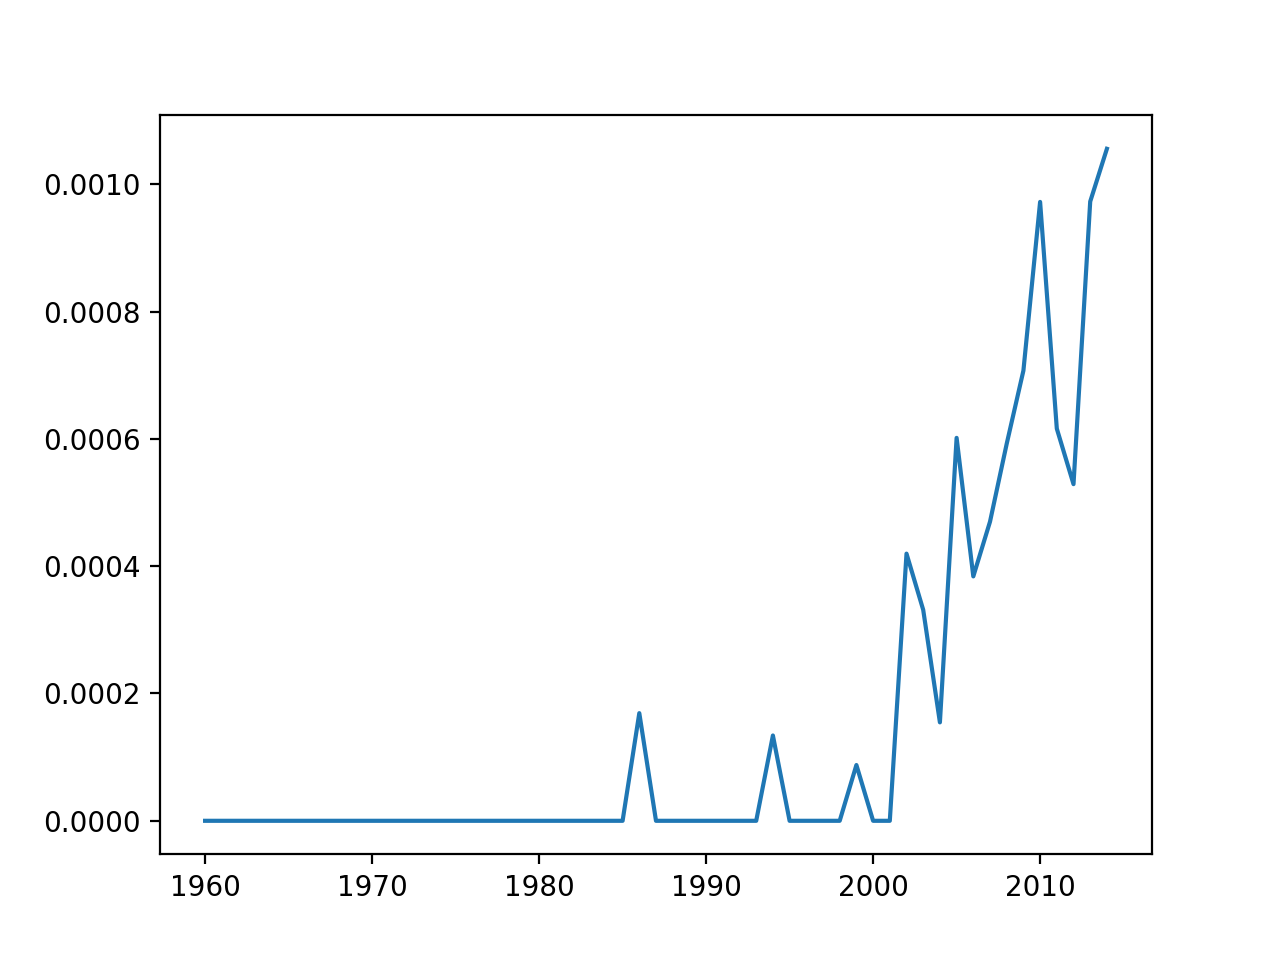

microprocessor


<IPython.core.display.Javascript object>


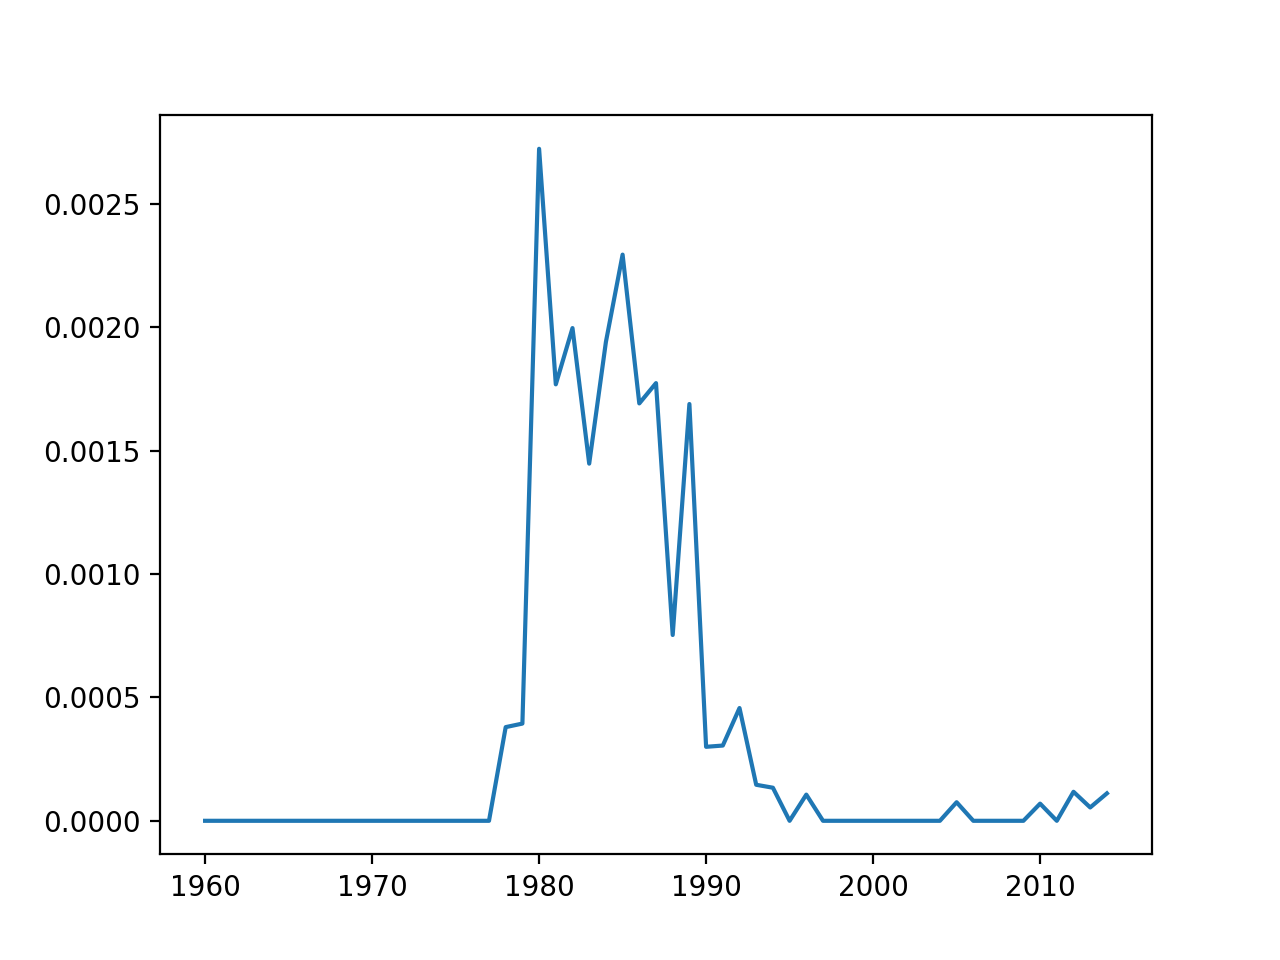

healthcare


<IPython.core.display.Javascript object>


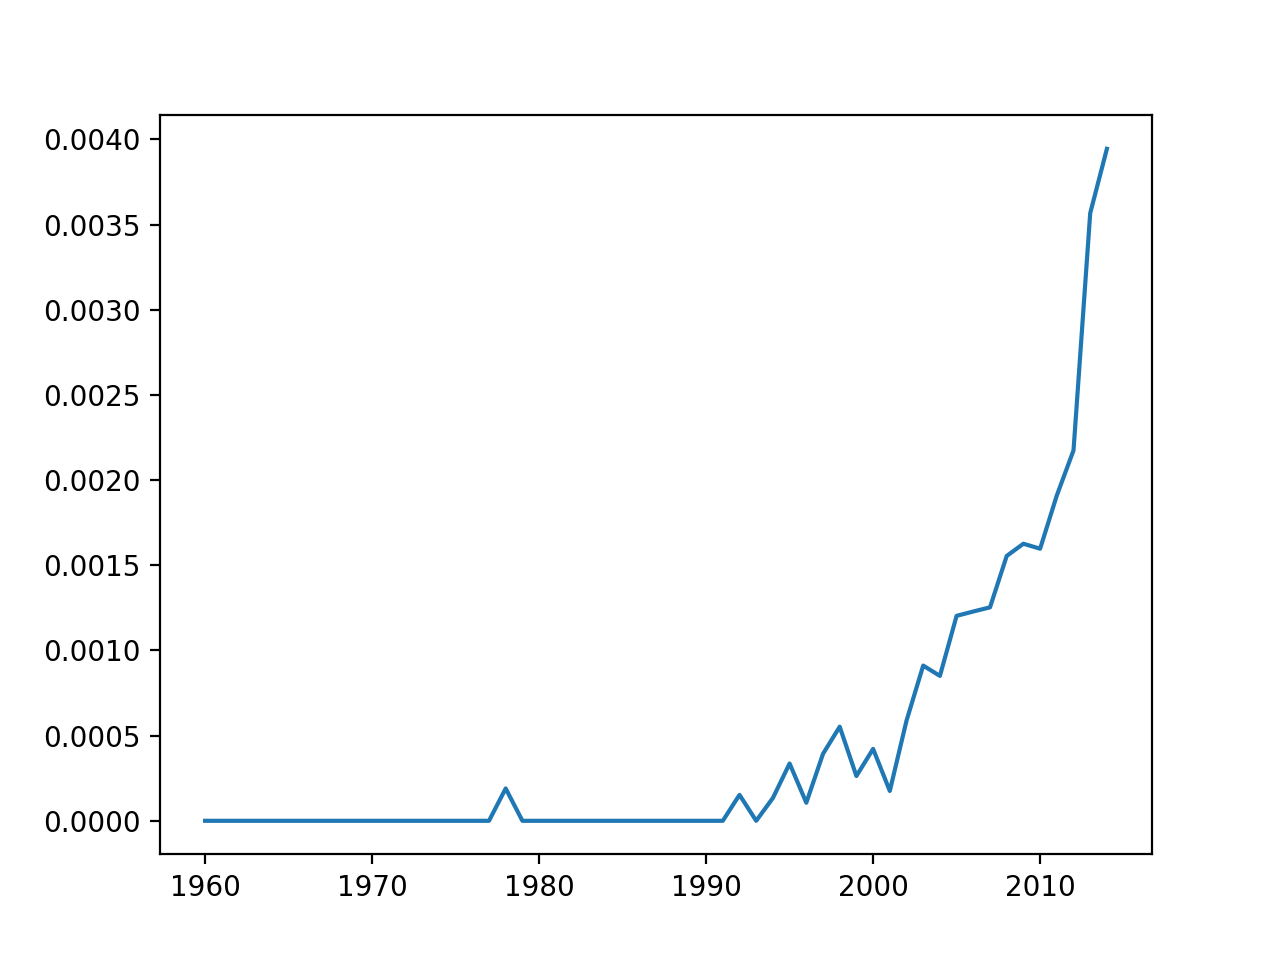

nanotubes


<IPython.core.display.Javascript object>


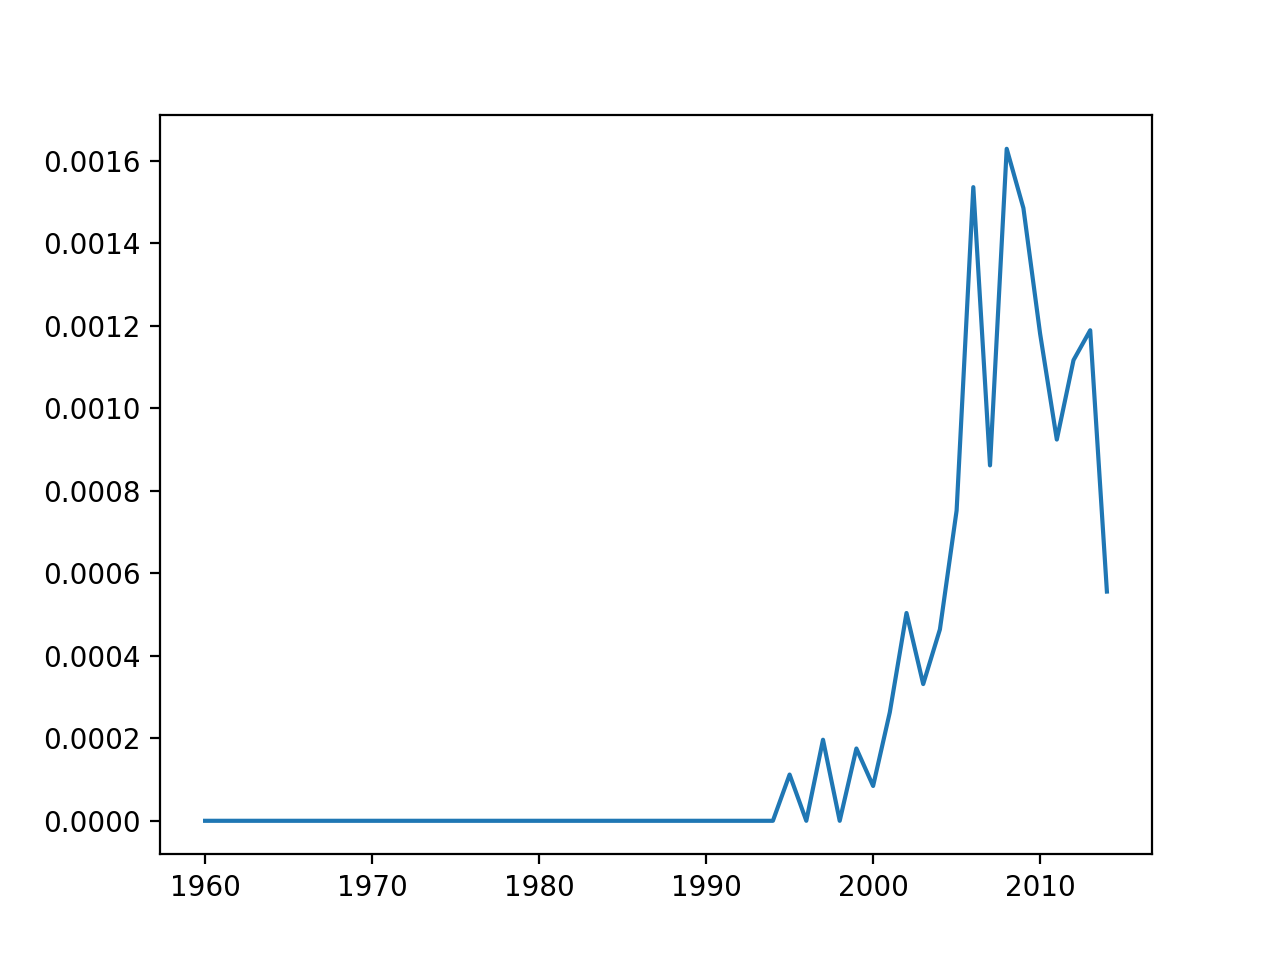

innate


<IPython.core.display.Javascript object>


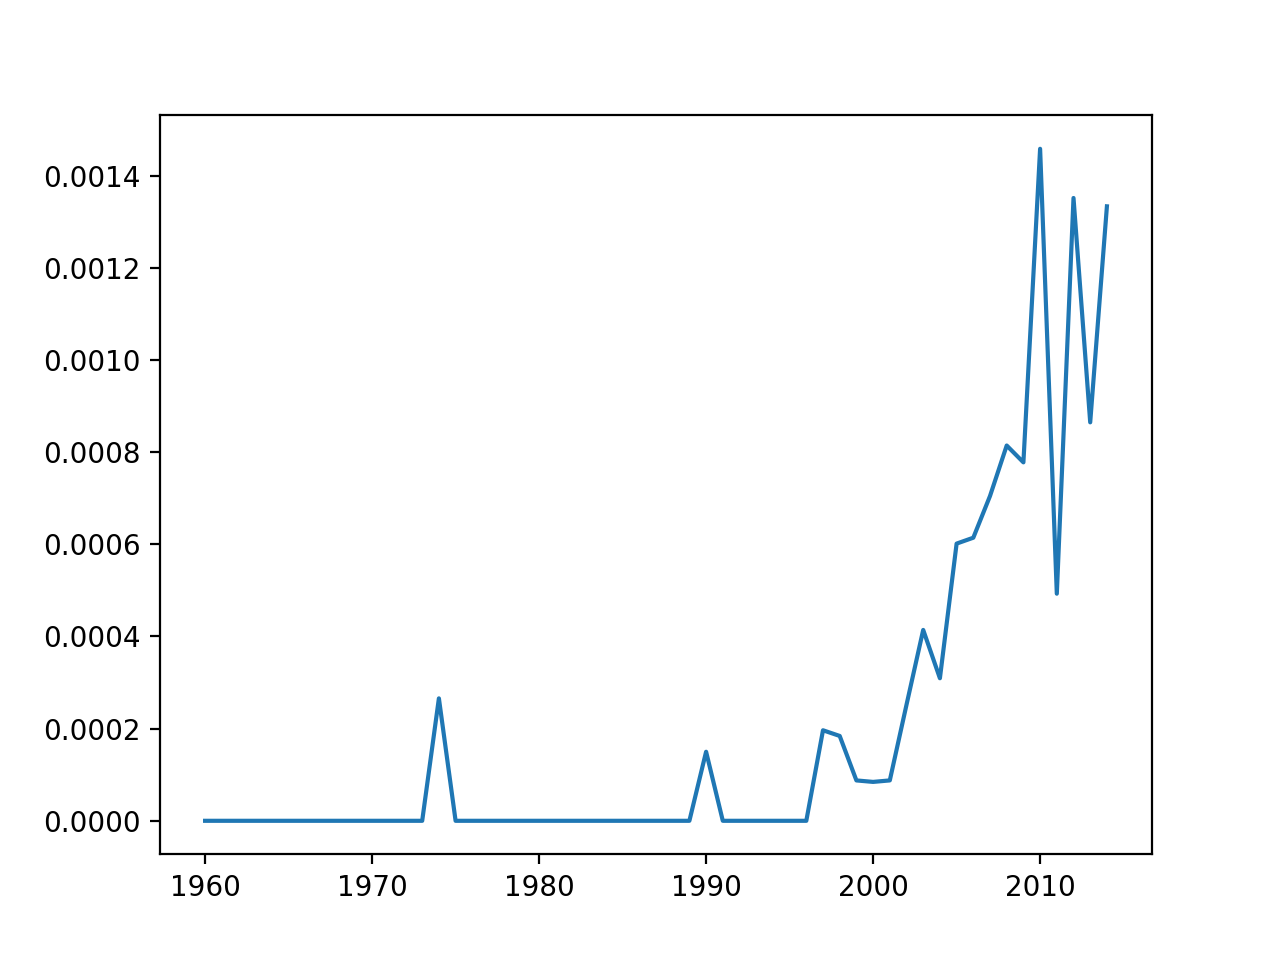

genomics


<IPython.core.display.Javascript object>


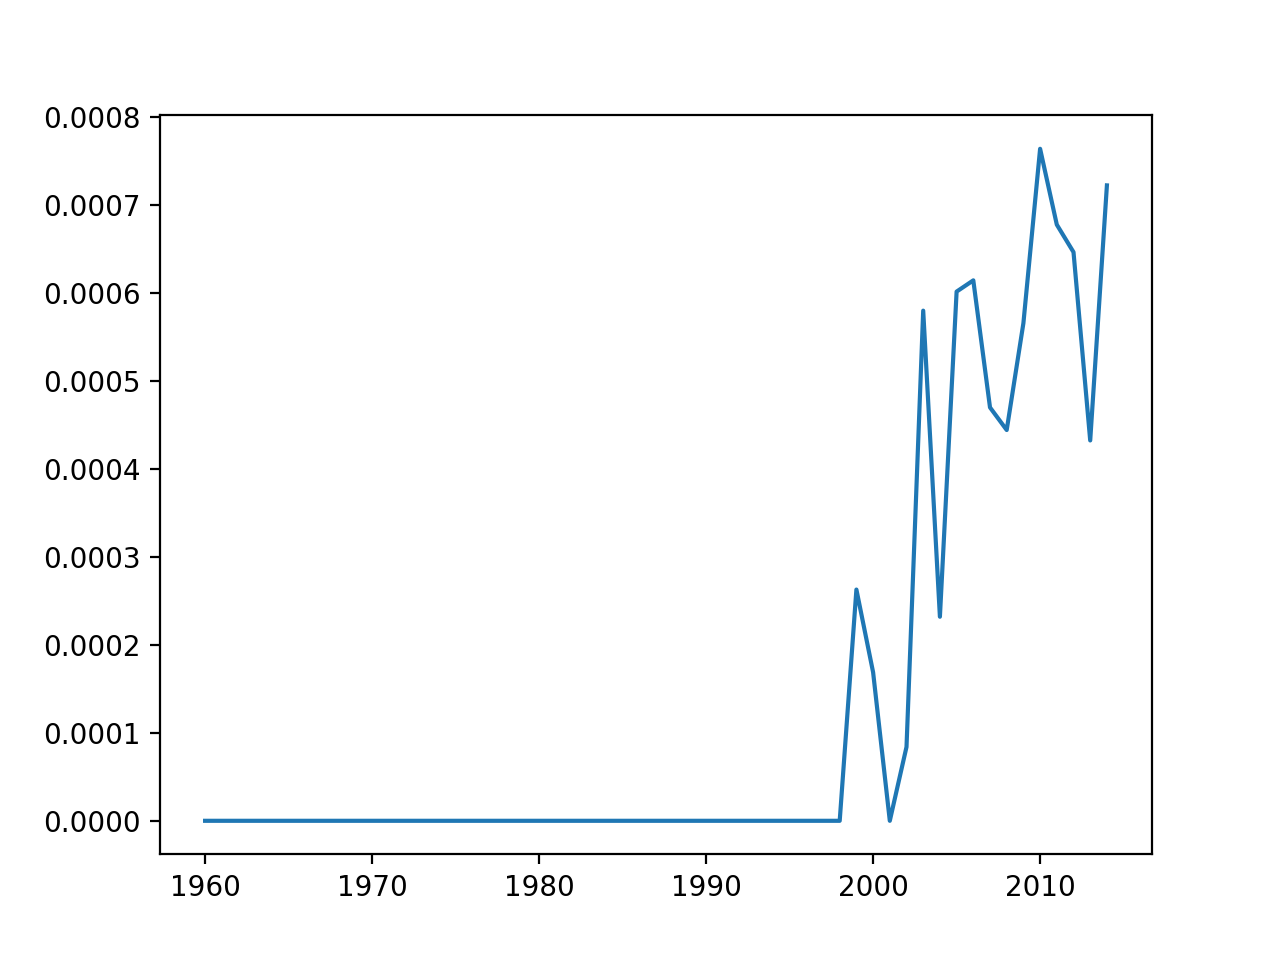

frequencies


<IPython.core.display.Javascript object>


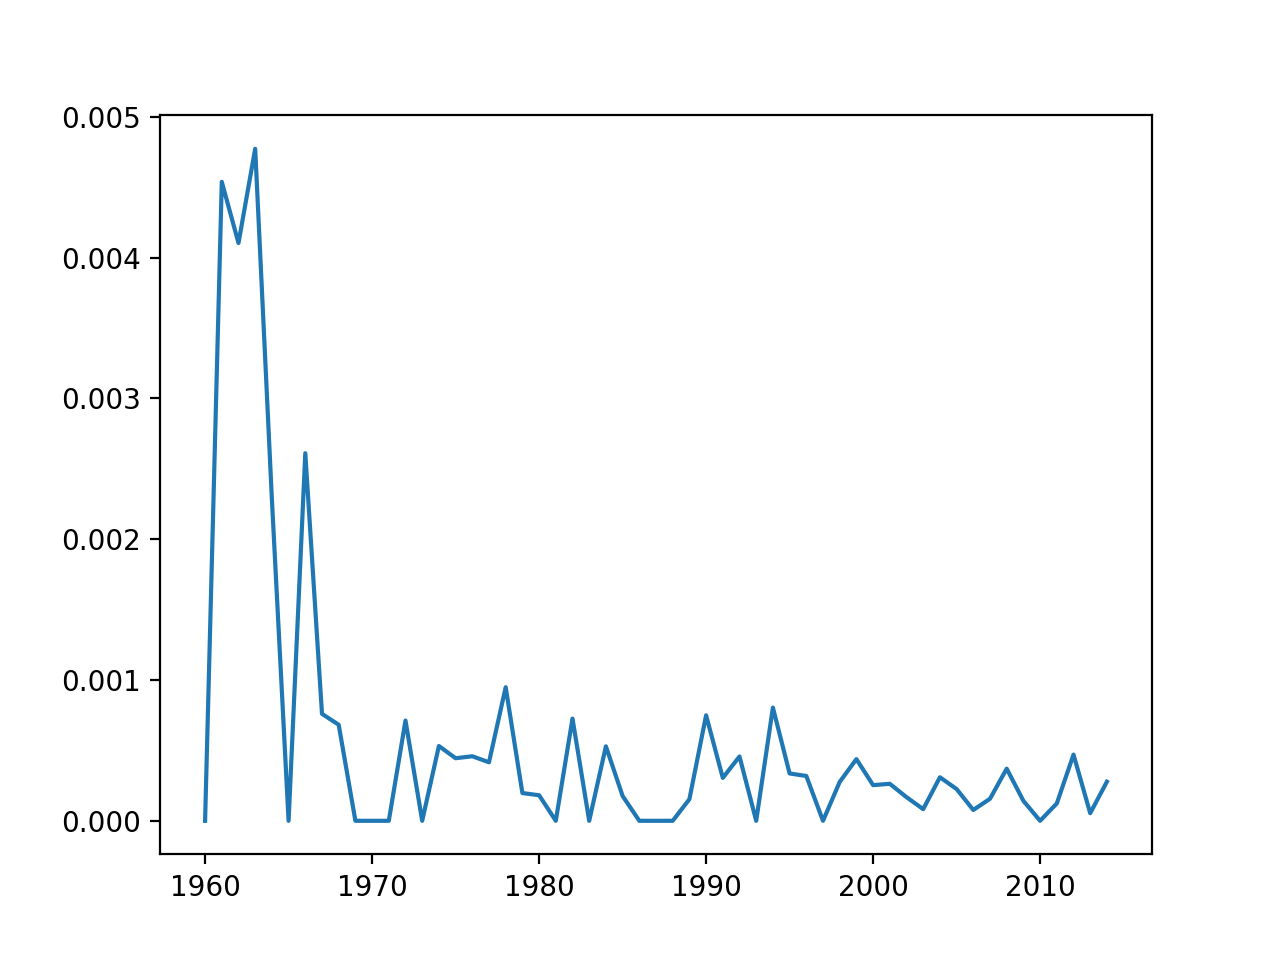

prion


<IPython.core.display.Javascript object>


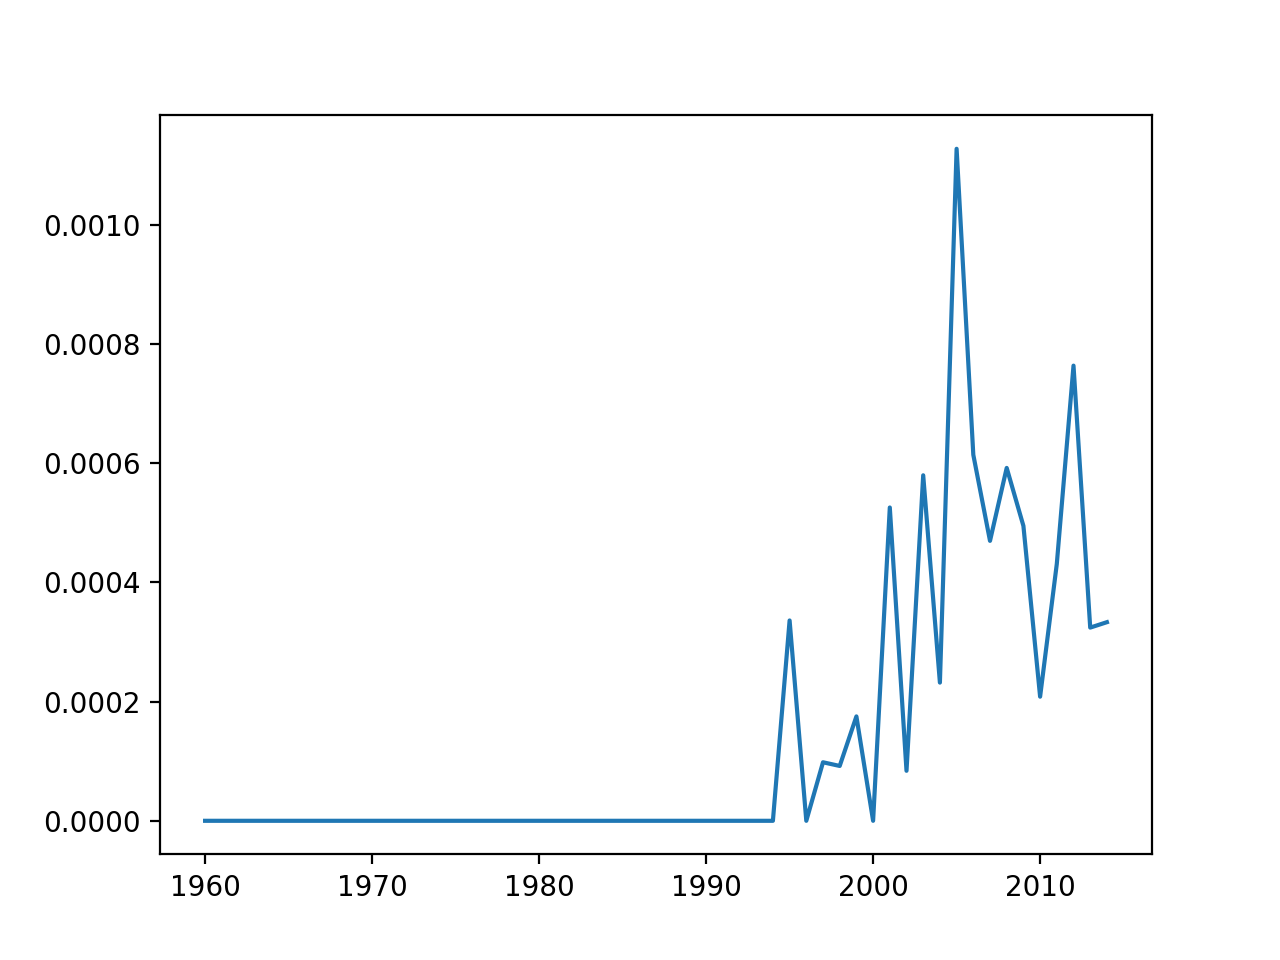

selfassembly


<IPython.core.display.Javascript object>


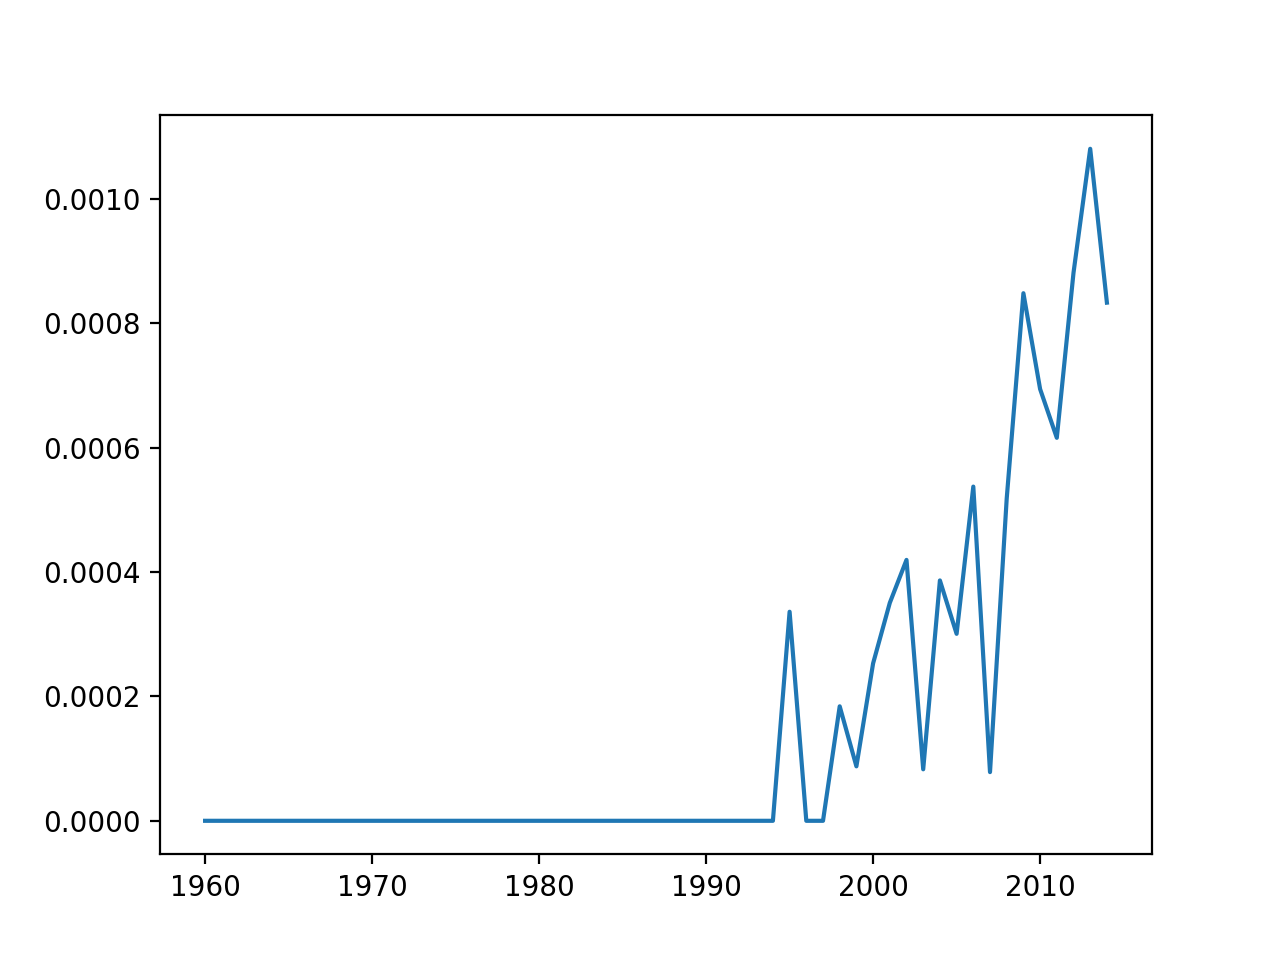

discs


<IPython.core.display.Javascript object>


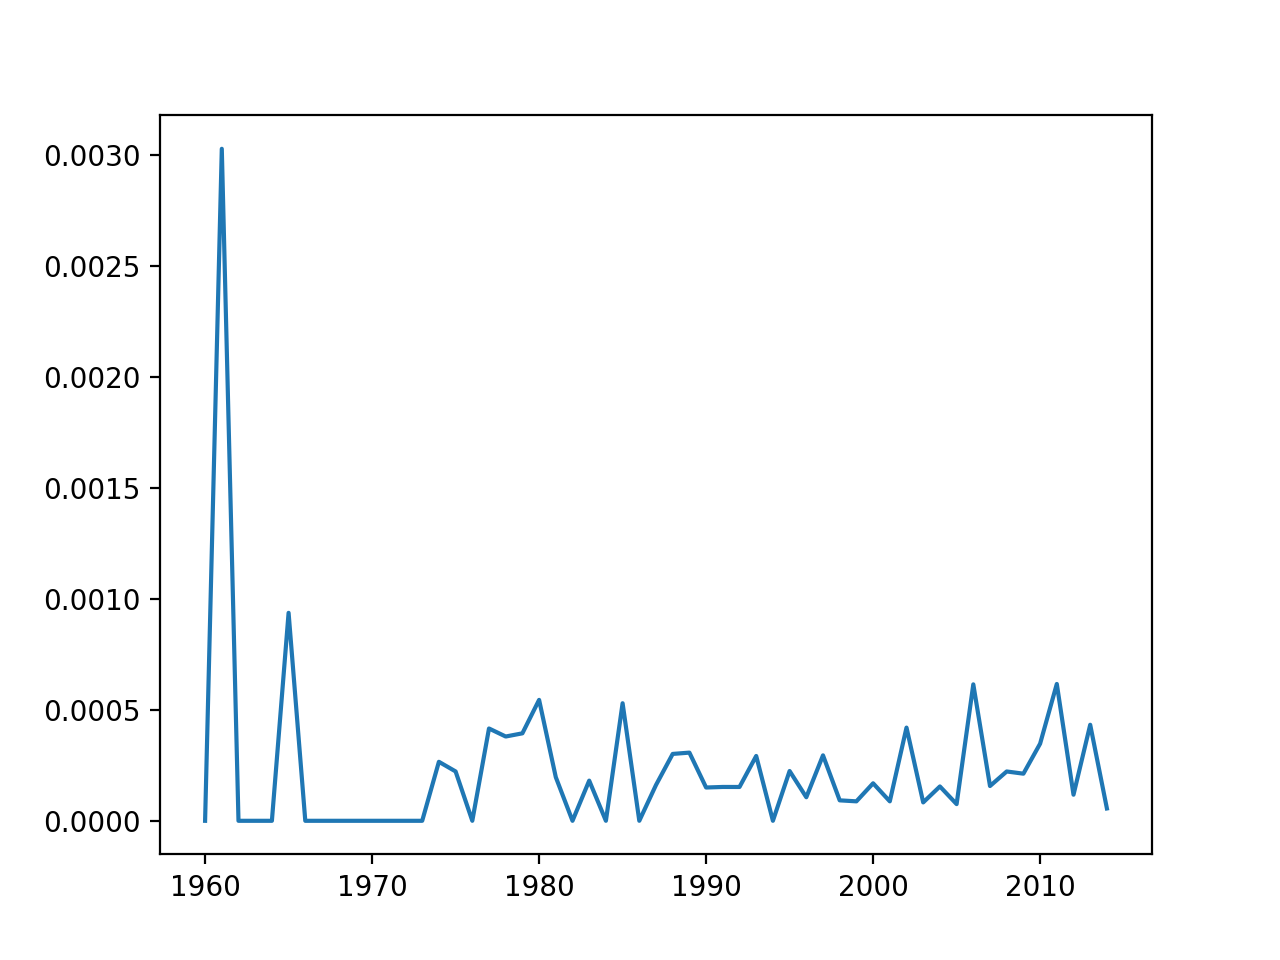

placental


<IPython.core.display.Javascript object>


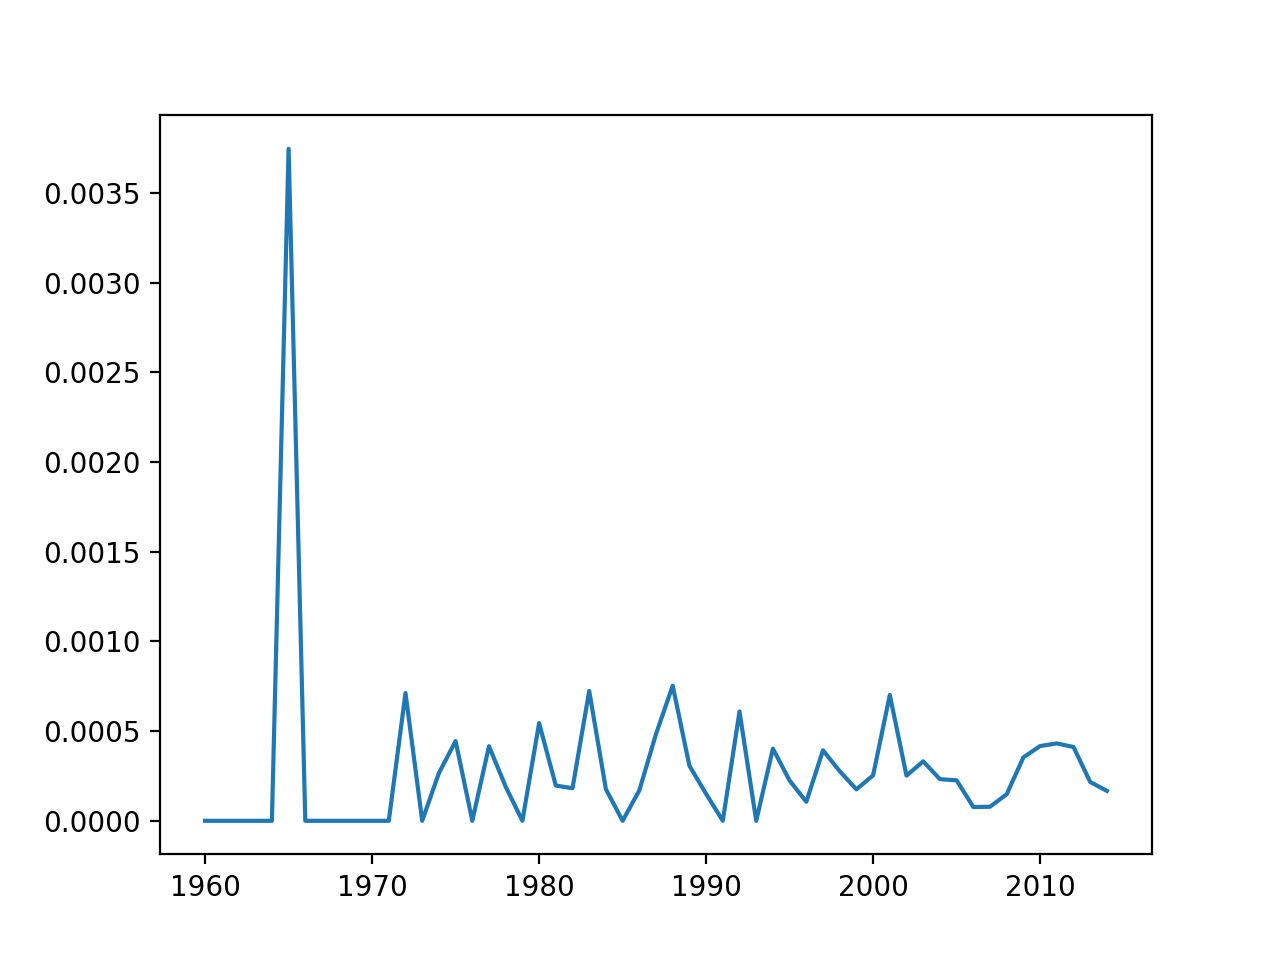

nanocomposites


<IPython.core.display.Javascript object>


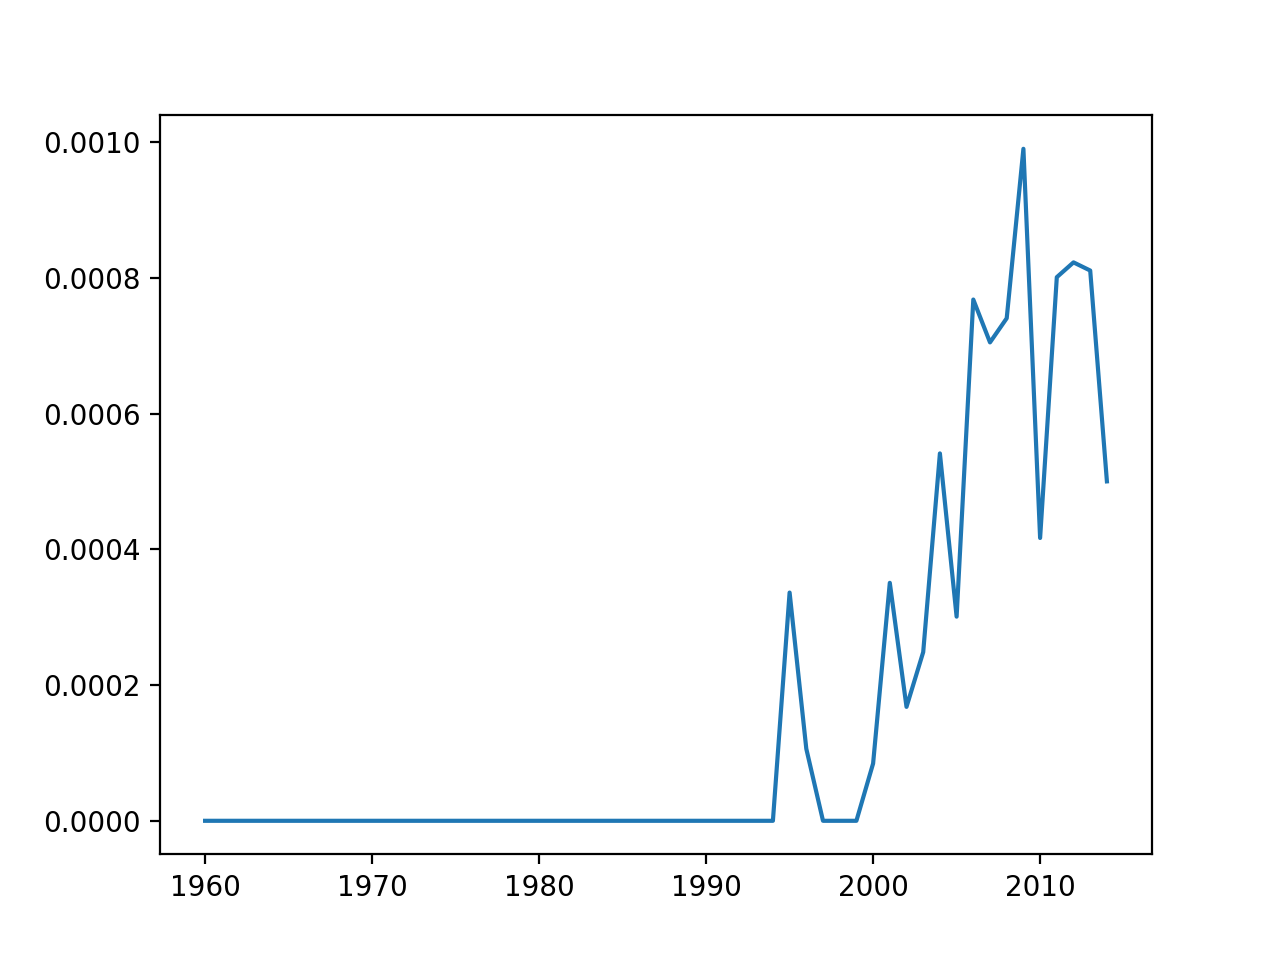

loch


<IPython.core.display.Javascript object>


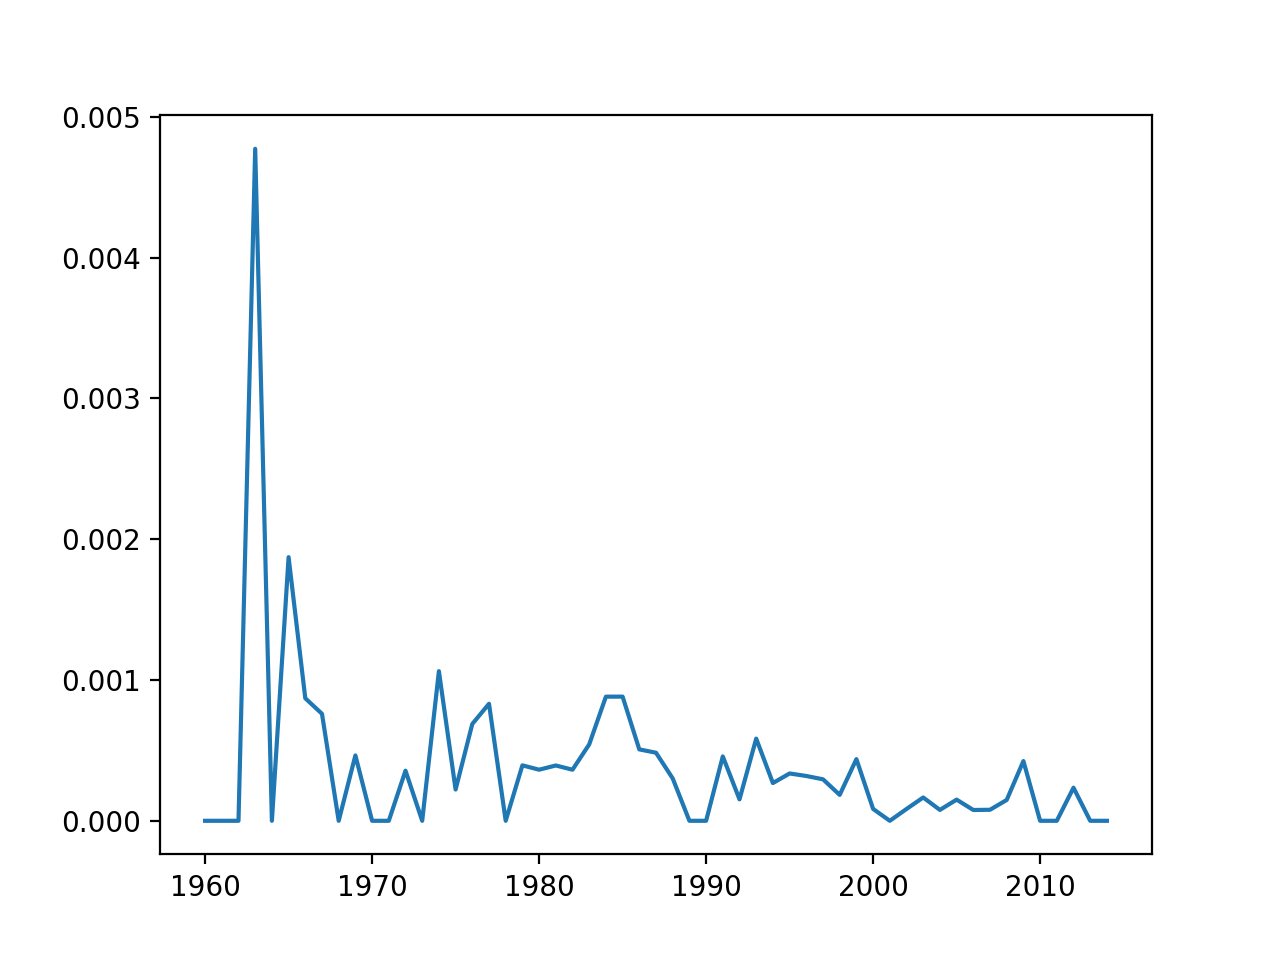

challenges


<IPython.core.display.Javascript object>


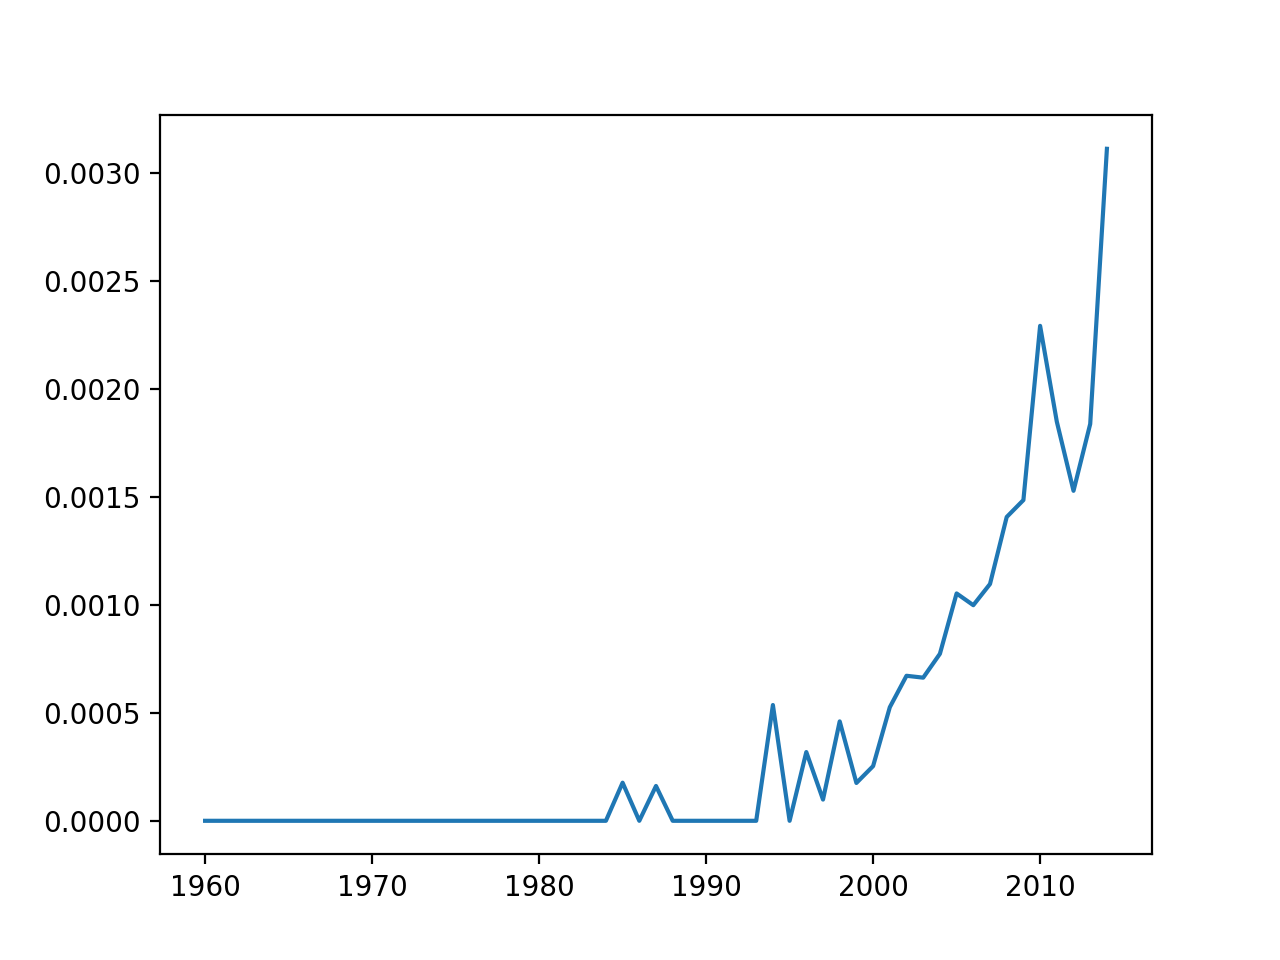

characterising


<IPython.core.display.Javascript object>

ict


<IPython.core.display.Javascript object>

multiscale


<IPython.core.display.Javascript object>

stakeholders


<IPython.core.display.Javascript object>

wireless


<IPython.core.display.Javascript object>

smes


<IPython.core.display.Javascript object>

possibilities


<IPython.core.display.Javascript object>

nanostructured


<IPython.core.display.Javascript object>

modeling


<IPython.core.display.Javascript object>

In [144]:
# TODO For each of the top words, get related words that it appears with, and example titles from the top years. 
yearrange = slice(1960, 2014)
M = wordrates_by_year.T[yearrange]
years = M.index
M = M.T[total_wordcounts > 100].T
stds = (M.std()/M.mean()).sort_values(ascending=False)
topwords = stds.index[:40]
for w in topwords:
    print(w)
    fig = plt.figure()
    plt.plot(years, M[w])

In [1]:
# TODO Make a graph of which words appear together, find groups of related terms in it
# to get labels for things like research fields.
# Then study how different institutions focus on different fields at different times.